# Script Contents

### -Import Libraries

### -Import Data

### -Address PII

### -Create Regions Column

### -Investigate Regions/Spending Relationship

### -Create Low-activity Flag and Exclude from Data

### -Age Profiling

### -Income Profiling

### -Dependants Profiling

### -Departmend ID Profiling

### -Chart Creations for Profile Comparisons

### -Price Column Aggregations for Various Customer Profiles

### -Additional Chart Creations for Profle Comparisons

### - Correlation Testing on Age and Income

# Importing Libraries

In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [4]:
# Create a path to my main project folder
path = r'C:\Users\jacks\Instacart Basket Analysis 081424'

In [6]:
# Import latest dataset
ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

# Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

In [8]:
# Check for columns in the data that contain PII
ords_prods_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  exists                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spendi

### According to Exercise 4.10's section on data security and PII, "particularly sensitive are names, email addresses, physical addresses, and phone numbers." The project data currently contains the first and last names of customers. While other customer data, such as age, gender, and income is sensitive when paired with the customers' first and last names, removing the first and last names from the data would leave all customers anonymous. For this reason, I will remove the first and last name columns from the data but leave all other customer data. 

In [8]:
# Drop First and Last name columns from the df
ords_prods_cust_2 = ords_prods_cust.drop(columns=['First Name','Last Name'])

In [12]:
# Checking that the drop worked
ords_prods_cust_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  exists                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spendi

# The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [14]:
# Check the values in the state column
print(ords_prods_cust_2['State'].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Maryland' 'Massachusetts' 'Michigan'
 'Minnesota' 'Mississippi' 'Missouri' 'Pennsylvania' 'Rhode Island'
 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


In [10]:
# Define a function to categorize states into regions
def categorize_region(State):
    Regions = {
        'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Rhode Island', 'Vermont'],
        'Midwest': ['Illinois', 'Indiana', 'Iowa', 'Kansas', 'Michigan', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'Ohio', 'South Dakota', 'Wisconsin'],
        'South': ['Alabama', 'Arkansas', 'Delaware', 'Florida', 'Georgia', 'Kentucky', 'Louisiana', 'Maryland', 'Mississippi', 'North Carolina', 'Oklahoma', 'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'West Virginia', 'District of Columbia'], 
        'West': ['Alaska', 'Arizona', 'California', 'Colorado', 'Hawaii', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Oregon', 'Utah', 'Washington', 'Wyoming']}

    for Region, States in Regions.items():
        if State in States:
            return Region
    return 'Unknown'

In [12]:
# Add a new column 'Region'
ords_prods_cust_2['Region'] = ords_prods_cust_2['State'].apply(categorize_region)

In [20]:
# Check the contents the new column
ords_prods_cust_2['Region'].value_counts()

Region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

 # Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [14]:
# Create a crosstab of the Region and spending_flag columns
crosstab = pd.crosstab(ords_prods_cust_2['Region'], ords_prods_cust_2['spending_flag'], dropna = False)

In [24]:
# Check the results of the crosstab
print(crosstab)

spending_flag  High spender  Low spender
Region                                  
Midwest               29294      7568031
Northeast             18642      5704094
South                 40739     10751146
West                  31286      8261627


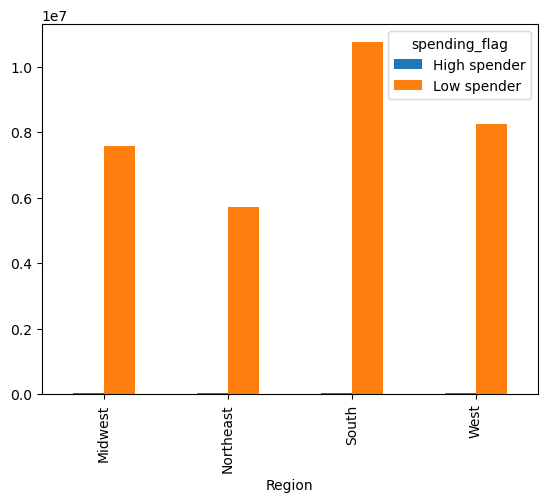

In [26]:
# Create a visual to dispaly the results of the crosstab
regions_spending_bar = crosstab.plot.bar()

### There are extremely few high spenders in every region. The South has noticibly more low spenders than all other regions.

In [28]:
# Export visual
regions_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'regions_spending_bar.png'))

# The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [16]:
# Create a exclusion flag that groups total orders into less than 5 and 5 or more
ords_prods_cust_2.loc[ords_prods_cust_2['max_order'] < 5, 'exclusion_flag'] = 'low-activity customer'
ords_prods_cust_2.loc[ords_prods_cust_2['max_order'] >= 5, 'exclusion_flag'] = 'high-activity customer'

In [36]:
# Check the values of the new column
ords_prods_cust_2['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
high-activity customer    30964564
low-activity customer      1440295
Name: count, dtype: int64

In [18]:
# Remove the low-activity customers and leave the m=high-activity customers in a new df
ords_prods_cust_3 = ords_prods_cust_2[ords_prods_cust_2['exclusion_flag'].isin(['low-activity customer']) == False]

In [40]:
# Check the shape of the new df. It should contain 30964564 rows if the drop was successful
ords_prods_cust_3.shape

(30964564, 33)

In [42]:
# Before saving updated dataset, I am removing any columns not being used for analysis
# Reminder of columns
ords_prods_cust_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   order_id                int64   
 1   user_id                 object  
 2   order_number            int64   
 3   orders_day_of_week      int64   
 4   order_hour_of_day       int64   
 5   days_since_prior_order  float64 
 6   product_id              int64   
 7   add_to_cart_order       int64   
 8   reordered               int64   
 9   product_name            object  
 10  aisle_id                int64   
 11  department_id           int64   
 12  prices                  float64 
 13  exists                  category
 14  price_range_loc         object  
 15  busiest_day             object  
 16  busiest_days            object  
 17  busiest_period_of_day   object  
 18  max_order               int64   
 19  loyalty_flag            object  
 20  avg_price               float64 
 21  spending_fl

In [20]:
# Dropping unnecessary columns
final_data = ords_prods_cust_3.drop(['exists', 'busiest_day', 'busiest_days', 'busiest_period_of_day', 'exclusion_flag'], axis=1)

In [46]:
# Check on the results of the drop
final_data.head()

order_id user_id  order_number  orders_day_of_week  order_hour_of_day  \
0   2539329       1             1                   2                  8   
1   2539329       1             1                   2                  8   
2   2539329       1             1                   2                  8   
3   2539329       1             1                   2                  8   
4   2539329       1             1                   2                  8   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     7.0         196                  1          0   
1                     7.0       14084                  2          0   
2                     7.0       12427                  3          0   
3                     7.0       26088                  4          0   
4                     7.0       26405                  5          0   

                              product_name  ...  median_days_since  \
0                                     Soda  ...               20.0   
1  Organic Unsweetened Vanilla Almond Milk  ...               20.0   
2                      Original Beef Jerky  ...               20.0   
3               Aged White Cheddar Popcorn  ...               20.0   
4         XL Pick-A-Size Paper Towel Rolls  ...               20.0   

     frequency_flag  Gender    State  Age Date_joined  Dependants Fam_status  \
0  Regular customer  Female  Alabama   31   2/17/2019           3    married   
1  Regular customer  Female  Alabama   31   2/17/2019           3    married   
2  Regular customer  Female  Alabama   31   2/17/2019           3    married   
3  Regular customer  Female  Alabama   31   2/17/2019           3    married   
4  Regular customer  Female  Alabama   31   2/17/2019           3    married   

   Income Region  
0   40423  South  
1   40423  South  
2   40423  South  
3   40423  South  
4   40423  South  

[5 rows x 28 columns]

In [22]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30964564 entries, 0 to 32404858
Data columns (total 28 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 object 
 2   order_number            int64  
 3   orders_day_of_week      int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   product_name            object 
 10  aisle_id                int64  
 11  department_id           int64  
 12  prices                  float64
 13  price_range_loc         object 
 14  max_order               int64  
 15  loyalty_flag            object 
 16  avg_price               float64
 17  spending_flag           object 
 18  median_days_since       float64
 19  frequency_flag          object 
 20  Gender                  object 
 21  State                   object 
 2

In [24]:
# Export dataframe
final_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.pkl'))

# The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents

### Age Profiling

In [53]:
# First, I will group all users based on their age
# Remind myself of user age range
final_data['Age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: Age, dtype: float64

In [26]:
# According to https://www.britannica.com/science/middle-age , middle age is defined as the age of 40-60
# Create a new column that groups ages 
final_data.loc[final_data['Age'] < 40, 'age_group'] = 'Early Adulthood'
final_data.loc[(final_data['Age'] >= 40) & (final_data['Age'] <= 60), 'age_group'] = 'Middle Adulthood'
final_data.loc[final_data['Age'] > 60, 'age_group'] = 'Late Adulthood'

In [57]:
# Check the column's value count
final_data['age_group'].value_counts(dropna = False)

age_group
Early Adulthood     10665110
Middle Adulthood    10186847
Late Adulthood      10112607
Name: count, dtype: int64

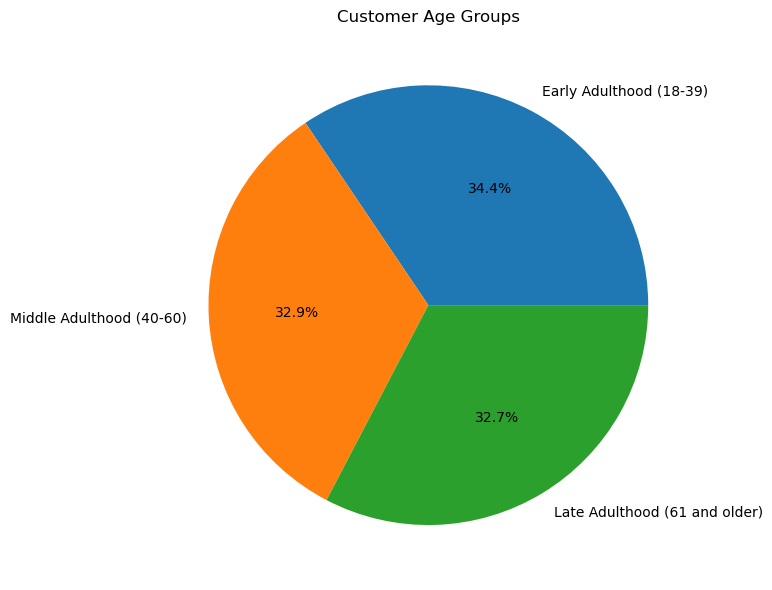

In [131]:
# Display the age groups in a pie chart
# Create a seperate df containing only data for the chart
age_group_pie_data = final_data['age_group'].value_counts()

# Create diemnsions for the chart
age_group_pie_data.plot(figsize=(8,6))

# Plot the chart
age_group_pie = age_group_pie_data.plot.pie(labels = ['Early Adulthood (18-39)', 'Middle Adulthood (40-60)', 'Late Adulthood (61 and older)'], autopct='%1.1f%%',)
plt.title('Customer Age Groups')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()

In [133]:
# Save the visual
age_group_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_group_pie_chart.png')) 

### Income Profiling

In [119]:
# Reminder of income amounts
final_data['Income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: Income, dtype: float64

In [28]:
# Group users based on income levels
final_data.loc[final_data['Income'] < 70000, 'income_group'] = 'Low Income'
final_data.loc[(final_data['Income'] >= 70000) & (final_data['Income'] <= 150000), 'income_group'] = 'Middle Income'
final_data.loc[final_data['Income'] > 150000, 'income_group'] = 'High Income'

In [125]:
# Check the new column's value count
final_data['income_group'].value_counts(dropna = False)

income_group
Middle Income    18549497
Low Income        8520533
High Income       3894534
Name: count, dtype: int64

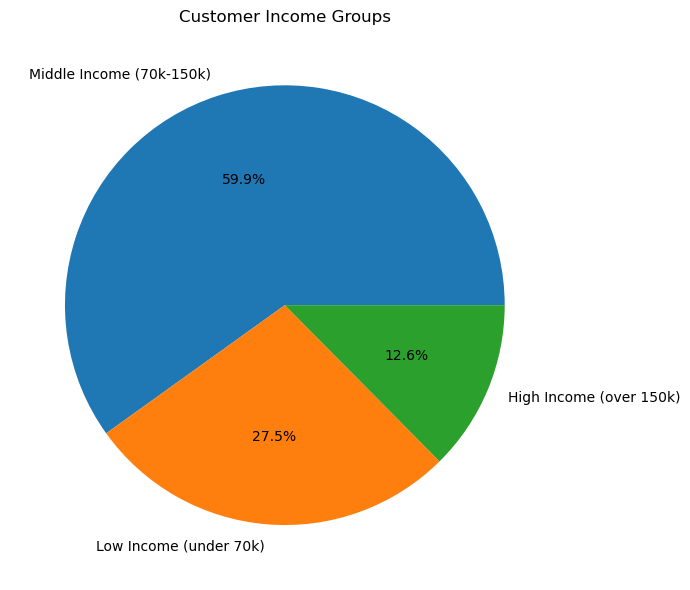

In [135]:
# Display the income groups in a pie chart
# Create a seperate df containing only data for the chart
income_group_pie_data = final_data['income_group'].value_counts()

# Create diemnsions for the chart
income_group_pie_data.plot(figsize=(8,6))

# Plot the chart
income_group_pie = income_group_pie_data.plot.pie(labels = ['Middle Income (70k-150k)', 'Low Income (under 70k)', 'High Income (over 150k)'], autopct='%1.1f%%',)
plt.title('Customer Income Groups')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()

In [137]:
# Save the visual
income_group_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_group_pie_chart.png')) 

### Dependants Profiling

In [157]:
# Review of dependents data
final_data['Dependants'].value_counts()

Dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [30]:
# Create a new variable that groups users by number of dependants
final_data.loc[final_data['Dependants'] == 0, 'fam_size'] = 'None'
final_data.loc[final_data['Dependants'] == 1, 'fam_size'] = 'Small Family'
final_data.loc[final_data['Dependants'] == 2, 'fam_size'] = 'Medium Family'
final_data.loc[final_data['Dependants'] == 3, 'fam_size'] = 'Large Family'

In [218]:
# Check the value counts of the new column
final_data['fam_size'].value_counts()

fam_size
Large Family     7772516
None             7739681
Medium Family    7733261
Small Family     7719106
Name: count, dtype: int64

Text(0.5, 0, 'Family size based on number of dependants from 0 (None) to 3 (Large)')

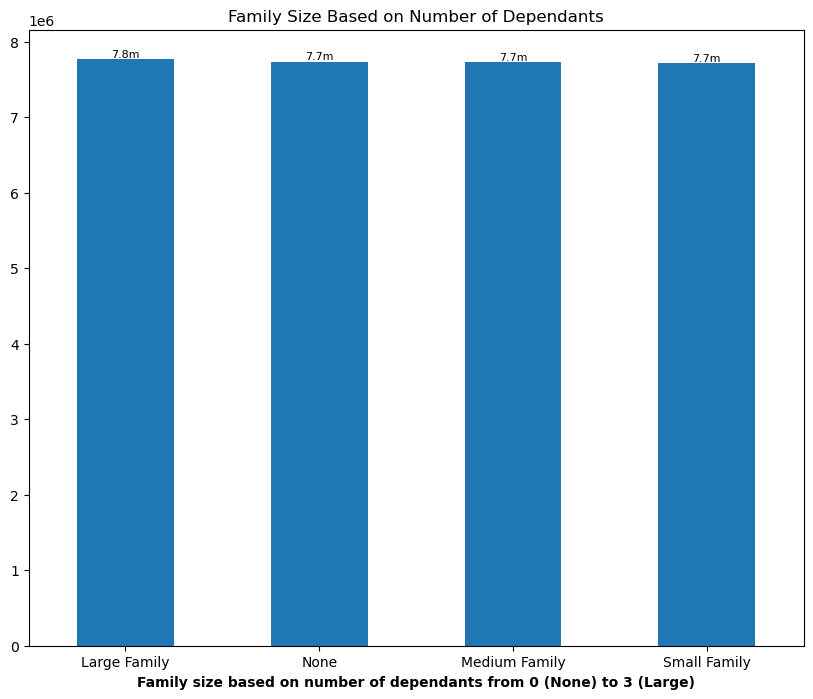

In [1058]:
# Visualize the department names with a bar chart using abbreviated data points
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{count // 1000}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)



# Count the values
fam_size_data = final_data_dept['fam_size'].value_counts()

#Plot
fam_size_bar = fam_size_data.plot.bar(rot=0, figsize=(10,8))

# Access the current Axes object
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='8')



# Customize
plt.title('Family Size Based on Number of Dependants')
plt.xlabel('Family size based on number of dependants from 0 (None) to 3 (Large)', weight='bold')

In [1060]:
# Save Visual
fam_size_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_size_bar_chart.png'))

### Department_ID Profiling 

In [210]:
# Reminder of department_id contents
final_data['department_id'].value_counts(dropna = False)

department_id
4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

In [7]:
# Importing department data in order to match up dept ids with department names
dept_names = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [226]:
# Checking out the imported data before merging with final_data df
dept_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  21 non-null     int64 
 1   department  21 non-null     object
dtypes: int64(1), object(1)
memory usage: 468.0+ bytes


In [228]:
dept_names.value_counts(dropna=False)

Unnamed: 0  department     
1           frozen             1
12          meat seafood       1
20          deli               1
19          snacks             1
18          babies             1
17          household          1
16          dairy eggs         1
15          canned goods       1
14          breakfast          1
13          pantry             1
11          personal care      1
2           other              1
10          bulk               1
9           dry goods pasta    1
8           pets               1
7           beverages          1
6           international      1
5           alcohol            1
4           produce            1
3           bakery             1
21          missing            1
Name: count, dtype: int64

In [9]:
# Changing the name of the 'unnamed' column in the dept_names df so it can merge
dept_names = dept_names.rename(columns={'Unnamed: 0': 'department_id'})

In [242]:
# Checking the rename 
dept_names.head()

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

In [32]:
# Export dataframe before restarting device
final_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.pkl'))

In [5]:
# Importing data after device restart
final_data = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.pkl'))

In [11]:
# Merging dept_names with the final_data 
final_data_dept = dept_names.merge(final_data, on = 'department_id', indicator = True)

In [13]:
# Checking results of the merge
final_data_dept['_merge'].value_counts(dropna=False)

_merge
both          30964564
left_only            0
right_only           0
Name: count, dtype: int64

In [15]:
final_data_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   department_id           int64   
 1   department              object  
 2   order_id                int64   
 3   user_id                 object  
 4   order_number            int64   
 5   orders_day_of_week      int64   
 6   order_hour_of_day       int64   
 7   days_since_prior_order  float64 
 8   product_id              int64   
 9   add_to_cart_order       int64   
 10  reordered               int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  prices                  float64 
 14  price_range_loc         object  
 15  max_order               int64   
 16  loyalty_flag            object  
 17  avg_price               float64 
 18  spending_flag           object  
 19  median_days_since       float64 
 20  frequency_flag          object  
 21  Gender

In [17]:
final_data_dept.head()

department_id department  order_id user_id  order_number  \
0              1     frozen    738281       2             4   
1              1     frozen    738281       2             4   
2              1     frozen    738281       2             4   
3              1     frozen   1199898       2             6   
4              1     frozen    788338       2             8   

   orders_day_of_week  order_hour_of_day  days_since_prior_order  product_id  \
0                   2                 10                     8.0       45613   
1                   2                 10                     8.0        9681   
2                   2                 10                     8.0       21150   
3                   2                  9                    13.0        9681   
4                   1                 15                    27.0        2002   

   add_to_cart_order  ...  Age Date_joined  Dependants  Fam_status Income  \
0                 11  ...   68    7/4/2017           3     married  64940   
1                 12  ...   68    7/4/2017           3     married  64940   
2                 13  ...   68    7/4/2017           3     married  64940   
3                  3  ...   68    7/4/2017           3     married  64940   
4                 14  ...   68    7/4/2017           3     married  64940   

   Region       age_group  income_group      fam_size  _merge  
0    West  Late Adulthood    Low Income  Large Family    both  
1    West  Late Adulthood    Low Income  Large Family    both  
2    West  Late Adulthood    Low Income  Large Family    both  
3    West  Late Adulthood    Low Income  Large Family    both  
4    West  Late Adulthood    Low Income  Large Family    both  

[5 rows x 33 columns]

In [19]:
# Exporting merged data before continuing analysis
final_data_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data_dept.pkl'))

In [23]:
# Dropping the _merge column
final_data_dept = final_data_dept.drop(columns=['_merge'])

In [25]:
# Checking the drop
final_data_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 32 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   department_id           int64  
 1   department              object 
 2   order_id                int64  
 3   user_id                 object 
 4   order_number            int64  
 5   orders_day_of_week      int64  
 6   order_hour_of_day       int64  
 7   days_since_prior_order  float64
 8   product_id              int64  
 9   add_to_cart_order       int64  
 10  reordered               int64  
 11  product_name            object 
 12  aisle_id                int64  
 13  prices                  float64
 14  price_range_loc         object 
 15  max_order               int64  
 16  loyalty_flag            object 
 17  avg_price               float64
 18  spending_flag           object 
 19  median_days_since       float64
 20  frequency_flag          object 
 21  Gender                  objec

Text(0.5, 0, 'Count of Items Ordered')

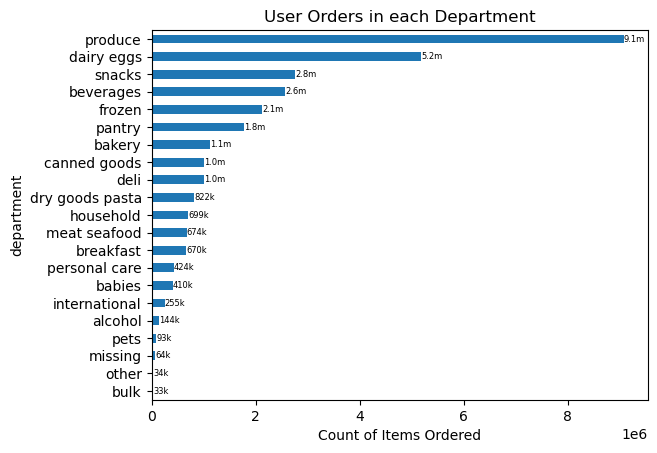

In [124]:
# Visualize the department names with a bar chart using abbreviated data points
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{count // 1000}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)


# Count the values of each department
department_names = final_data_dept['department'].value_counts(dropna=False).sort_values(ascending=True)

# Annotate data point labels
for i, (value, count) in enumerate(department_names.items()):
    formatted_count = abbreviate_count(count)
    plt.text(count, i, formatted_count, ha='left', va='center', fontsize='6')

#Plot a horizontal bar chart
dept_bar = department_names.plot.barh()
plt.title('User Orders in each Department')
plt.xlabel('Count of Items Ordered')

Text(0.5, 0, 'Count of Items Ordered')

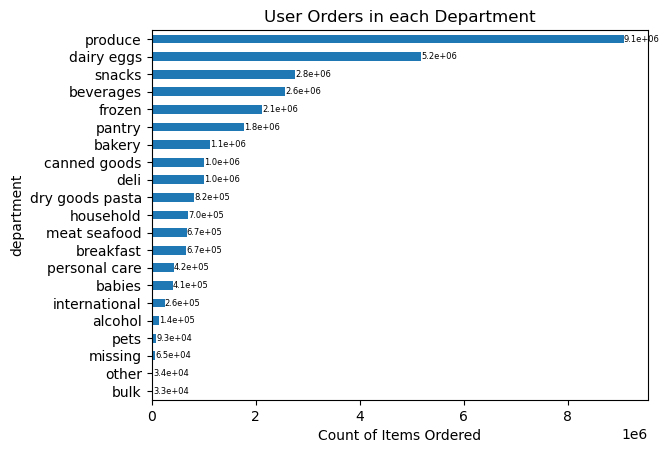

In [110]:
# Visualize the department names with a bar chart
# Count the values of each department
department_names = final_data_dept['department'].value_counts(dropna=False).sort_values(ascending=True)

# Annotate data point labels

for i, (value, count) in enumerate(department_names.items()):
    # Format count with exponent (e.g., 1000 -> 1.0k)
    formatted_count = f'{count:.1e}'
    plt.text(count, i, formatted_count, ha='left', va='center', fontsize="6")

#Plot a horizontal bar chart
dept_bar = department_names.plot.barh()
plt.title('User Orders in each Department')
plt.xlabel('Count of Items Ordered')

In [126]:
# Save Visual
dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'dept_bar_chart.png'), bbox_inches='tight')

### Comparing Profiles with Various Variables

In [170]:
# Create a crosstab of the age and income profiles
crosstab = pd.crosstab(final_data_dept['age_group'], final_data_dept['income_group'], dropna = False)

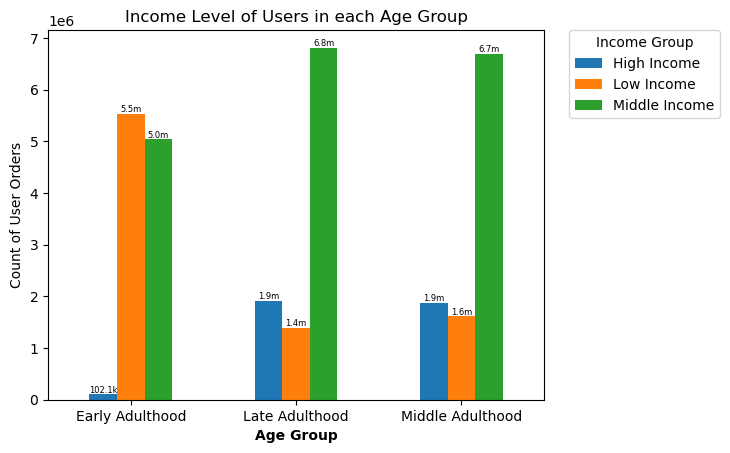

In [172]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
age_income_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Age Group', weight='bold')
plt.title('Income Level of Users in each Age Group') 
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [174]:
# Save Visual
age_income_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income_bar.png'), bbox_inches='tight')

In [782]:
# Create a crosstab of the age and dependants profiles
crosstab = pd.crosstab(final_data_dept['age_group'], final_data_dept['fam_size'], dropna = False)

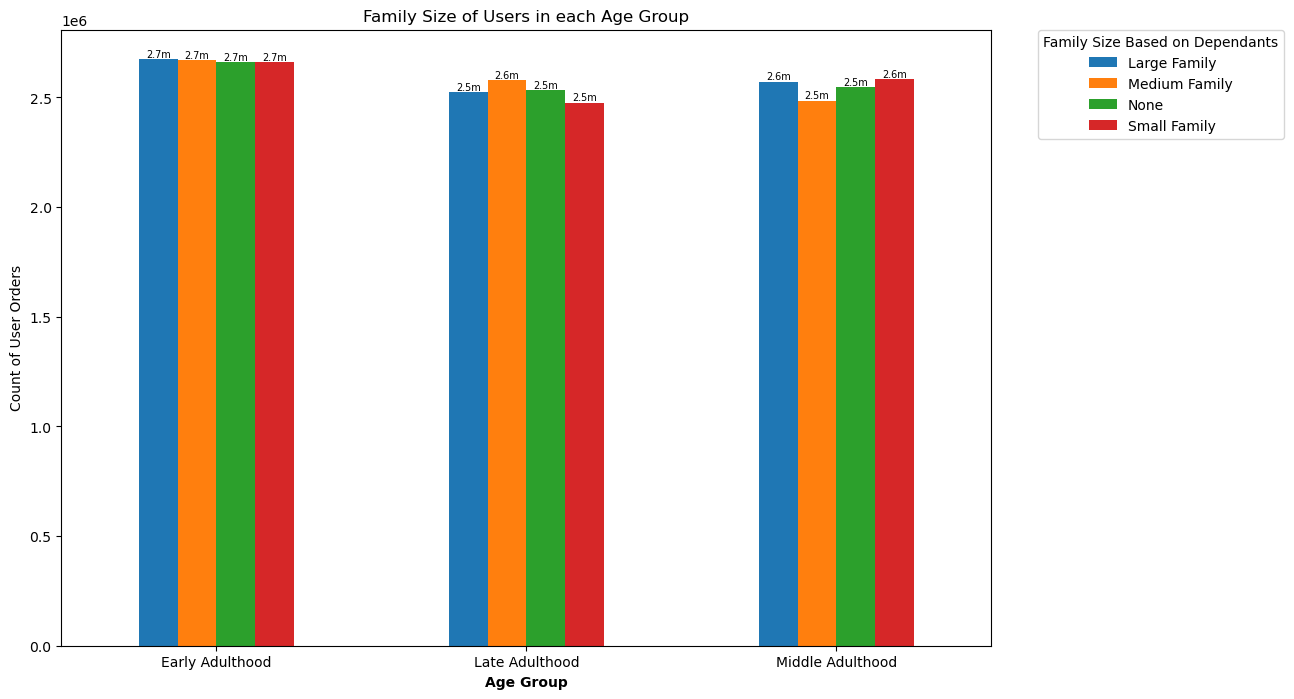

In [786]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{count // 1000}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
age_dependants_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Age Group', weight='bold')
plt.title('Family Size of Users in each Age Group') 
plt.legend(title='Family Size Based on Dependants', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [788]:
# Save Visual
age_dependants_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dependants_bar.png'), bbox_inches='tight')

In [160]:
# Create a crosstab of the age and Fam_status profiles
# Fam_status is similar to fam_size but gives more specific descriptions
crosstab = pd.crosstab(final_data_dept['age_group'], final_data_dept['Fam_status'], dropna = False)

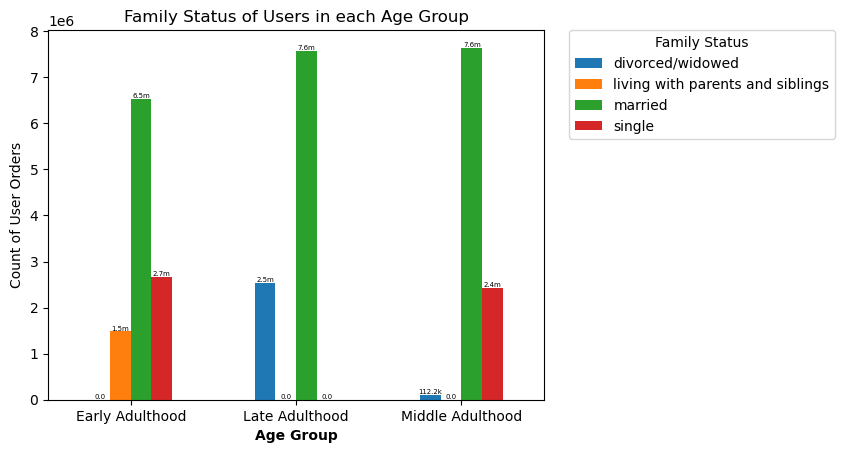

In [166]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
age_family_status_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='5')

plt.ylabel('Count of User Orders')
plt.xlabel('Age Group', weight='bold')
plt.title('Family Status of Users in each Age Group') 
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [168]:
# Save Visual
age_family_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_family_status_bar.png'), bbox_inches='tight')

In [790]:
# Create a crosstab of the age and department profiles
crosstab = pd.crosstab(final_data_dept['department'], final_data_dept['age_group'], dropna = False)

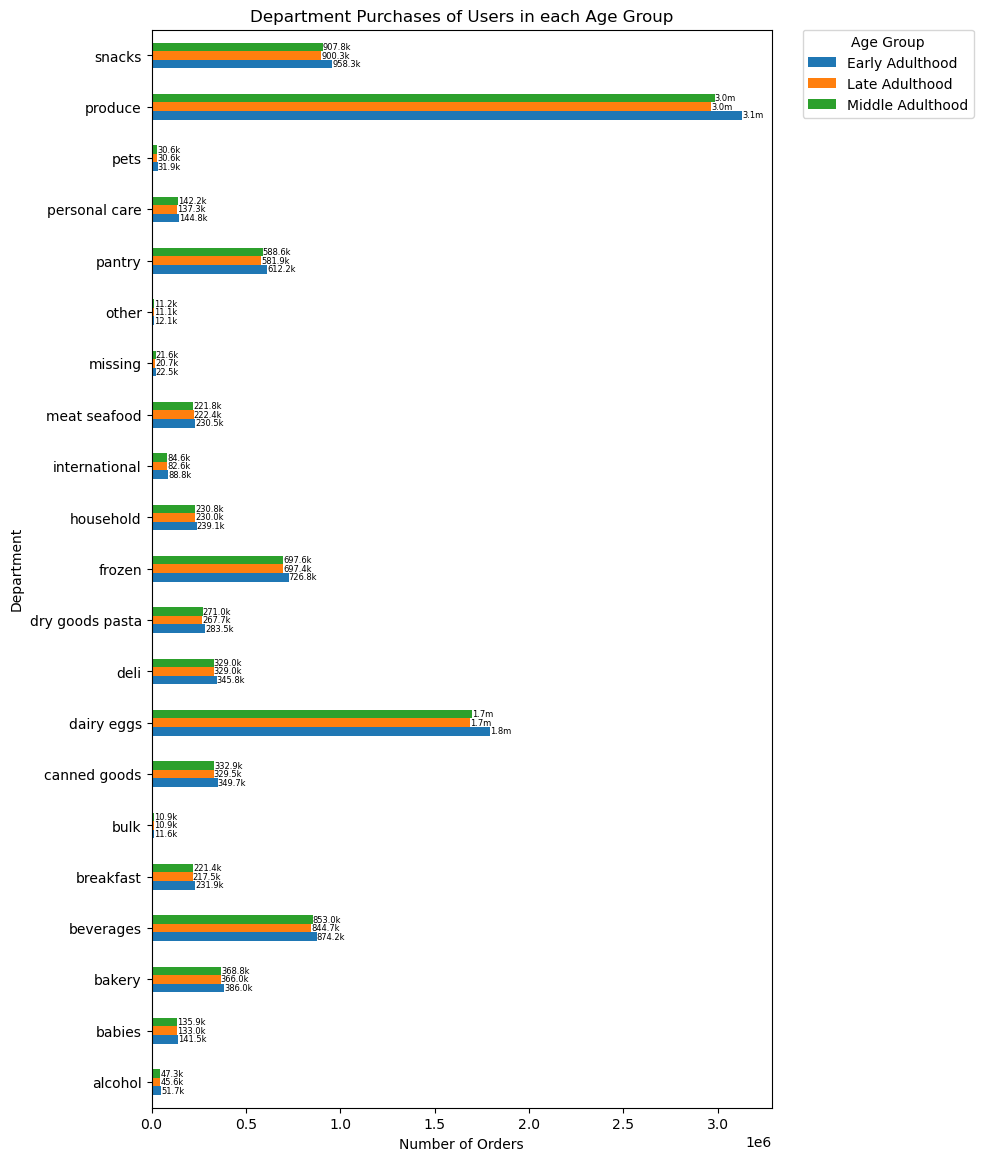

In [794]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
age_departments_bar = crosstab.plot.barh(rot=0, figsize=(8,14))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0:  # Only label every third bar
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')
        
plt.ylabel('Department')
plt.xlabel('Number of Orders')
plt.title('Department Purchases of Users in each Age Group') 
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

#### After many attempts, I cannot figure out how to sort the results in a descending orderbased on the number of user purchases in each department. The main takeaway that every age group has a similar number of purchases in each department is still displayed and will be conveyed in my analysis report.

In [796]:
# Save Visual
age_departments_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_departments_bar.png'), bbox_inches='tight')

In [798]:
# Create a crosstab of the age and region profiles
crosstab = pd.crosstab(final_data_dept['age_group'], final_data_dept['Region'], dropna = False)

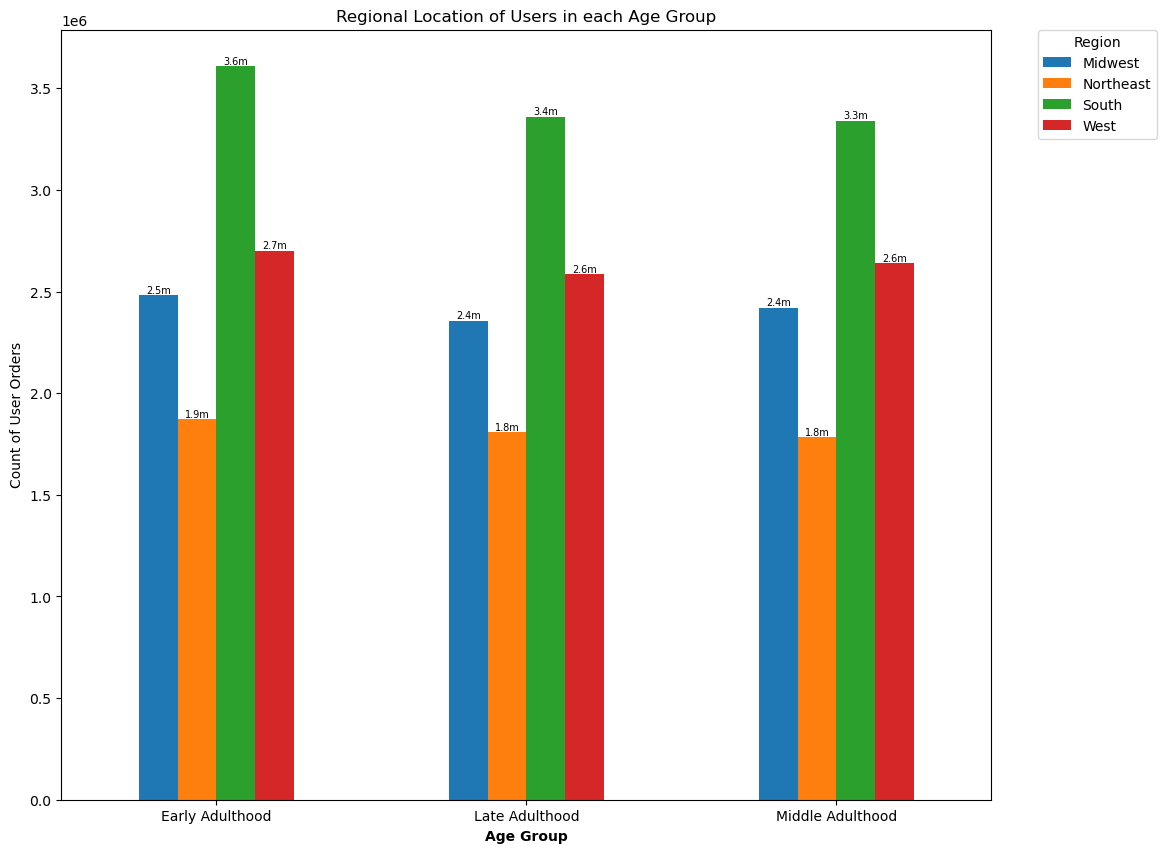

In [802]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
age_region_bar = crosstab.plot.bar(rot=0, figsize=(12,10))
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Age Group', weight='bold')
plt.title('Regional Location of Users in each Age Group') 
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [806]:
# Save Visual
age_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_region_bar.png'), bbox_inches='tight')

In [1146]:
# Create a crosstab of the age and spending profiles
crosstab = pd.crosstab(final_data_dept['age_group'], final_data_dept['spending_flag'], dropna = False)

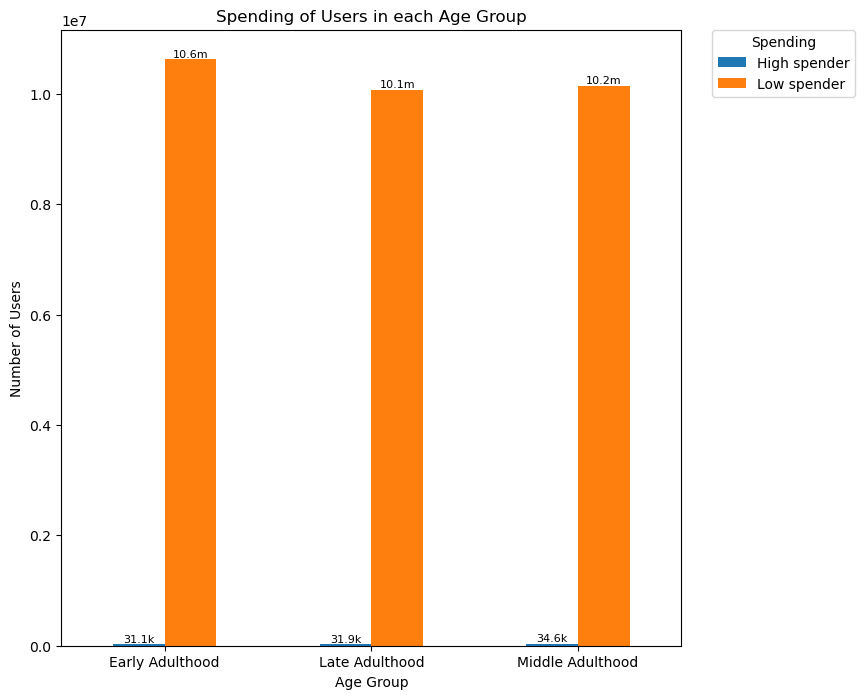

In [1148]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
age_spending_bar = crosstab.plot.bar(rot=0, figsize=(8,8))
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='8')

plt.ylabel('Number of Users')
plt.xlabel('Age Group')
plt.title('Spending of Users in each Age Group') 
plt.legend(title='Spending', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [1150]:
# Save Visual
age_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_spending_bar.png'), bbox_inches='tight')

In [816]:
# Create a crosstab of the age and frequency profiles
crosstab = pd.crosstab(final_data_dept['age_group'], final_data_dept['frequency_flag'], dropna = False)

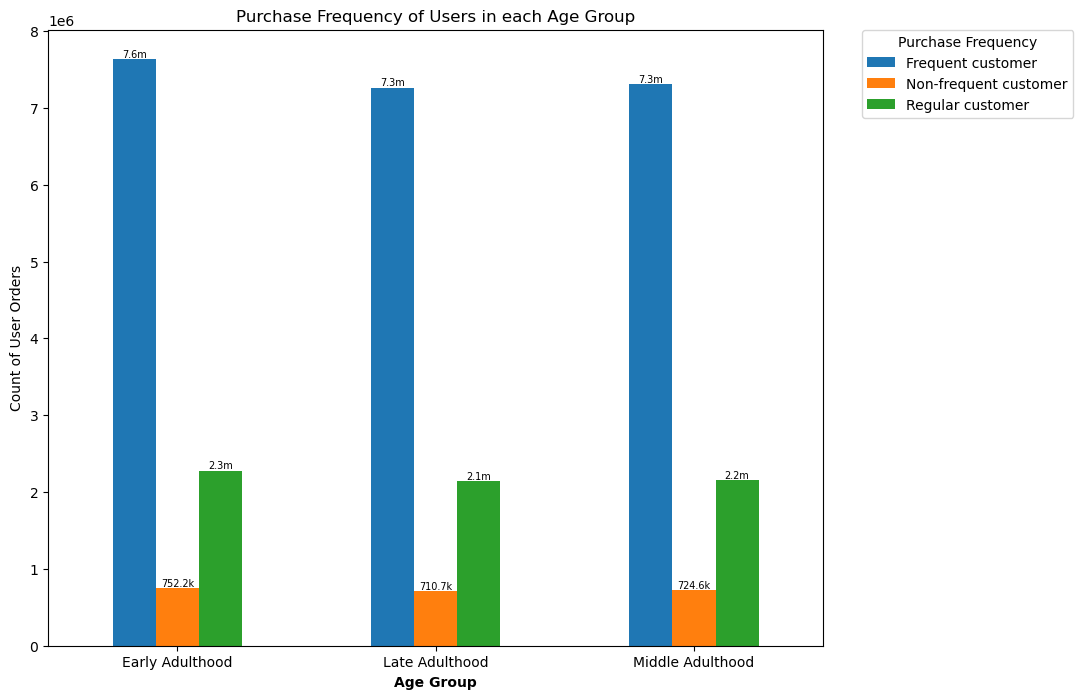

In [820]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
age_frequency_bar = crosstab.plot.bar(rot=0, figsize=(10,8))
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Age Group', weight='bold')
plt.title('Purchase Frequency of Users in each Age Group') 
plt.legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [822]:
# Save Visual
age_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_frequency_bar.png'), bbox_inches='tight')

In [824]:
# Create a crosstab of the age profile and orders_day_of_week values
crosstab = pd.crosstab(final_data_dept['age_group'], final_data_dept['orders_day_of_week'], dropna = False)

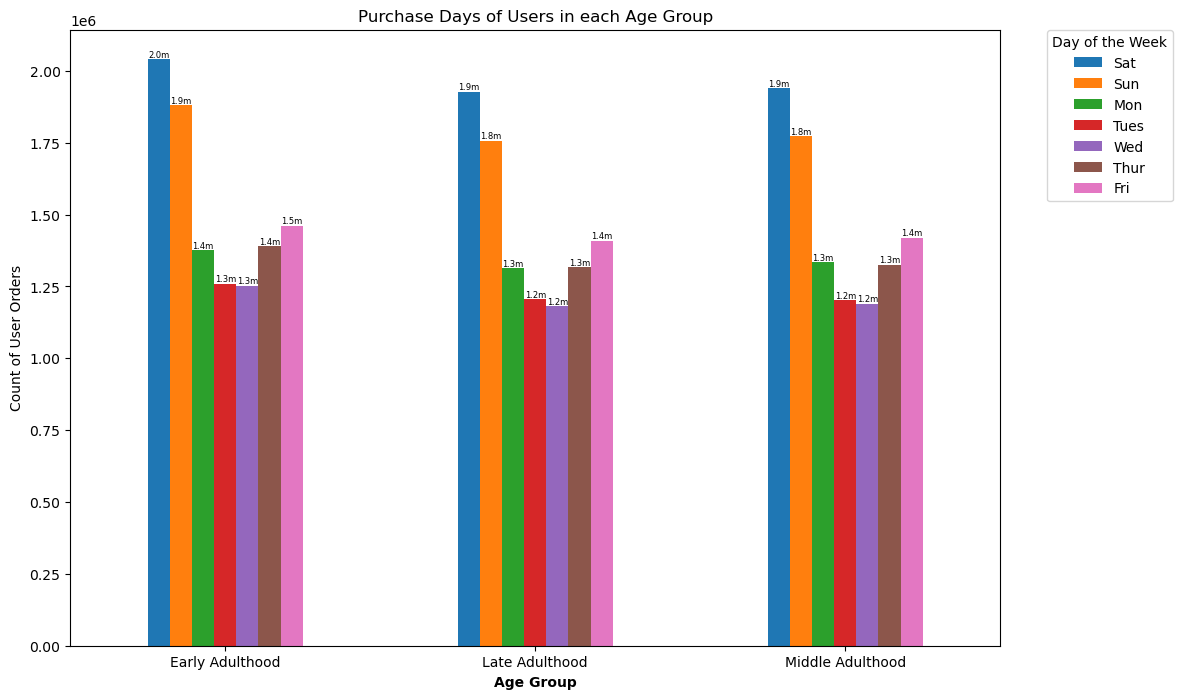

In [830]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
age_dow_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0:  # Only label every third bar
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Age Group', weight='bold')
plt.title('Purchase Days of Users in each Age Group') 
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=[day_names[i] for i in range(7)])

In [832]:
# Save Visual
age_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_dow_bar.png'), bbox_inches='tight')

In [834]:
# Create a crosstab of the age profile and order_hour_of_day values
crosstab = pd.crosstab(final_data_dept['order_hour_of_day'], final_data_dept['age_group'], dropna = False)

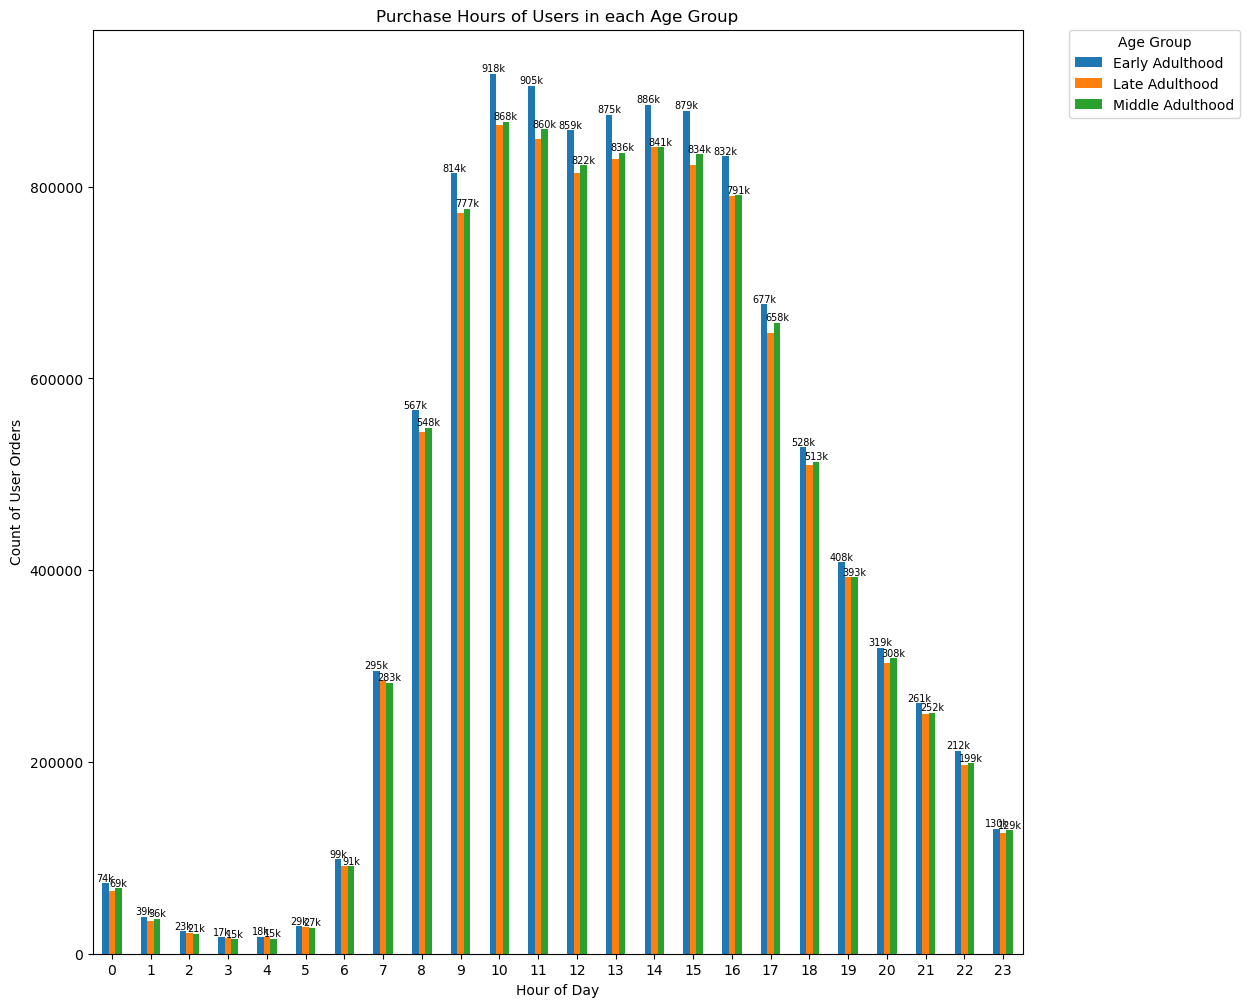

In [842]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.0f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
age_hour_bar = crosstab.plot.bar(rot=0, figsize=(12,12))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 2 == 0:  # Only label every third bar
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Hour of Day')
plt.title('Purchase Hours of Users in each Age Group') 
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [232]:
# Save Visual
age_hour_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_hour_bar.png'), bbox_inches='tight')

In [844]:
# Create a crosstab of the income and dependants profiles
crosstab = pd.crosstab(final_data_dept['income_group'], final_data_dept['fam_size'], dropna = False)

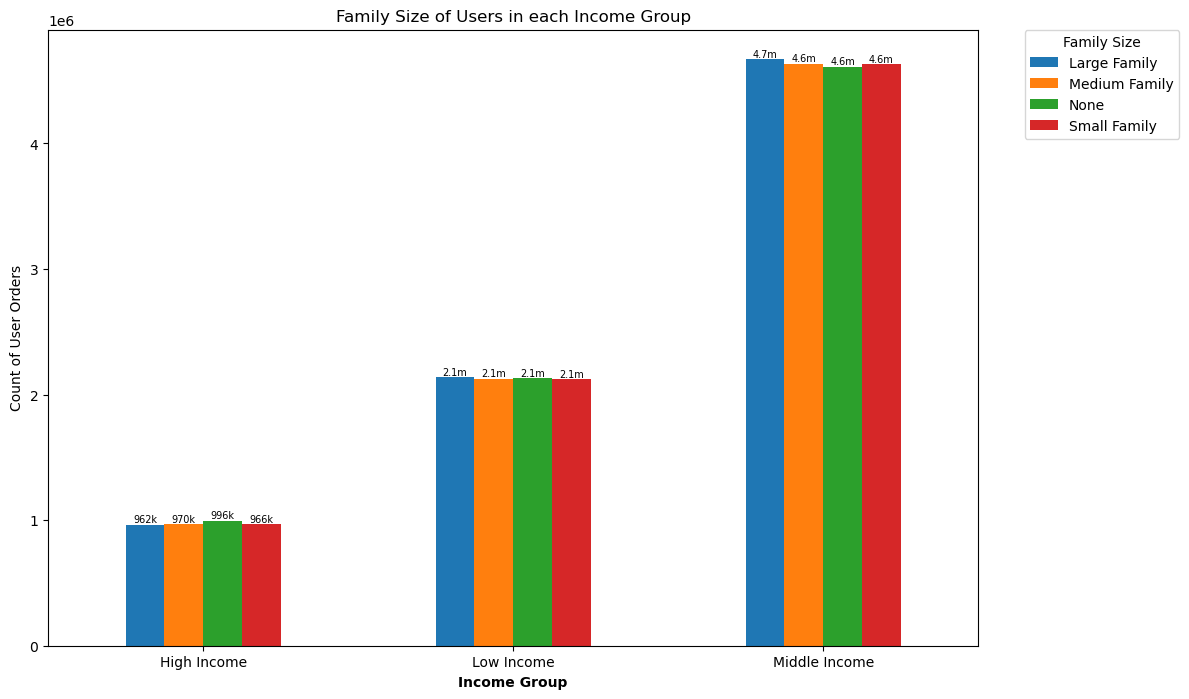

In [846]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
income_fam_size_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Income Group', weight='bold')
plt.title('Family Size of Users in each Income Group') 
plt.legend(title='Family Size', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [848]:
# Save Visual
income_fam_size_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_fam_size_bar.png'), bbox_inches='tight')

In [244]:
# Create a crosstab of the income and family status profiles
crosstab = pd.crosstab(final_data_dept['income_group'], final_data_dept['Fam_status'], dropna = False)

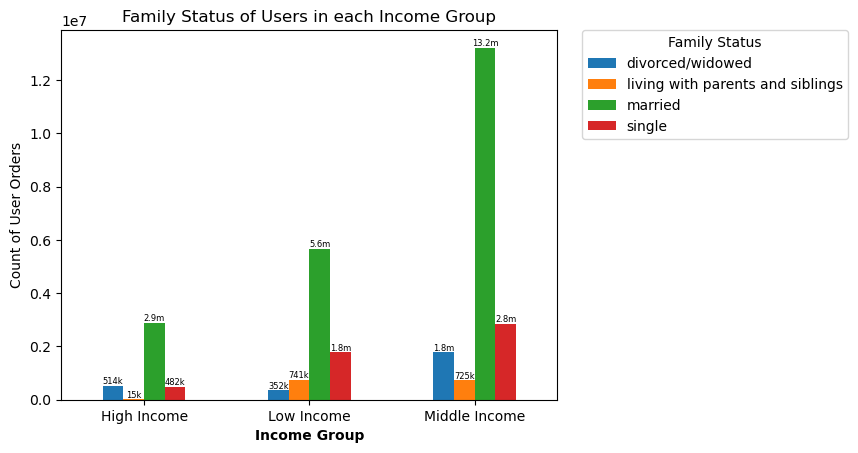

In [248]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
income_fam_status_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Income Group', weight='bold')
plt.title('Family Status of Users in each Income Group') 
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [250]:
# Save Visual
income_fam_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_fam_status_bar.png'), bbox_inches='tight')

In [850]:
# Create a crosstab of the income and department profiles
crosstab = pd.crosstab(final_data_dept['department'], final_data_dept['income_group'])

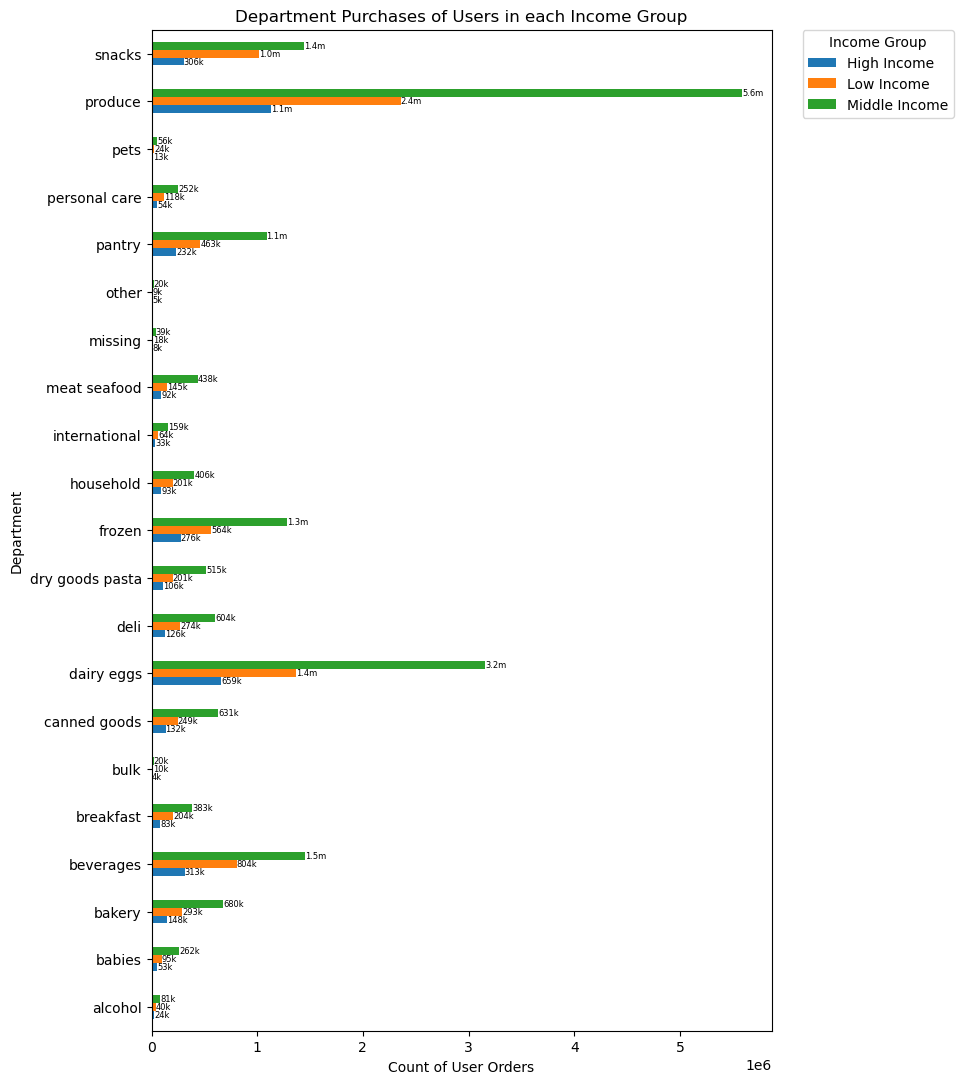

In [856]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
income_department_bar = crosstab.plot.barh(rot=0, figsize=(8,13))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0:  
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Department')
plt.xlabel('Count of User Orders')
plt.title('Department Purchases of Users in each Income Group') 
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [858]:
# Save Visual
income_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_department_bar.png'), bbox_inches='tight')

In [860]:
# Create a crosstab of the income and region profiles
crosstab = pd.crosstab(final_data_dept['income_group'], final_data_dept['Region'])

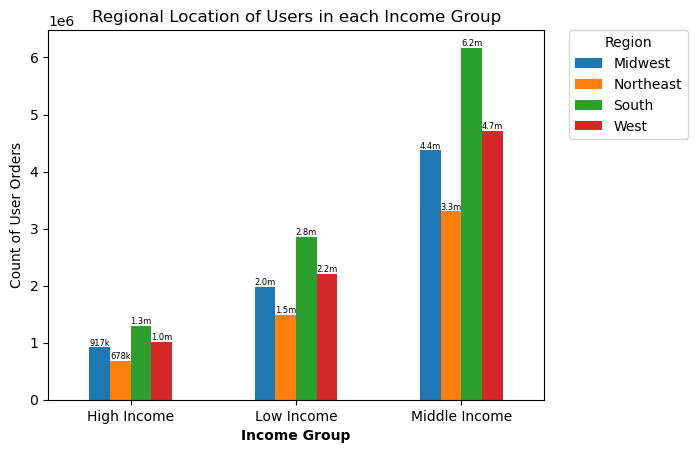

In [268]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
income_region_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Income Group', weight='bold')
plt.title('Regional Location of Users in each Income Group') 
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [270]:
# Save Visual
income_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_region_bar.png'), bbox_inches='tight')

In [862]:
# Create a crosstab of the income and spending profiles
crosstab = pd.crosstab(final_data_dept['income_group'], final_data_dept['spending_flag'])

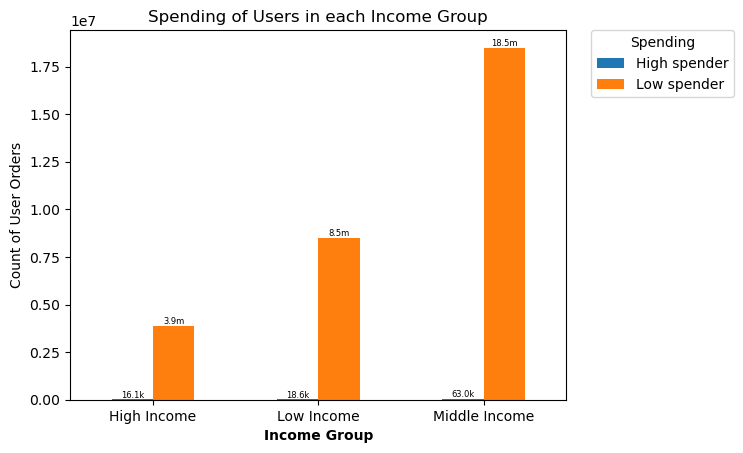

In [276]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
income_spending_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Income Group', weight='bold')
plt.title('Spending of Users in each Income Group') 
plt.legend(title='Spending', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [278]:
# Save Visual
income_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_spending_bar.png'), bbox_inches='tight')

In [280]:
# Create a crosstab of the income and frequency profiles
crosstab = pd.crosstab(final_data_dept['income_group'], final_data_dept['frequency_flag'])

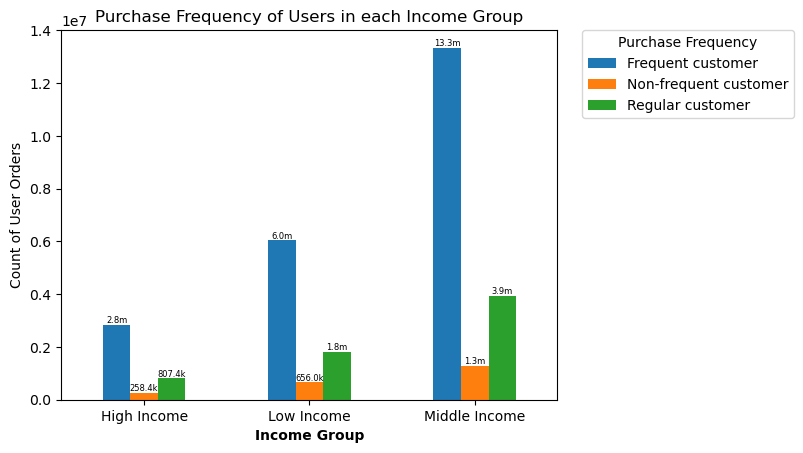

In [282]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
income_frequency_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for container in ax.containers:
    ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Income Group', weight='bold')
plt.title('Purchase Frequency of Users in each Income Group') 
plt.legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [284]:
# Save Visual
income_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_frequency_bar.png'), bbox_inches='tight')

In [864]:
# Create a crosstab of the income profile and orders_day_of_week values
crosstab = pd.crosstab(final_data_dept['income_group'], final_data_dept['orders_day_of_week'], dropna = False)

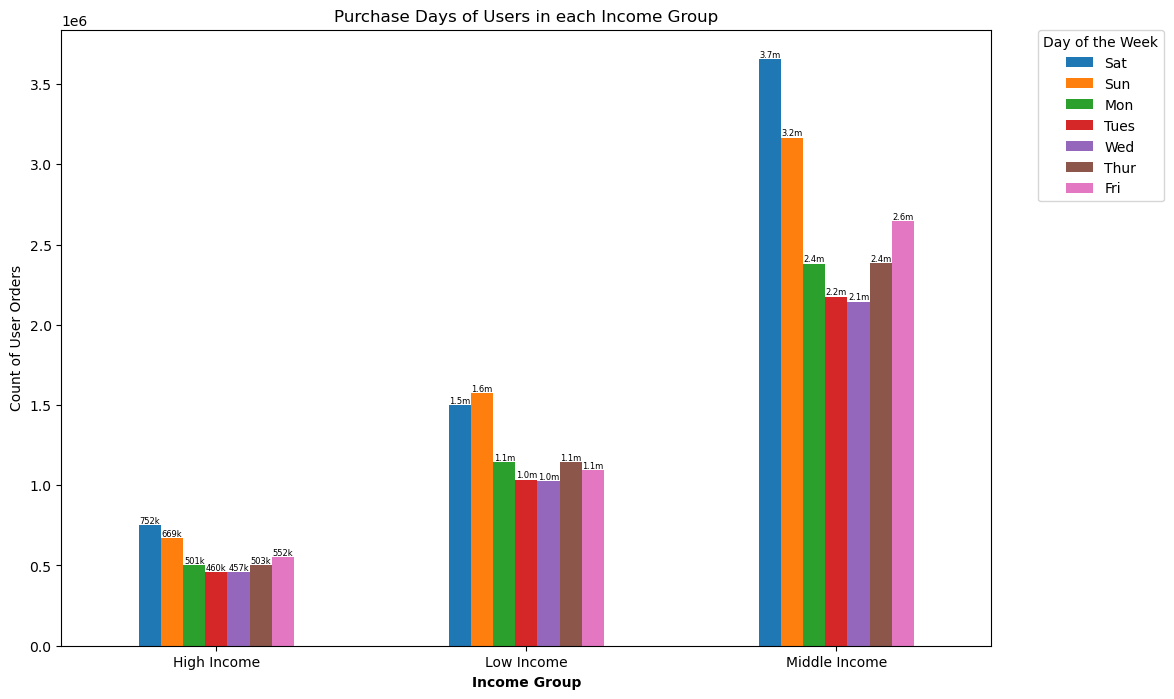

In [868]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
Income_dow_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0:  # Only label every third bar
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Income Group', weight='bold')
plt.title('Purchase Days of Users in each Income Group') 
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=[day_names[i] for i in range(7)])

In [870]:
# Save Visual
Income_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'Income_dow_bar.png'), bbox_inches='tight')

In [872]:
# Create a crosstab of the income profile and order_hour_of_day values
crosstab = pd.crosstab(final_data_dept['order_hour_of_day'], final_data_dept['income_group'], dropna = False)

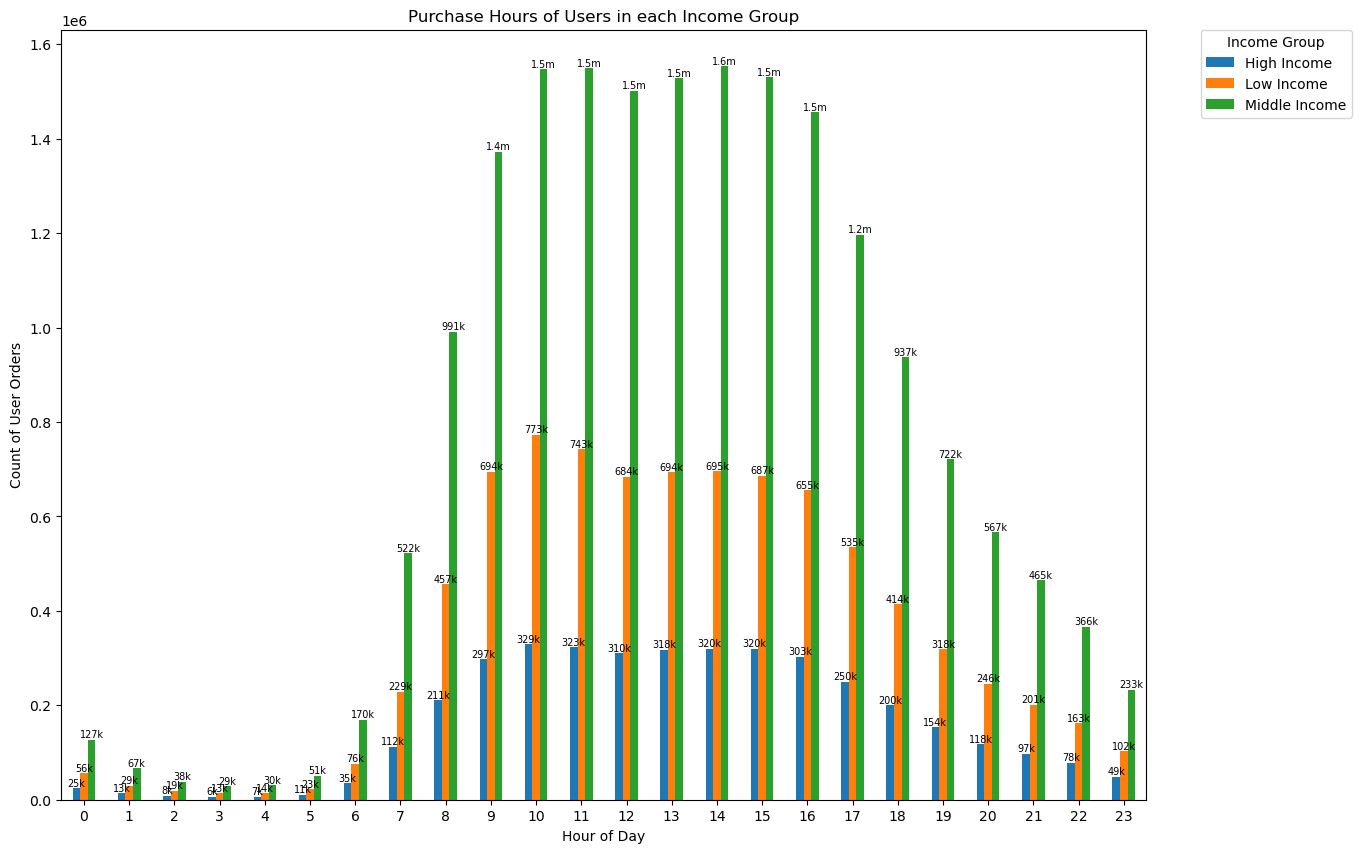

In [880]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
income_hour_bar = crosstab.plot.bar(rot=0, figsize=(14,10))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Hour of Day')
plt.title('Purchase Hours of Users in each Income Group') 
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [882]:
# Save Visual
income_hour_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'income_hour_bar.png'), bbox_inches='tight')

In [884]:
# Create a crosstab of the region and dependants profiles
crosstab = pd.crosstab(final_data_dept['Region'], final_data_dept['fam_size'], dropna = False)

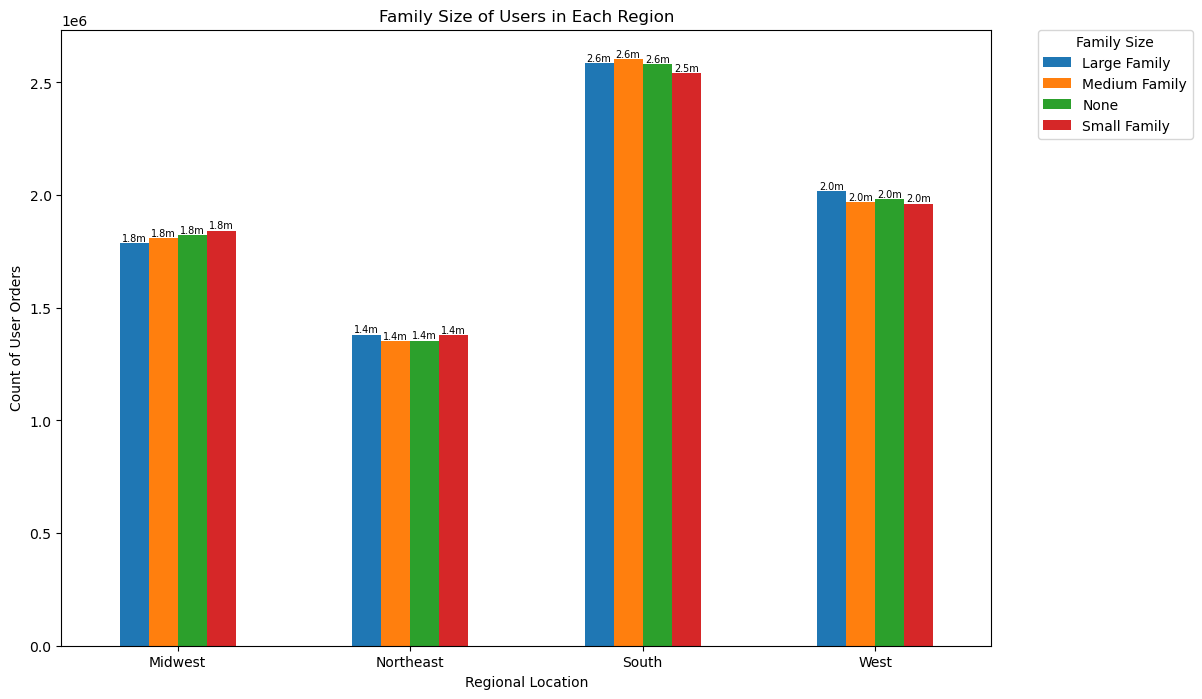

In [888]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
region_fam_size_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Regional Location')
plt.title('Family Size of Users in Each Region') 
plt.legend(title='Family Size', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [890]:
# Save Visual
region_fam_size_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_fam_size_bar.png'), bbox_inches='tight')

In [892]:
# Create a crosstab of the region and family status profiles
crosstab = pd.crosstab(final_data_dept['Region'], final_data_dept['Fam_status'], dropna = False)

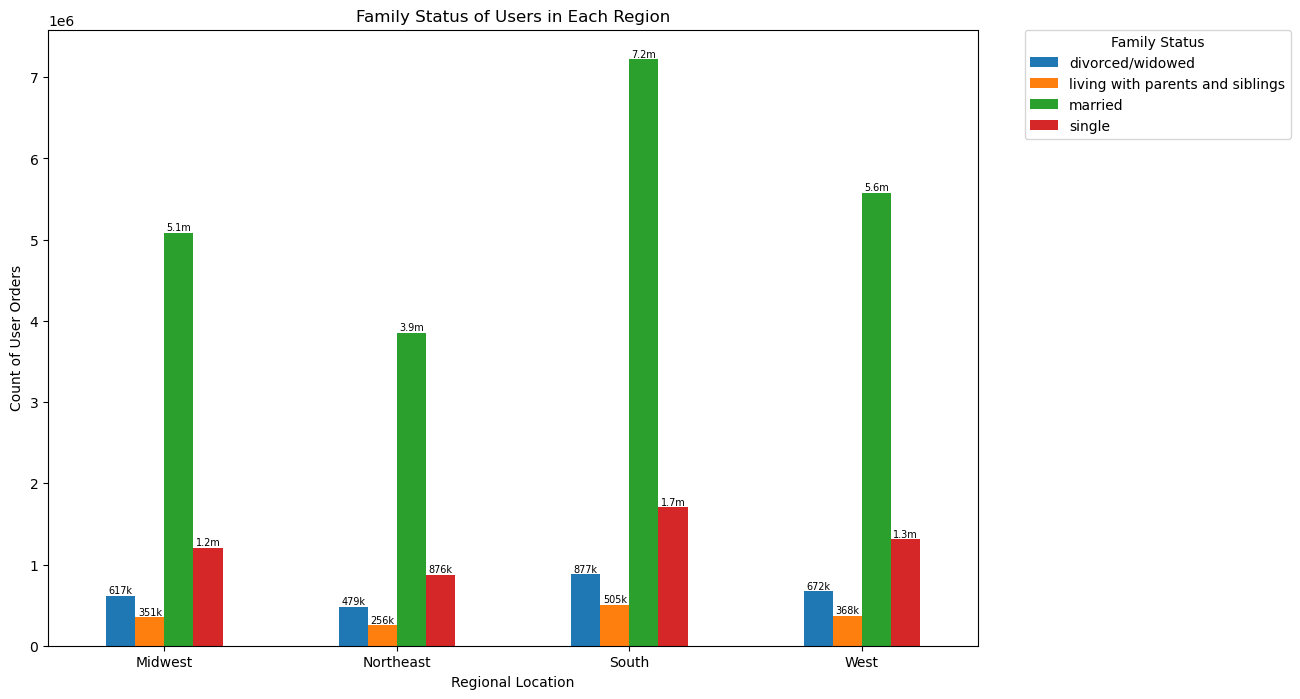

In [896]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
region_fam_status_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Regional Location')
plt.title('Family Status of Users in Each Region') 
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [898]:
# Save Visual
region_fam_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_fam_status_bar.png'), bbox_inches='tight')

In [900]:
# Create a crosstab of the region and department profiles
crosstab = pd.crosstab(final_data_dept['department'], final_data_dept['Region'])

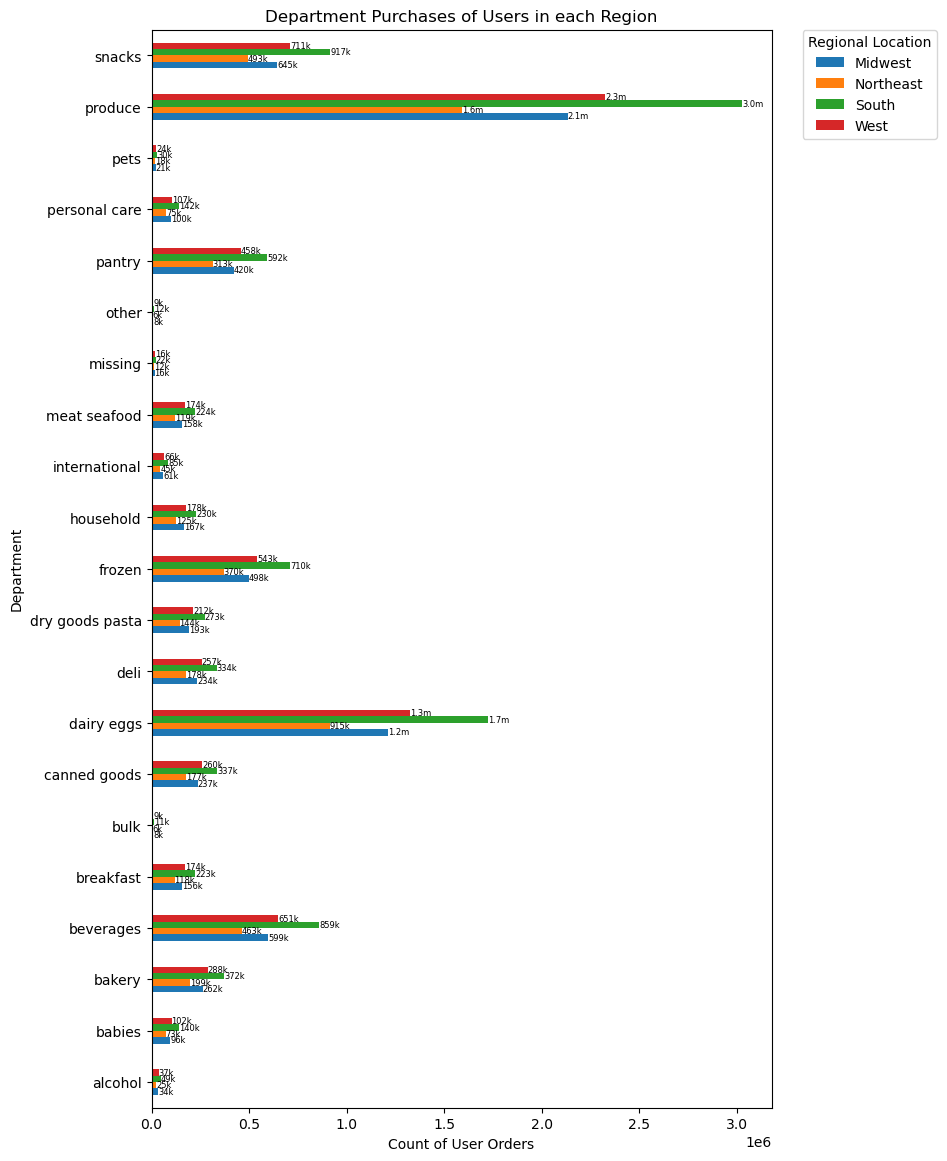

In [904]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
region_department_bar = crosstab.plot.barh(rot=0, figsize=(8,14))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Department')
plt.xlabel('Count of User Orders')
plt.title('Department Purchases of Users in each Region') 
plt.legend(title='Regional Location', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [906]:
# Save Visual
region_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_department_bar.png'), bbox_inches='tight')

In [350]:
# Create a crosstab of the region and spending profiles
crosstab = pd.crosstab(final_data_dept['Region'], final_data_dept['spending_flag'], dropna = False)

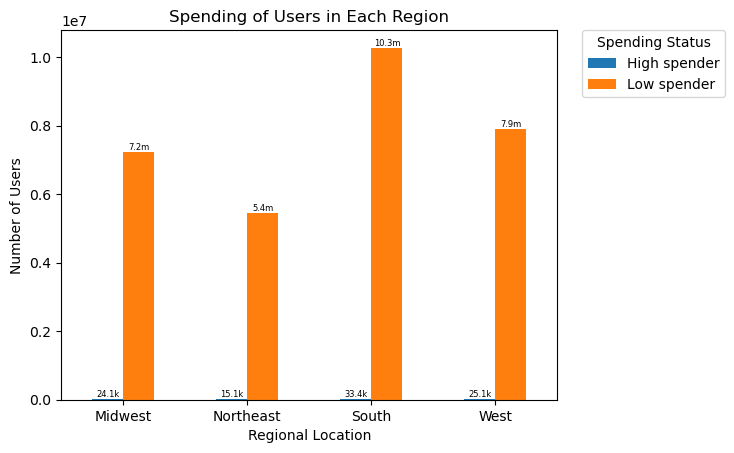

In [358]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
region_spending_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Number of Users')
plt.xlabel('Regional Location')
plt.title('Spending of Users in Each Region') 
plt.legend(title='Spending Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [360]:
# Save Visual
region_spending_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_spending_bar.png'), bbox_inches='tight')

In [362]:
# Create a crosstab of the region and frequency profiles
crosstab = pd.crosstab(final_data_dept['Region'], final_data_dept['frequency_flag'], dropna = False)

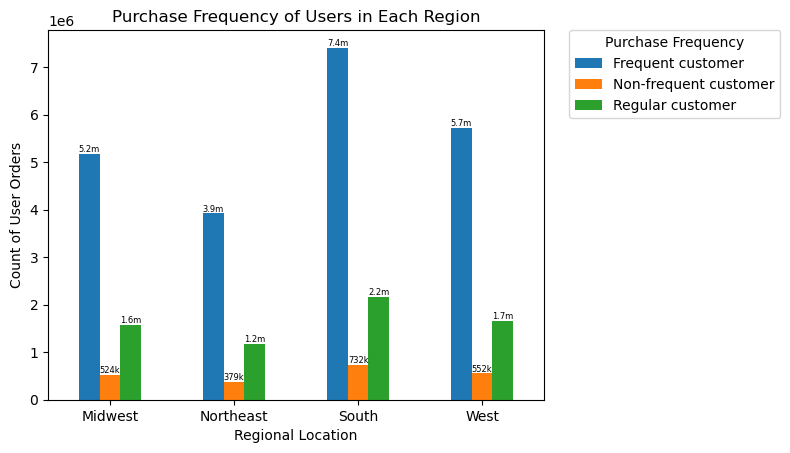

In [366]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
region_frequency_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Regional Location')
plt.title('Purchase Frequency of Users in Each Region') 
plt.legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [368]:
# Save Visual
region_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_frequency_bar.png'), bbox_inches='tight')

In [908]:
# Create a crosstab of the region profile and orders_day_of_week values
crosstab = pd.crosstab(final_data_dept['Region'], final_data_dept['orders_day_of_week'], dropna = False)

In [36]:
# Creating a reference  for week day names
day_names = {0: 'Sat', 1: 'Sun', 2: 'Mon', 3: 'Tues', 4: 'Wed', 5: 'Thur', 6: 'Fri'}

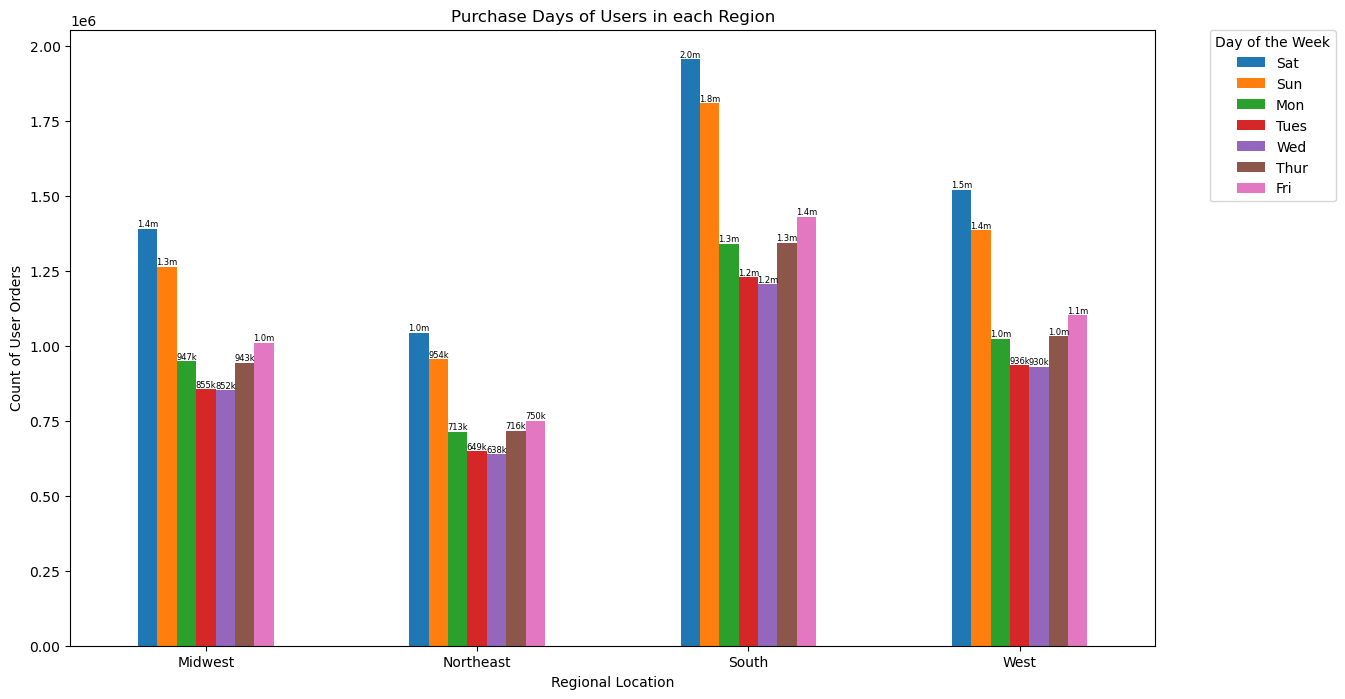

In [918]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
region_dow_bar = crosstab.plot.bar(rot=0, figsize=(14,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Regional Location')
plt.title('Purchase Days of Users in each Region') 
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=[day_names[i] for i in range(7)])

In [920]:
# Save Visual
region_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_dow_bar.png'), bbox_inches='tight')

In [376]:
# Create a crosstab of the region profile and order_hour_of_day values
crosstab = pd.crosstab(final_data_dept['order_hour_of_day'], final_data_dept['Region'], dropna = False)

<Figure size 2000x2000 with 0 Axes>

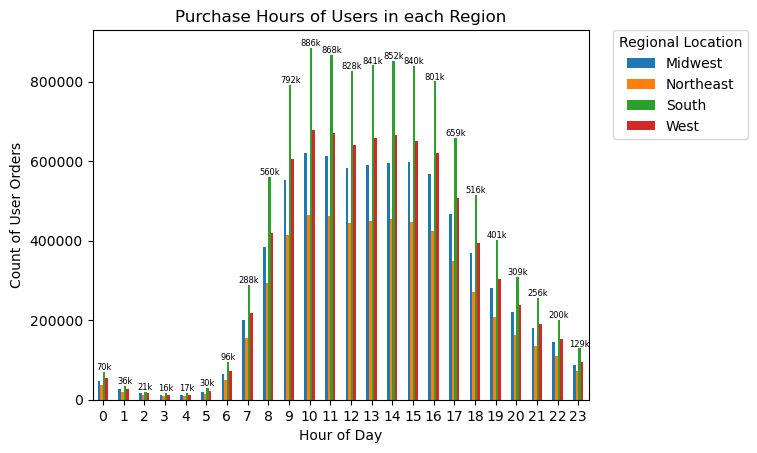

<Figure size 2000x2000 with 0 Axes>

In [380]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
region_hour_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 3 == 2: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Hour of Day')
plt.title('Purchase Hours of Users in each Region') 
plt.legend(title='Regional Location', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.figure(figsize=(20, 20))

In [382]:
# Save Visual
region_hour_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_hour_bar.png'), bbox_inches='tight')

In [922]:
# Create a crosstab of the family status and departments profiles
crosstab = pd.crosstab(final_data_dept['department'], final_data_dept['Fam_status'], dropna = False)

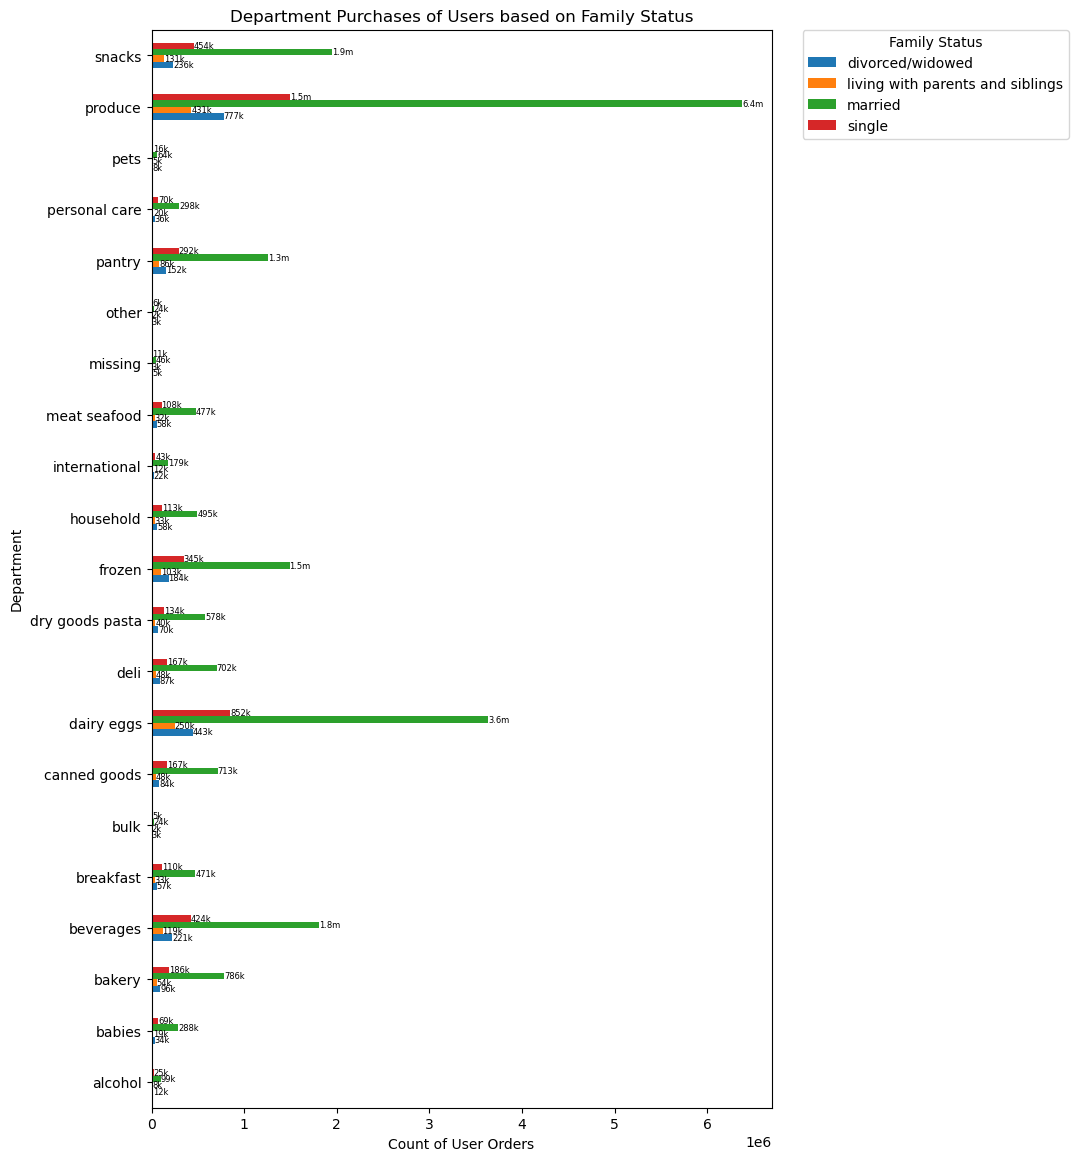

In [926]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
fam_status_department_bar = crosstab.plot.barh(rot=0, figsize=(8,14))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Department')
plt.xlabel('Count of User Orders')
plt.title('Department Purchases of Users based on Family Status') 
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [928]:
# Save Visual
fam_status_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_department_bar.png'), bbox_inches='tight')

In [930]:
# Create a crosstab of the family status and gender profiles
crosstab = pd.crosstab(final_data_dept['Gender'], final_data_dept['Fam_status'], dropna = False)

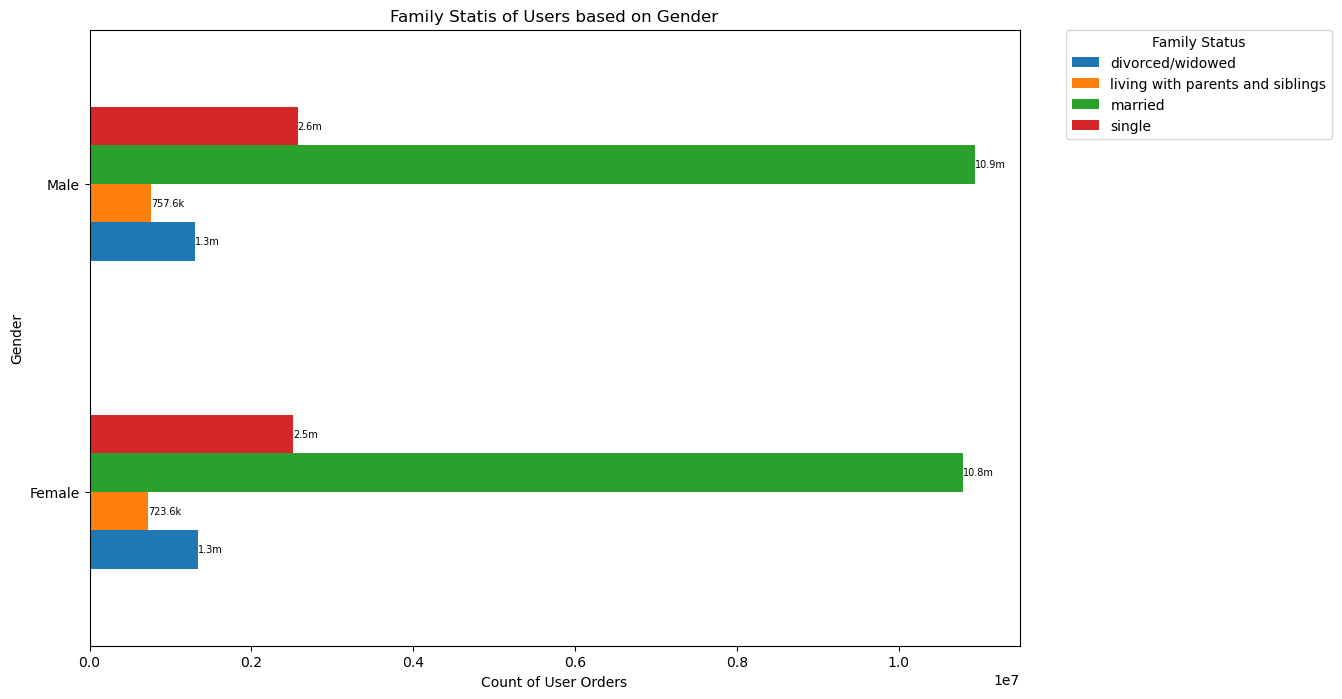

In [938]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
fam_status_gender_bar = crosstab.plot.barh(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Gender')
plt.xlabel('Count of User Orders')
plt.title('Family Statis of Users based on Gender') 
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [940]:
# Save Visual
fam_status_gender_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_gender_bar.png'), bbox_inches='tight')

In [942]:
# Create a crosstab of the gender and departments profiles
crosstab = pd.crosstab(final_data_dept['department'], final_data_dept['Gender'], dropna = False)

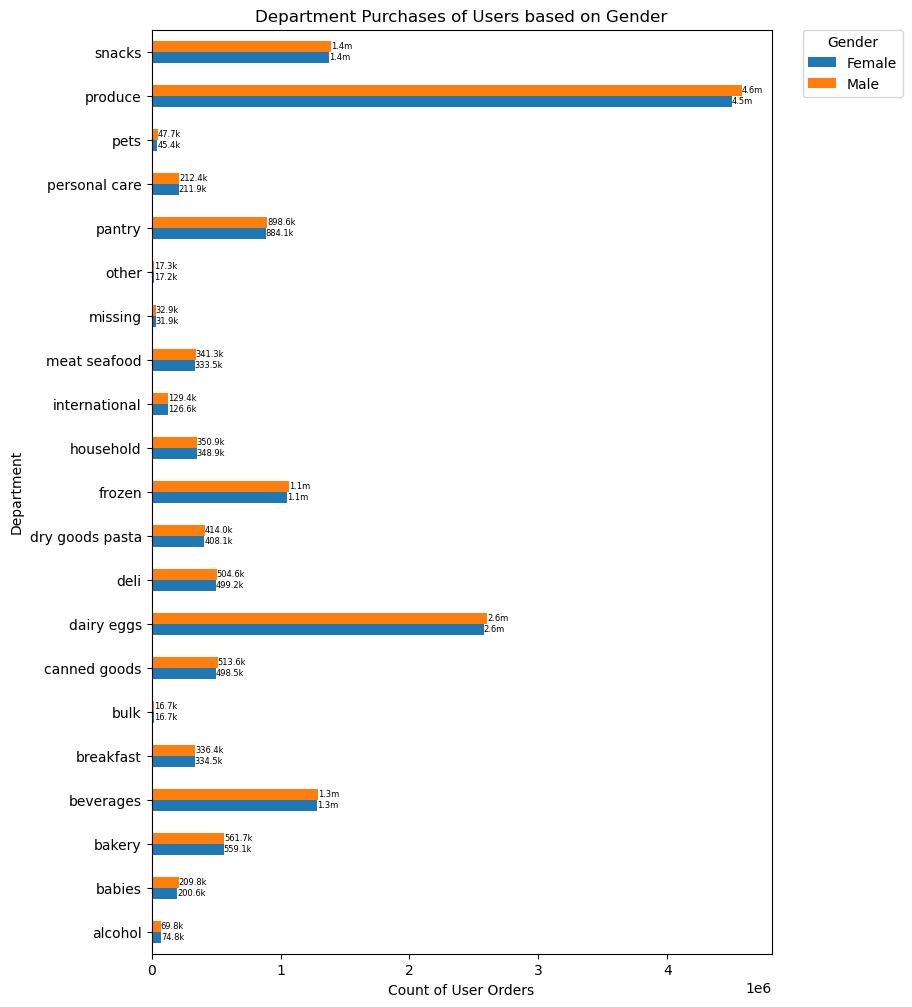

In [944]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
gender_department_bar = crosstab.plot.barh(rot=0, figsize=(8,12))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Department')
plt.xlabel('Count of User Orders')
plt.title('Department Purchases of Users based on Gender') 
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [946]:
# Save Visual
gender_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_department_bar.png'), bbox_inches='tight')

In [ ]:
# Export dataframe before restarting device
final_data.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data.pkl'))

In [5]:
# Importing data after device restart
final_data_dept = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data_dept.pkl'))

In [7]:
# Data Check
final_data_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 33 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   department_id           int64   
 1   department              object  
 2   order_id                int64   
 3   user_id                 object  
 4   order_number            int64   
 5   orders_day_of_week      int64   
 6   order_hour_of_day       int64   
 7   days_since_prior_order  float64 
 8   product_id              int64   
 9   add_to_cart_order       int64   
 10  reordered               int64   
 11  product_name            object  
 12  aisle_id                int64   
 13  prices                  float64 
 14  price_range_loc         object  
 15  max_order               int64   
 16  loyalty_flag            object  
 17  avg_price               float64 
 18  spending_flag           object  
 19  median_days_since       float64 
 20  frequency_flag          object  
 21  Gender

In [9]:
# Dropping the _merge column
final_data_dept = final_data_dept.drop(columns=['_merge'])

In [11]:
# Export dataframe before restarting device
final_data_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data_dept.pkl'))

### Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts..

In [16]:
# Check on the prange_range_loc value counts
final_data_dept['price_range_loc'].value_counts(dropna=False)

price_range_loc
Mid-range product     20896648
Low-range product      9674840
High-range product      393076
Name: count, dtype: int64

Text(0, 0.5, 'Order Count')

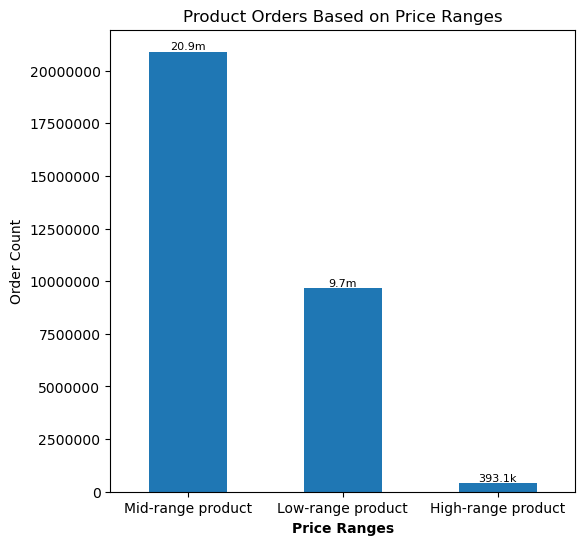

In [454]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Calculate value counts
price_range=final_data_dept['price_range_loc'].value_counts(dropna=False)

#Plot
price_range_bar=price_range.plot.bar(rot=0,figsize=(6,6))

# Access the current Axes object
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='8')

price_range_bar.set_title('Product Orders Based on Price Ranges')
price_range_bar.ticklabel_format(axis='y', style='plain')
price_range_bar.set_xlabel('Price Ranges', weight='bold')
price_range_bar.set_ylabel('Order Count')

In [456]:
# Save Visual
price_range_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_range_bar.png'), bbox_inches='tight')

In [52]:
final_data_dept['order_number'].describe()

count    3.096456e+07
mean     1.783414e+01
std      1.763442e+01
min      1.000000e+00
25%      5.000000e+00
50%      1.200000e+01
75%      2.500000e+01
max      9.900000e+01
Name: order_number, dtype: float64

In [950]:
# Create a crosstab of the loyalty and departments profiles
crosstab = pd.crosstab(final_data_dept['department'], final_data_dept['loyalty_flag'], dropna = False)

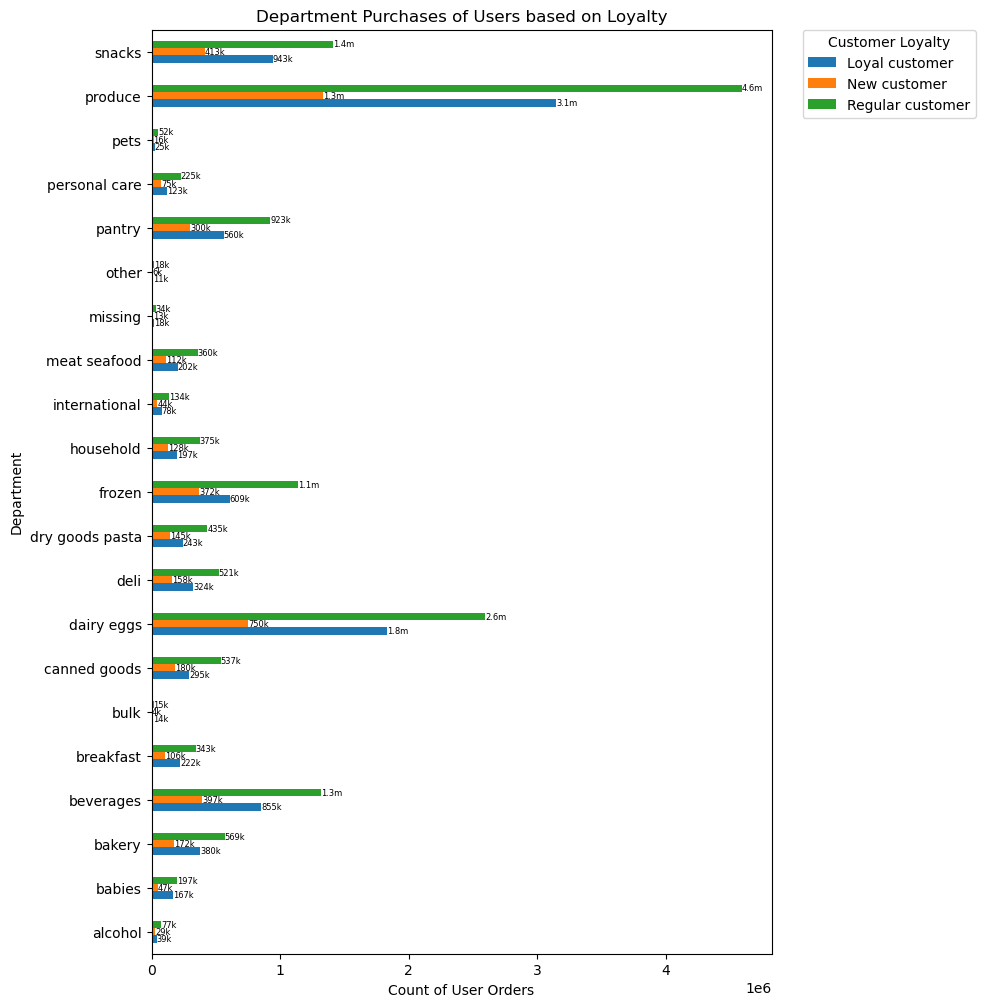

In [952]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
loyal_department_bar = crosstab.plot.barh(rot=0, figsize=(8,12))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Department')
plt.xlabel('Count of User Orders')
plt.title('Department Purchases of Users based on Loyalty') 
plt.legend(title='Customer Loyalty', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [954]:
# Save Visual
loyal_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_department_bar.png'), bbox_inches='tight')

In [468]:
# Create a crosstab of the spending and loyalty profiles
crosstab = pd.crosstab(final_data_dept['spending_flag'], final_data_dept['loyalty_flag'], dropna = False)

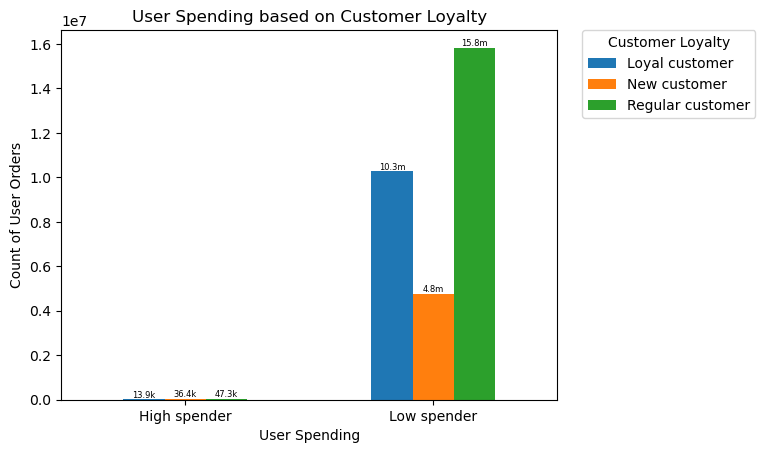

In [472]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
spending_loyalty_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')


plt.ylabel('Count of User Orders')
plt.xlabel('User Spending')
plt.title('User Spending based on Customer Loyalty') 
plt.legend(title='Customer Loyalty', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [474]:
# Save Visual
spending_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'spending_loyalty_bar.png'), bbox_inches='tight')

In [476]:
# Create a crosstab of the frequency and loyalty profiles
crosstab = pd.crosstab(final_data_dept['frequency_flag'], final_data_dept['loyalty_flag'], dropna = False)

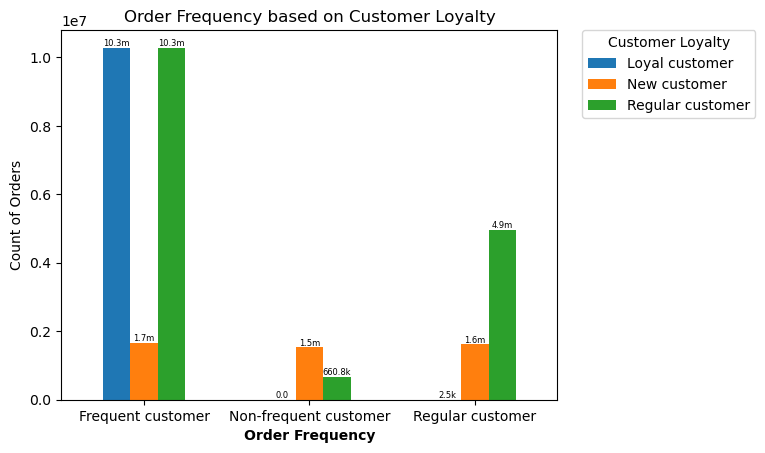

In [480]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
frequency_loyalty_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of Orders')
plt.xlabel('Order Frequency', weight='bold')
plt.title('Order Frequency based on Customer Loyalty') 
plt.legend(title='Customer Loyalty', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [482]:
# Save Visual
frequency_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency_loyalty_bar.png'), bbox_inches='tight')

In [956]:
# Create a crosstab of the weekday orders column and loyalty profile
crosstab = pd.crosstab(final_data_dept['loyalty_flag'], final_data_dept['orders_day_of_week'], dropna = False)

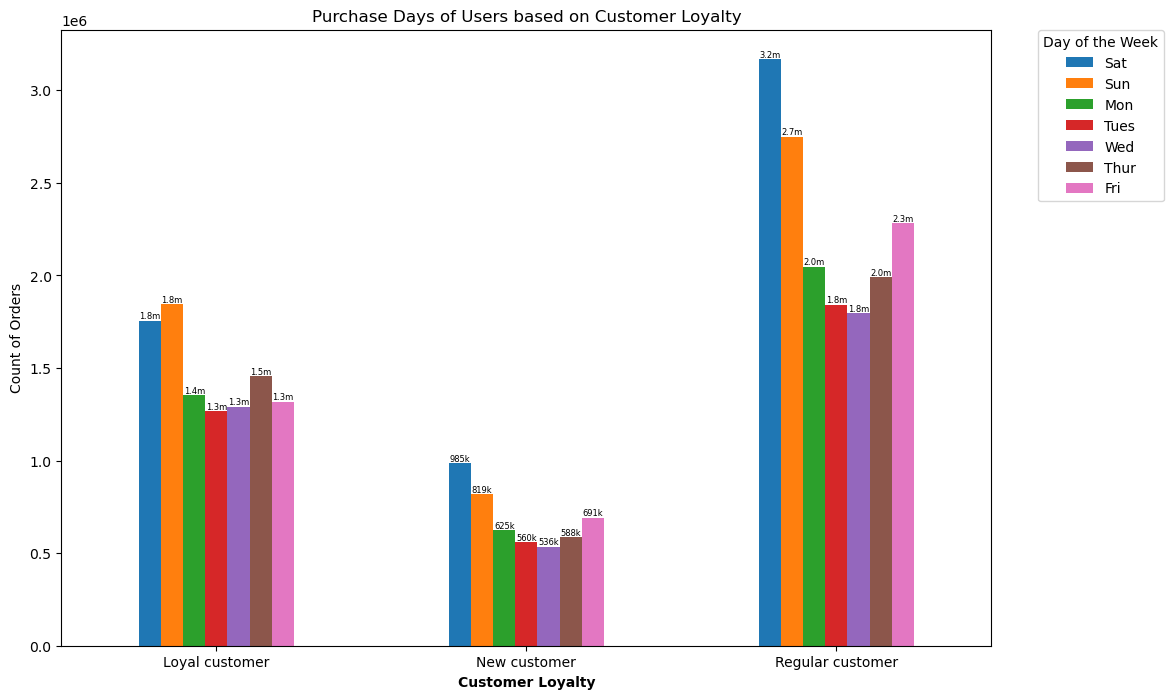

In [958]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
loyalty_weekday_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')


plt.ylabel('Count of Orders')
plt.xlabel('Customer Loyalty', weight='bold')
plt.title('Purchase Days of Users based on Customer Loyalty') 
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=[day_names[i] for i in range(7)])

In [960]:
# Save Visual
loyalty_weekday_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_weekday_bar.png'), bbox_inches='tight')

In [962]:
# Create a crosstab of the order hour column and loyalty profile
crosstab = pd.crosstab(final_data_dept['order_hour_of_day'], final_data_dept['loyalty_flag'], dropna = False)

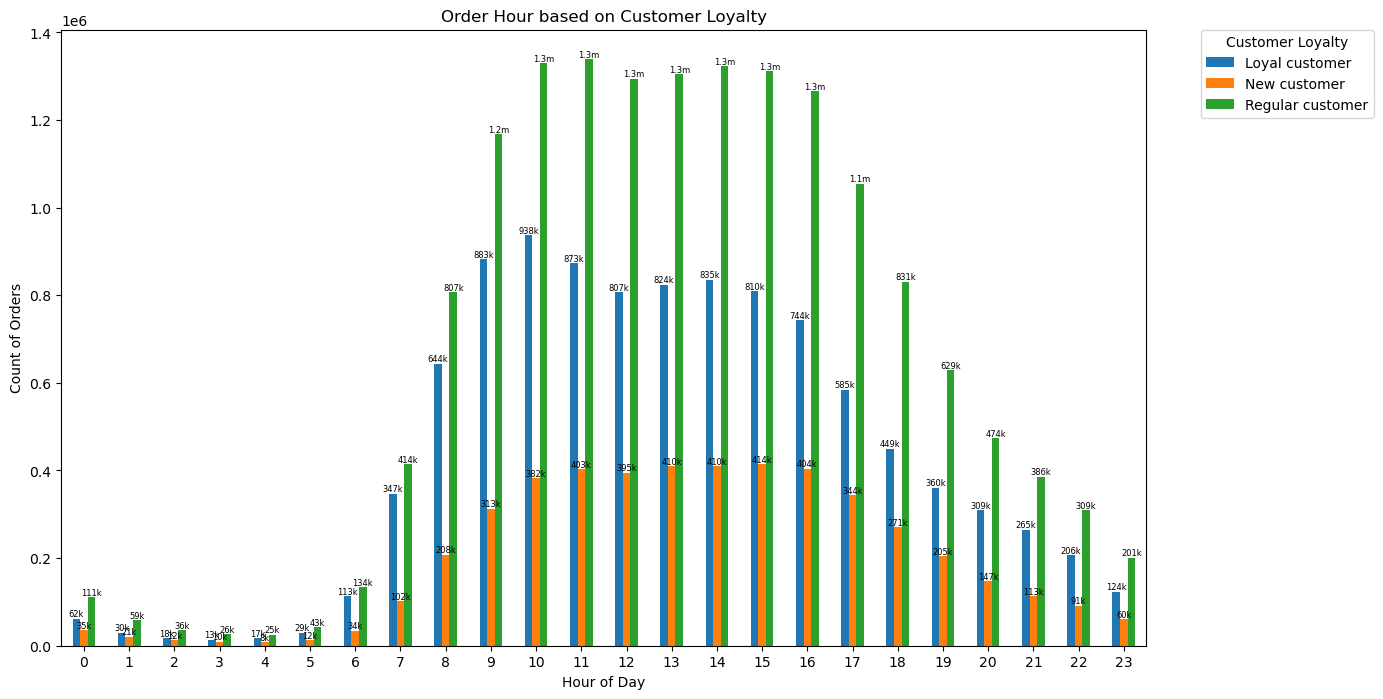

In [970]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
loyalty_hour_bar = crosstab.plot.bar(rot=0, figsize=(14,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0:
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of Orders')
plt.xlabel('Hour of Day')
plt.title('Order Hour based on Customer Loyalty') 
plt.legend(title='Customer Loyalty', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [972]:
# Save Visual
loyalty_hour_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalty_hour_bar.png'), bbox_inches='tight')

In [184]:
# Reminder of regional value counts
final_data_dept['Region'].value_counts()

Region
South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: count, dtype: int64

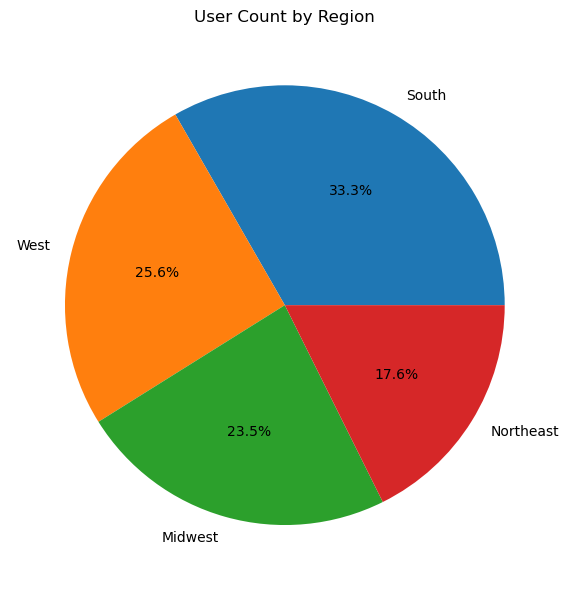

In [186]:
# Create a visual of users in each region
region_pie_data = final_data_dept['Region'].value_counts()

# Create diemnsions for the chart
region_pie_data.plot(figsize=(8,6))

# Plot the chart
region_pie_data = region_pie_data.plot.pie(labels = ['South', 'West', 'Midwest', 'Northeast'], autopct='%1.1f%%',)
plt.title('User Count by Region')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()

In [188]:
# Save Visual
region_pie_data.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_pie_data.png'), bbox_inches='tight')

In [316]:
# Reminder of family status value counts
final_data_dept['Fam_status'].value_counts()

Fam_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

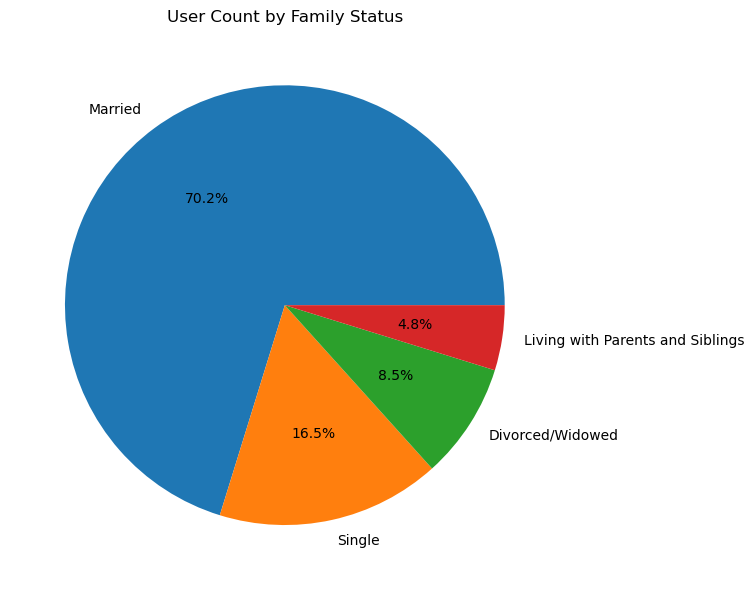

In [318]:
# Create a visual of users by family status
fam_status_pie_data = final_data_dept['Fam_status'].value_counts()

# Create diemnsions for the chart
fam_status_pie_data.plot(figsize=(8,6))

# Plot the chart
fam_status_pie_data = fam_status_pie_data.plot.pie(labels = ['Married', 'Single', 'Divorced/Widowed', 'Living with Parents and Siblings'], autopct='%1.1f%%',)
plt.title('User Count by Family Status')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()

In [320]:
# Save Visual
fam_status_pie_data.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_pie_data.png'), bbox_inches='tight')

In [322]:
# Reminder of family size value counts
final_data_dept['fam_size'].value_counts()

fam_size
Large Family     7772516
None             7739681
Medium Family    7733261
Small Family     7719106
Name: count, dtype: int64

In [974]:
# Create a crosstab of the family size and departments profiles
crosstab = pd.crosstab(final_data_dept['department'], final_data_dept['fam_size'], dropna = False)

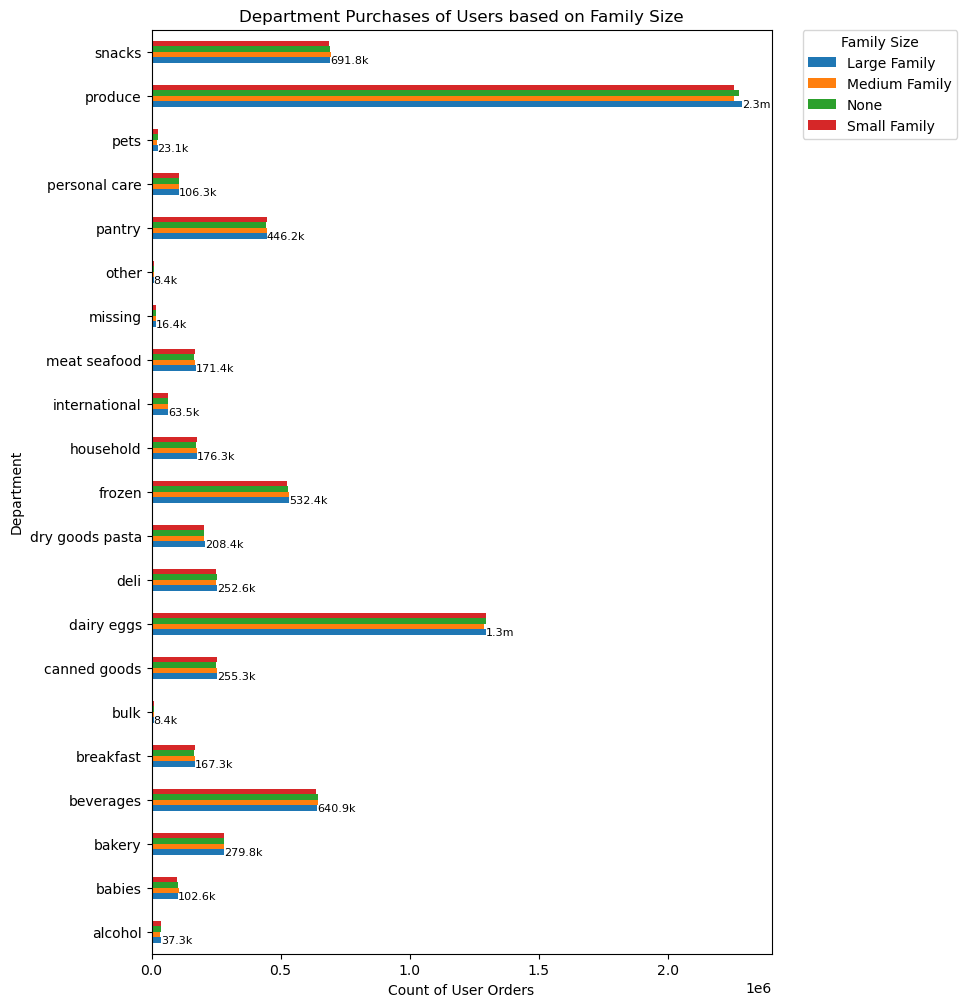

In [986]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
fam_size_department_bar = crosstab.plot.barh(rot=0, figsize=(8,12))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 4 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='8')

plt.ylabel('Department')
plt.xlabel('Count of User Orders')
plt.title('Department Purchases of Users based on Family Size') 
plt.legend(title='Family Size', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [988]:
# Save Visual
fam_size_department_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_size_department_bar.png'), bbox_inches='tight')

In [532]:
# Create a crosstab of the family size profiles and hour of day column
crosstab = pd.crosstab(final_data_dept['order_hour_of_day'], final_data_dept['fam_size'], dropna = False)

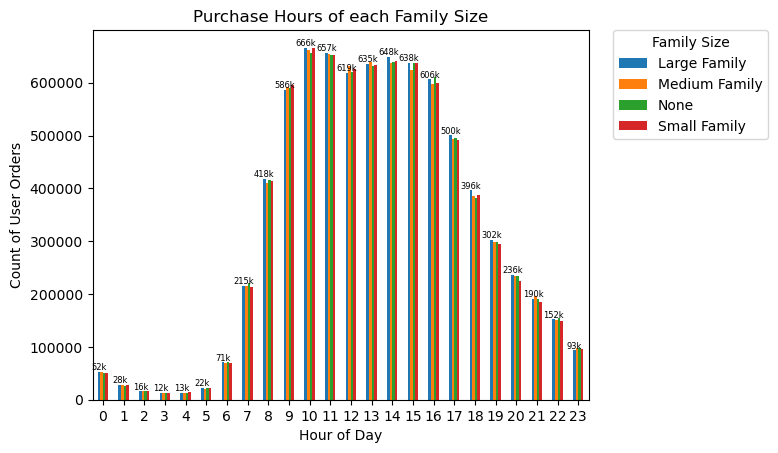

In [540]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
fam_size_hour_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 4 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Hour of Day')
plt.title('Purchase Hours of each Family Size') 
plt.legend(title='Family Size', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [544]:
# Save Visual
fam_size_hour_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_size_hour_bar.png'), bbox_inches='tight')

In [990]:
# Create a crosstab of the family size profiles and day of the week column
crosstab = pd.crosstab(final_data_dept['fam_size'], final_data_dept['orders_day_of_week'], dropna = False)

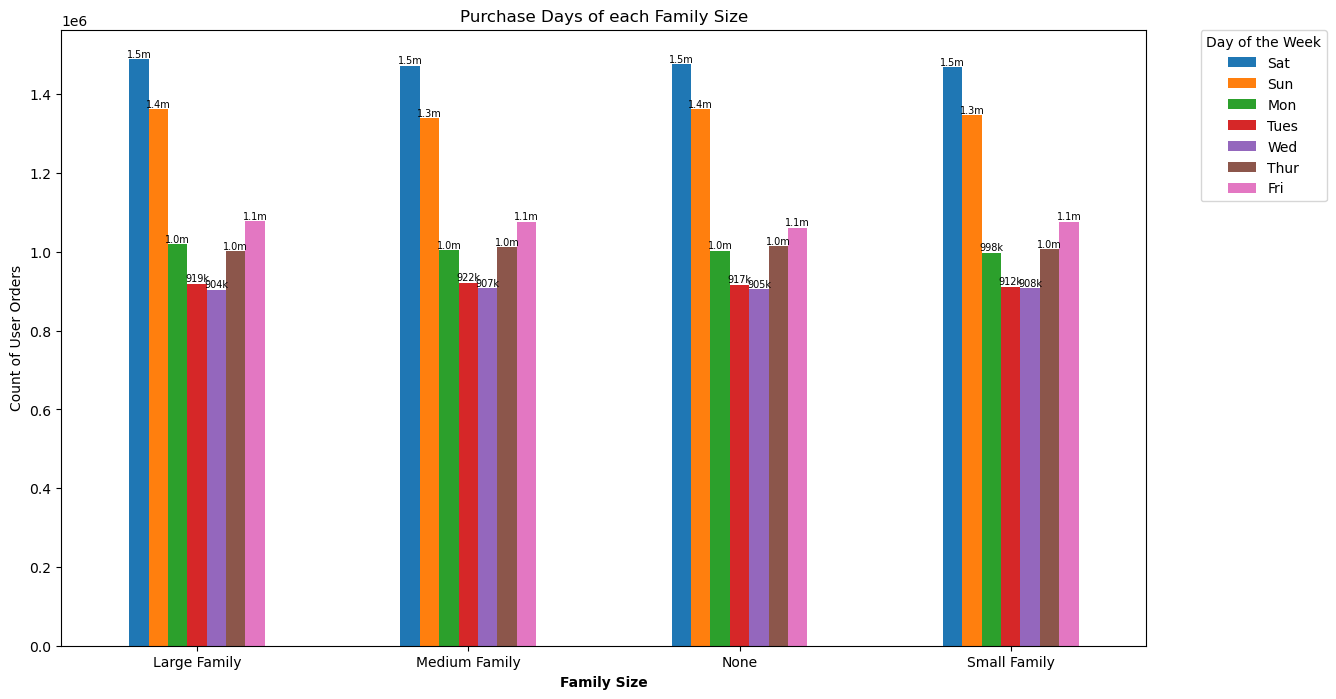

In [994]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
fam_size_dow_bar = crosstab.plot.bar(rot=0, figsize=(14,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Family Size', weight='bold')
plt.title('Purchase Days of each Family Size') 
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=[day_names[i] for i in range(7)])

In [996]:
# Save Visual
fam_size_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_size_dow_bar.png'), bbox_inches='tight')

In [998]:
# Create a crosstab of the family status profiles and hour of day column
crosstab = pd.crosstab(final_data_dept['order_hour_of_day'], final_data_dept['Fam_status'], dropna = False)

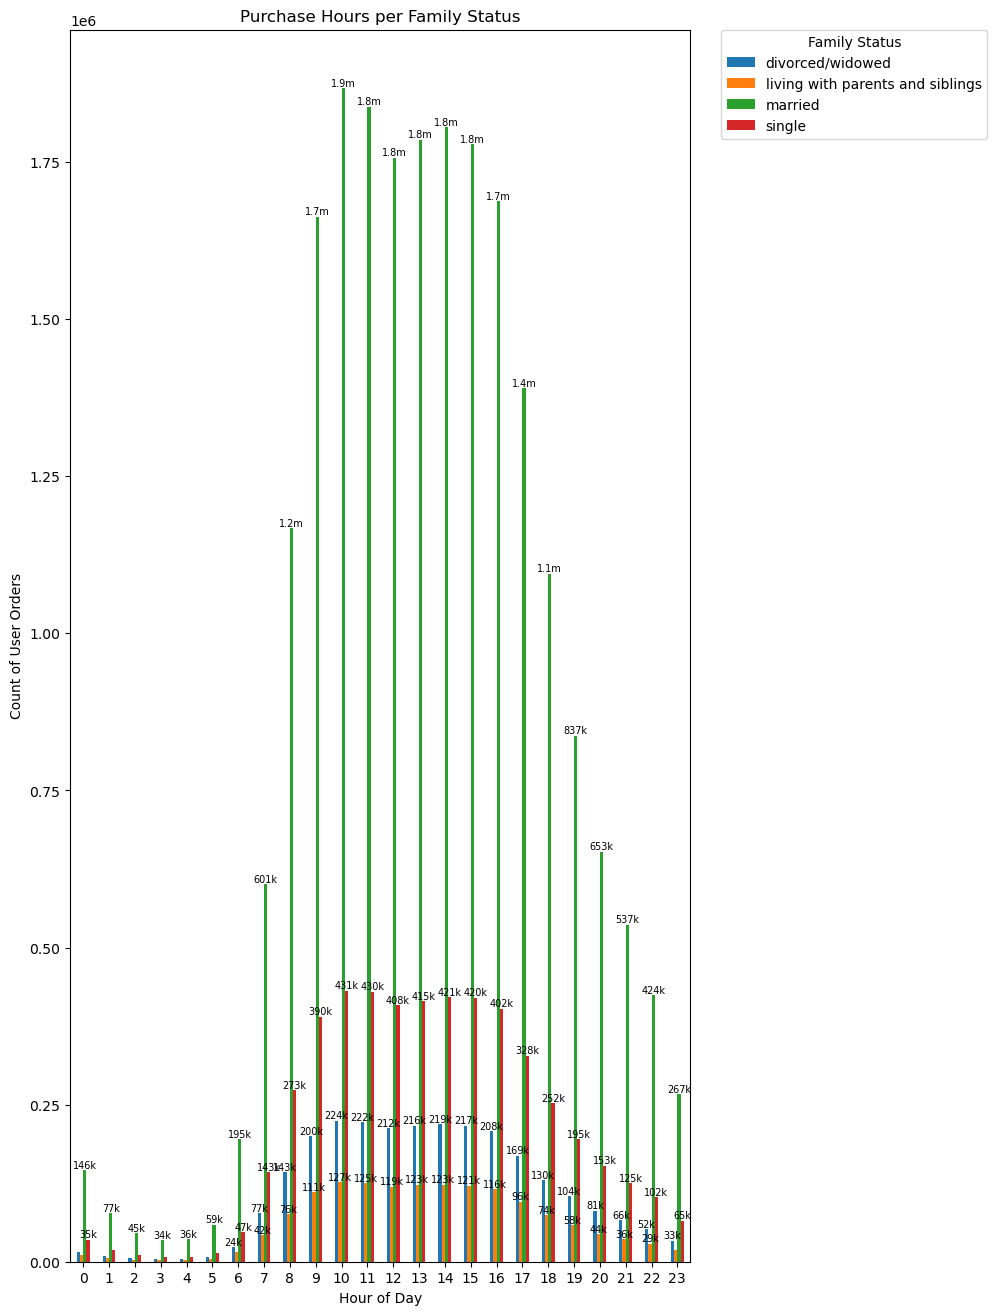

In [1020]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count < 19000:
        return ''
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    else:
        return str(count)

# Add data point labels to bars
fam_status_hour_bar = crosstab.plot.bar(rot=0, figsize=(8,16))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Hour of Day')
plt.title('Purchase Hours per Family Status') 
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [1022]:
# Save Visual
fam_status_hour_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_hour_bar.png'), bbox_inches='tight')

In [1024]:
# Create a crosstab of the family status profiles and day of the week column
crosstab = pd.crosstab(final_data_dept['orders_day_of_week'], final_data_dept['Fam_status'], dropna = False)

([<matplotlib.axis.XTick at 0x199a2c4df10>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tues'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thur'),
  Text(6, 0, 'Fri')])

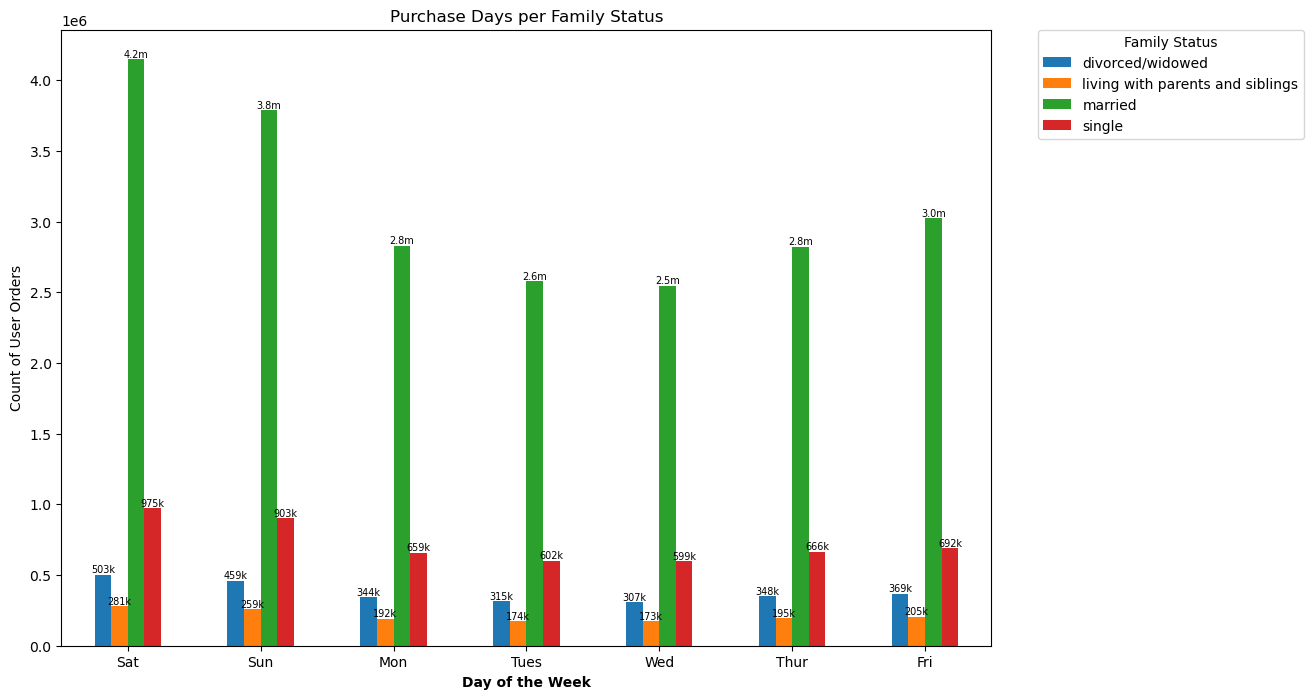

In [1026]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
fam_status_dow_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Day of the Week', weight='bold',)
plt.title('Purchase Days per Family Status') 
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,)
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])

In [1028]:
# Save Visual
fam_status_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_dow_bar.png'), bbox_inches='tight')

In [572]:
# Create a crosstab of the family size profiles and purchase frequency column
crosstab = pd.crosstab(final_data_dept['fam_size'], final_data_dept['frequency_flag'], dropna = False)

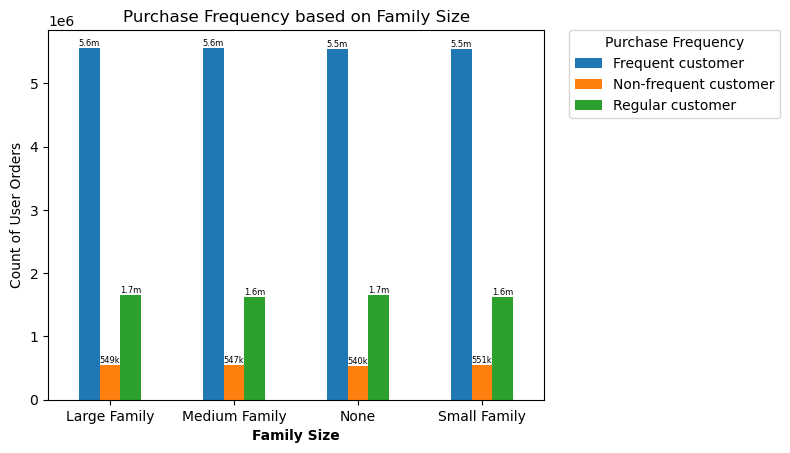

In [576]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
fam_size_frequency_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Family Size', weight='bold')
plt.title('Purchase Frequency based on Family Size') 
plt.legend(title='Purchase Frequency', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [578]:
# Save Visual
fam_size_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_size_frequency_bar.png'), bbox_inches='tight')

In [580]:
# Create a crosstab of the family status profiles and purchase frequency column
crosstab = pd.crosstab(final_data_dept['frequency_flag'], final_data_dept['Fam_status'], dropna = False)

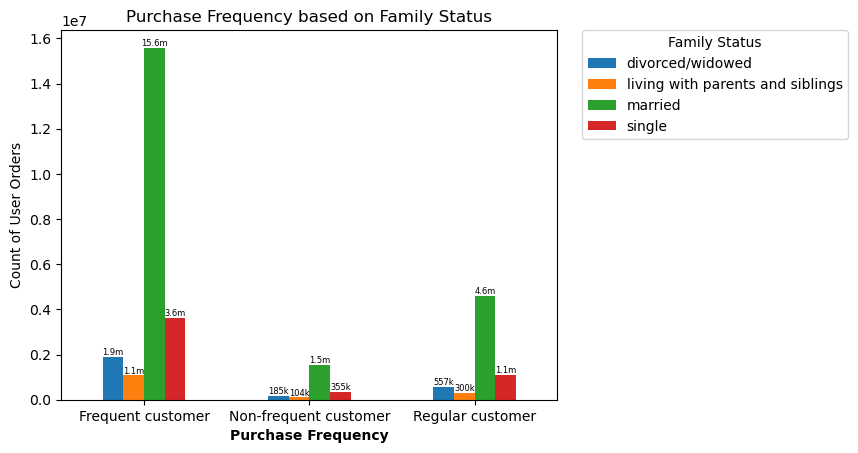

In [582]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
fam_status_frequency_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')
        
plt.ylabel('Count of User Orders')
plt.xlabel('Purchase Frequency', weight='bold')
plt.title('Purchase Frequency based on Family Status') 
plt.legend(title='Family Status', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [584]:
# Save Visual
fam_status_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'fam_status_frequency_bar.png'), bbox_inches='tight')

In [404]:
# Explore gender counts of df
final_data_dept['Gender'].value_counts(dropna=False)

Gender
Male      15586740
Female    15377824
Name: count, dtype: int64

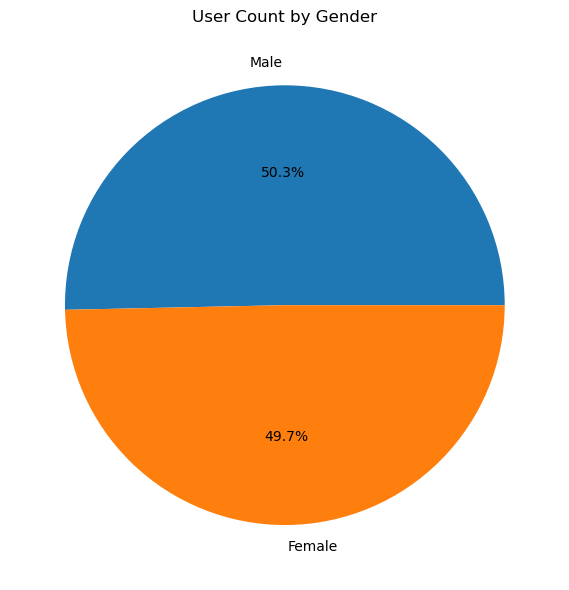

In [406]:
# Create a visual of users by gender
gender_pie_data = final_data_dept['Gender'].value_counts()

# Create diemnsions for the chart
gender_pie_data.plot(figsize=(8,6))

# Plot the chart
gender_pie_data = gender_pie_data.plot.pie(labels = ['Male', 'Female'], autopct='%1.1f%%',)
plt.title('User Count by Gender')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()

In [408]:
# Save Visual
gender_pie_data.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_pie_data.png'), bbox_inches='tight')

In [1030]:
# Create a crosstab of the gender profiles and hour of day column
crosstab = pd.crosstab(final_data_dept['order_hour_of_day'], final_data_dept['Gender'], dropna = False)

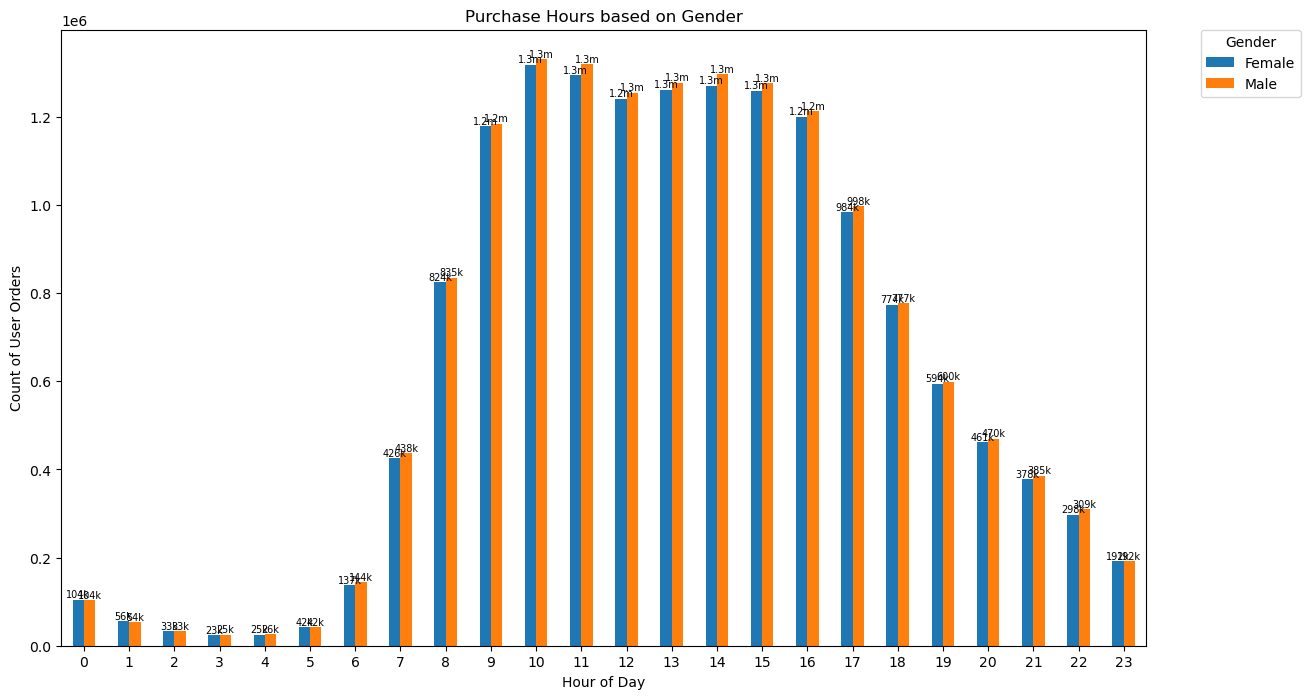

In [1034]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
gender_hour_bar = crosstab.plot.bar(rot=0, figsize=(14,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Hour of Day')
plt.title('Purchase Hours based on Gender') 
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [594]:
# Save Visual
gender_hour_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_hour_bar.png'), bbox_inches='tight')

In [1036]:
# Create a crosstab of the gender profiles and day of the week column
crosstab = pd.crosstab(final_data_dept['orders_day_of_week'], final_data_dept['Gender'], dropna = False)

([<matplotlib.axis.XTick at 0x199ae117440>,
 [Text(0, 0, 'Sat'),
  Text(1, 0, 'Sun'),
  Text(2, 0, 'Mon'),
  Text(3, 0, 'Tues'),
  Text(4, 0, 'Wed'),
  Text(5, 0, 'Thur'),
  Text(6, 0, 'Fri')])

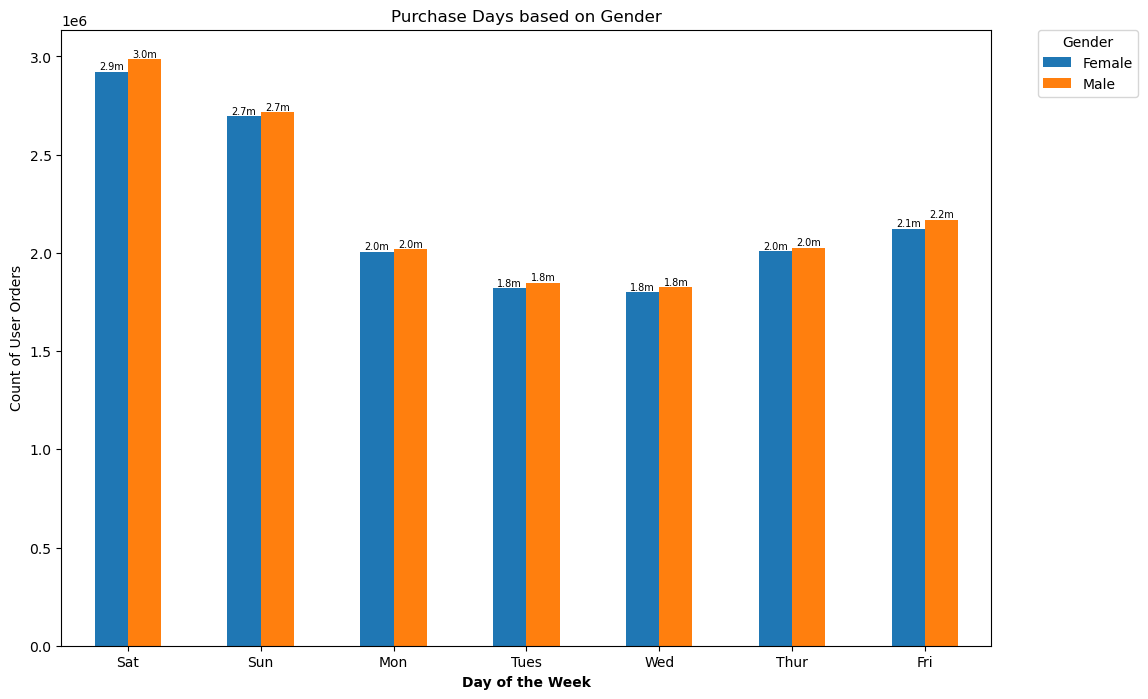

In [1040]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
gender_dow_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Day of the Week', weight='bold',)
plt.title('Purchase Days based on Gender') 
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,)
plt.xticks(ticks=range(7), labels=[day_names[i] for i in range(7)])

In [1042]:
# Save Visual
gender_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_dow_bar.png'), bbox_inches='tight')

In [608]:
# Create a crosstab of the gender profiles and purchase frequency column
crosstab = pd.crosstab(final_data_dept['frequency_flag'], final_data_dept['Gender'], dropna = False)

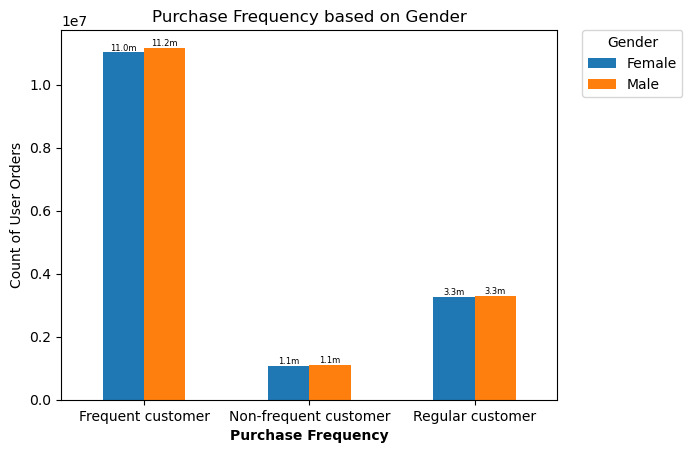

In [610]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
gender_frequency_bar = crosstab.plot.bar(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Purchase Frequency', weight='bold')
plt.title('Purchase Frequency based on Gender') 
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [612]:
# Save Visual
gender_frequency_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'gender_frequency_bar.png'), bbox_inches='tight')

In [6]:
# Importing data after device restart
final_data_dept = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data_dept.pkl'))

In [22]:
# Creating weekend flag
final_data_dept.loc[final_data_dept['orders_day_of_week'].isin([0,1]),'week_day_category']='Weekend'

In [24]:
# Creating weekday flag
final_data_dept.loc[final_data_dept['orders_day_of_week'].isin([2,3,4,5,6]),'week_day_category']='Weekday'

In [1064]:
final_data_dept['week_day_category'].value_counts(dropna =False)

week_day_category
Weekday    19644268
Weekend    11320296
Name: count, dtype: int64

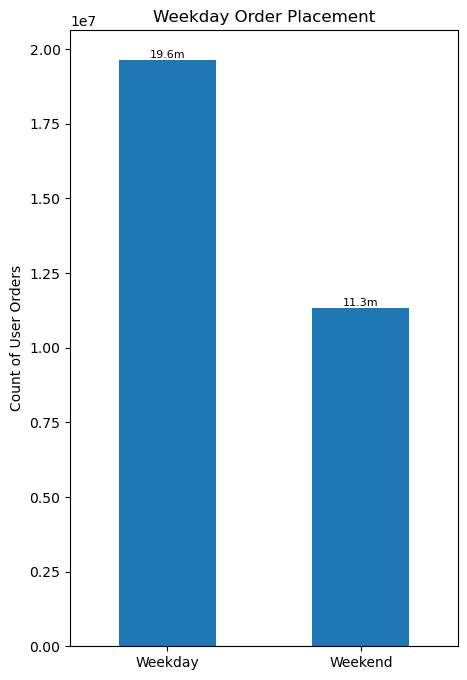

In [614]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Creating Bar Chart of Weekday Order Groups
week_day_count = final_data_dept['week_day_category'].value_counts(dropna=False)

#Plot
week_day_order_count_bar=week_day_count.plot.bar(rot=0,figsize=(5,8))

# Access the current Axes object
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='8')
        
plt.title('Weekday Order Placement')
plt.xlabel('')
plt.ylabel('Count of User Orders')
plt.tight_layout
plt.show()

In [616]:
# Save Visual
week_day_order_count_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'week_day_order_count_bar.png'), bbox_inches='tight')

In [1068]:
# Creating time of day flags
final_data_dept.loc[final_data_dept['order_hour_of_day'].isin([4,5,6,7]),'time_of_day']='Early Morning'
final_data_dept.loc[final_data_dept['order_hour_of_day'].isin([8,9,10,11]),'time_of_day']='Late Morning'
final_data_dept.loc[final_data_dept['order_hour_of_day'].isin([12,13,14,15,16]),'time_of_day']='Afternoon'
final_data_dept.loc[final_data_dept['order_hour_of_day'].isin([17,18,19,20]),'time_of_day']='Evening'
final_data_dept.loc[final_data_dept['order_hour_of_day'].isin([21,22,23]),'time_of_day']='Night'
final_data_dept.loc[final_data_dept['order_hour_of_day'].isin([0,1,2,3]),'time_of_day']='Late Night'

In [1066]:
final_data_dept['time_of_day'].value_counts(dropna = False)

time_of_day
Afternoon        12552621
Late Morning      9287345
Evening           5658316
Night             1754725
Early Morning     1279407
Late Night         432150
Name: count, dtype: int64

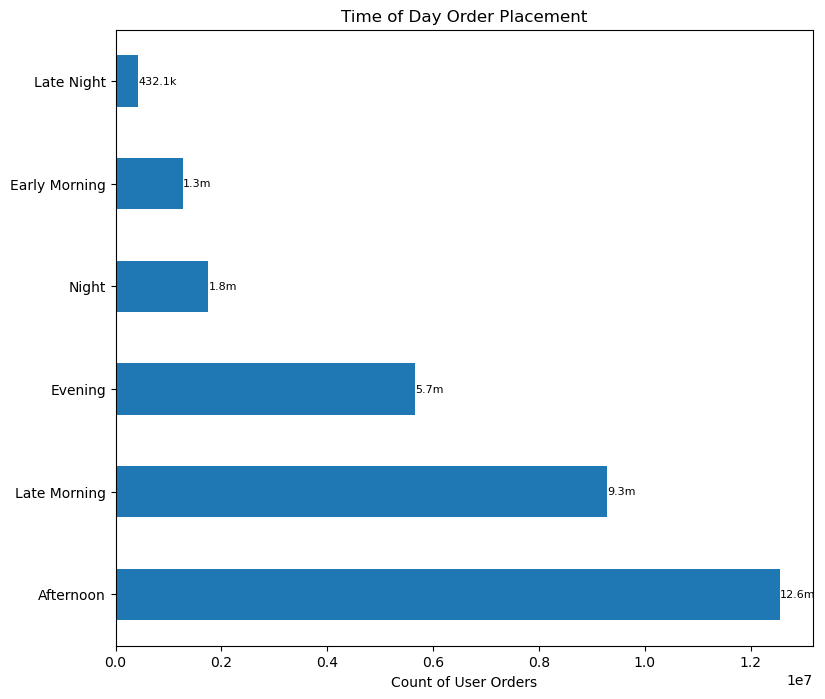

In [624]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Creating Bar Chart of Weekday Order Groups
time_of_day = final_data_dept['time_of_day'].value_counts()

#Plot
time_of_day_bar=time_of_day.plot.barh(rot=0,figsize=(9,8))

# Access the current Axes object
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='8')

plt.title('Time of Day Order Placement')
plt.xlabel('Count of User Orders')
plt.ylabel('')
plt.tight_layout
plt.show()

In [626]:
# Save Visual
time_of_day_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'time_of_day_bar.png'), bbox_inches='tight')

In [628]:
# Create a crosstab of the time of day and weekday/weekend categories
crosstab = pd.crosstab(final_data_dept['time_of_day'], final_data_dept['week_day_category'], dropna = False)

In [28]:
# Export dataframe before restarting device
final_data_dept.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_data_dept.pkl'))

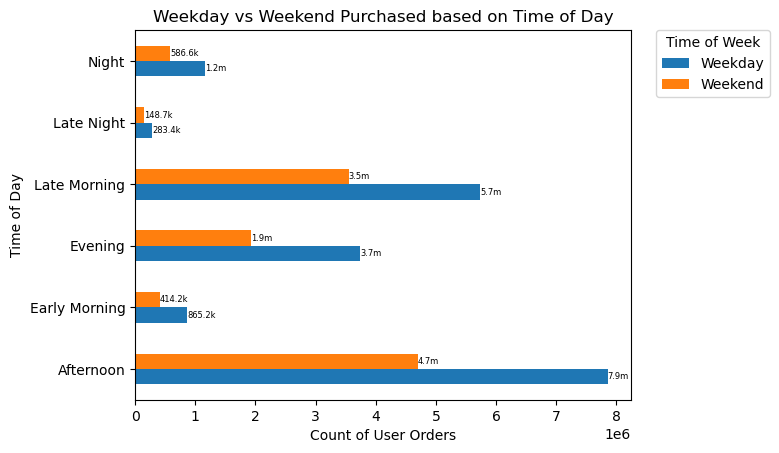

In [632]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
week_time_bar = crosstab.plot.barh(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Time of Day')
plt.xlabel('Count of User Orders')
plt.title('Weekday vs Weekend Purchased based on Time of Day') 
plt.legend(title='Time of Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [634]:
# Save Visual
week_time_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'week_time_bar.png'), bbox_inches='tight')

In [44]:
# Create a new column, 'median_price', that will contain the median order price for each user
final_data_dept['median_price'] = final_data_dept.groupby(['user_id'])['prices'].transform(np.median)

C:\Users\jacks\AppData\Local\Temp\ipykernel_13596\2575658354.py:2: FutureWarning: The provided callable <function median at 0x000001A4FF5D56C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  final_data_dept['median_price'] = final_data_dept.groupby(['user_id'])['prices'].transform(np.median)


In [46]:
# Check that the new column exists
final_data_dept.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 35 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   department_id           int64  
 1   department              object 
 2   order_id                int64  
 3   user_id                 object 
 4   order_number            int64  
 5   orders_day_of_week      int64  
 6   order_hour_of_day       int64  
 7   days_since_prior_order  float64
 8   product_id              int64  
 9   add_to_cart_order       int64  
 10  reordered               int64  
 11  product_name            object 
 12  aisle_id                int64  
 13  prices                  float64
 14  price_range_loc         object 
 15  max_order               int64  
 16  loyalty_flag            object 
 17  avg_price               float64
 18  spending_flag           object 
 19  median_days_since       float64
 20  frequency_flag          object 
 21  Gender                  objec

In [48]:
# Check info on median_price column
final_data_dept['median_price'].describe()

count    3.096456e+07
mean     7.459146e+00
std      1.073608e+00
min      1.000000e+00
25%      6.800000e+00
50%      7.400000e+00
75%      8.150000e+00
max      2.500000e+01
Name: median_price, dtype: float64

In [50]:
# Create a new spending flag based on users' median order price
final_data_dept.loc[final_data_dept['median_price'] > 10, 'med_spend_flag'] = 'High Spender'
final_data_dept.loc[(final_data_dept['median_price'] <= 10) & (final_data_dept['median_price'] > 6), 'med_spend_flag'] = 'Middle Spender'
final_data_dept.loc[final_data_dept['median_price'] <= 6, 'med_spend_flag'] = 'Low Spender'

In [52]:
# Check results of new flag by getting value counts
final_data_dept['med_spend_flag'].value_counts(dropna=False)

med_spend_flag
Middle Spender    28154134
Low Spender        2350851
High Spender        459579
Name: count, dtype: int64

In [54]:
# Create a crosstab of the time of day and median spending flag categories
crosstab = pd.crosstab(final_data_dept['time_of_day'], final_data_dept['med_spend_flag'], dropna = False)

In [58]:
# Create a new column, 'median_price_region', that will contain the median order price for each region
final_data_dept['median_price_region'] = final_data_dept.groupby(['Region'])['prices'].transform(np.median)

C:\Users\jacks\AppData\Local\Temp\ipykernel_13596\4023017009.py:2: FutureWarning: The provided callable <function median at 0x000001A4FF5D56C0> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  final_data_dept['median_price_region'] = final_data_dept.groupby(['Region'])['prices'].transform(np.median)


In [64]:
# Check results of new column by getting value counts
final_data_dept['median_price_region'].value_counts(dropna=False)

median_price_region
7.4    30964564
Name: count, dtype: int64

In [68]:
# Calculate stats on price paid by each region
final_data_dept.groupby('Region').agg({'prices':['mean', 'min', 'max', 'median', 'std']})

prices                            
               mean  min   max median       std
Region                                         
Midwest    7.793358  1.0  25.0    7.4  4.239491
Northeast  7.782394  1.0  25.0    7.4  4.241480
South      7.795499  1.0  25.0    7.4  4.241839
West       7.791282  1.0  25.0    7.4  4.241283

In [1072]:
# Create a new column, 'avg_price_time', that will contain the average order price for each time of day
final_data_dept['avg_price_time'] = final_data_dept.groupby(['time_of_day'])['prices'].transform(np.mean)

C:\Users\jacks\AppData\Local\Temp\ipykernel_15076\3378134790.py:2: FutureWarning: The provided callable <function mean at 0x00000195BD156980> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  final_data_dept['avg_price_time'] = final_data_dept.groupby(['time_of_day'])['prices'].transform(np.mean)


In [1074]:
# Check results of new column by getting value counts
final_data_dept['avg_price_time'].value_counts(dropna=False)

avg_price_time
7.799709    12552621
7.763880     9287345
7.805131     5658316
7.808331     1754725
7.823529     1279407
7.812469      432150
Name: count, dtype: int64

In [1076]:
# Check description of avg_price_time
final_data_dept['avg_price_time'].describe()

count    3.096456e+07
mean     7.791604e+00
std      1.883216e-02
min      7.763880e+00
25%      7.763880e+00
50%      7.799709e+00
75%      7.805131e+00
max      7.823529e+00
Name: avg_price_time, dtype: float64

In [1078]:
# Create a crosstab of the time of day and avg_price_time categories
crosstab = pd.crosstab(final_data_dept['time_of_day'], final_data_dept['avg_price_time'], dropna = False)

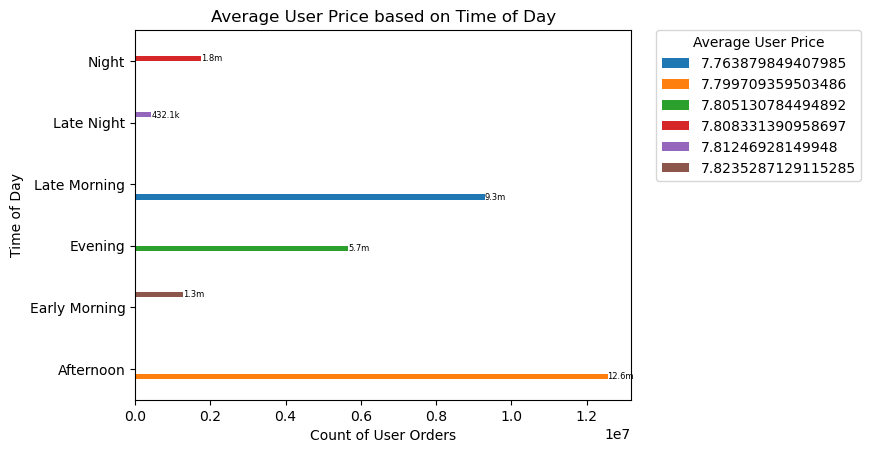

In [1082]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
avg_price_time = crosstab.plot.barh(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Time of Day')
plt.xlabel('Count of User Orders')
plt.title('Average User Price based on Time of Day') 
plt.legend(title='Average User Price', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [ ]:
# Create a new flag based on users' average price
final_data_dept.loc[final_data_dept['median_price'] > 10, 'med_spend_flag'] = 'High Spender'
final_data_dept.loc[(final_data_dept['median_price'] <= 10) & (final_data_dept['median_price'] > 6), 'med_spend_flag'] = 'Middle Spender'
final_data_dept.loc[final_data_dept['median_price'] <= 6, 'med_spend_flag'] = 'Low Spender'

In [98]:
# Calculate stats on price paid in each Region and each time of day
final_data_dept.groupby(['time_of_day', 'Region']).agg({'prices':['mean', 'min', 'max', 'median', 'std']})

prices                            
                             mean  min   max median       std
time_of_day   Region                                         
Afternoon     Midwest    7.804157  1.0  25.0    7.4  4.245201
              Northeast  7.786453  1.0  25.0    7.4  4.245127
              South      7.805369  1.0  25.0    7.4  4.246896
              West       7.797487  1.0  25.0    7.4  4.248022
Early Morning Midwest    7.818391  1.0  25.0    7.4  4.250718
              Northeast  7.829169  1.0  25.0    7.4  4.257776
              South      7.824243  1.0  25.0    7.4  4.238492
              West       7.823352  1.0  25.0    7.4  4.245721
Evening       Midwest    7.800621  1.0  25.0    7.4  4.234346
              Northeast  7.792536  1.0  25.0    7.4  4.241027
              South      7.813623  1.0  25.0    7.4  4.247897
              West       7.806865  1.0  25.0    7.4  4.241938
Late Morning  Midwest    7.764831  1.0  25.0    7.3  4.233655
              Northeast  7.761885  1.0  25.0    7.3  4.235544
              South      7.764544  1.0  25.0    7.3  4.233254
              West       7.763514  1.0  25.0    7.3  4.233387
Late Night    Midwest    7.824936  1.0  25.0    7.4  4.246689
              Northeast  7.785053  1.0  25.0    7.4  4.236567
              South      7.804271  1.0  25.0    7.4  4.234384
              West       7.830964  1.0  25.0    7.5  4.224046
Night         Midwest    7.817272  1.0  25.0    7.4  4.235596
              Northeast  7.793923  1.0  25.0    7.4  4.236932
              South      7.807840  1.0  25.0    7.4  4.235221
              West       7.810893  1.0  25.0    7.4  4.232392

In [102]:
# Copy results to clipboard
final_data_dept.groupby(['time_of_day', 'Region']).agg({'prices':['mean', 'min', 'max', 'median', 'std']}).to_clipboard()

In [120]:
# Trying to visualize time_of_day and Region with aggregated mean prices
tod_avg_price_region = final_data_dept.groupby(['Region', 'time_of_day']).agg({'prices':['mean']})

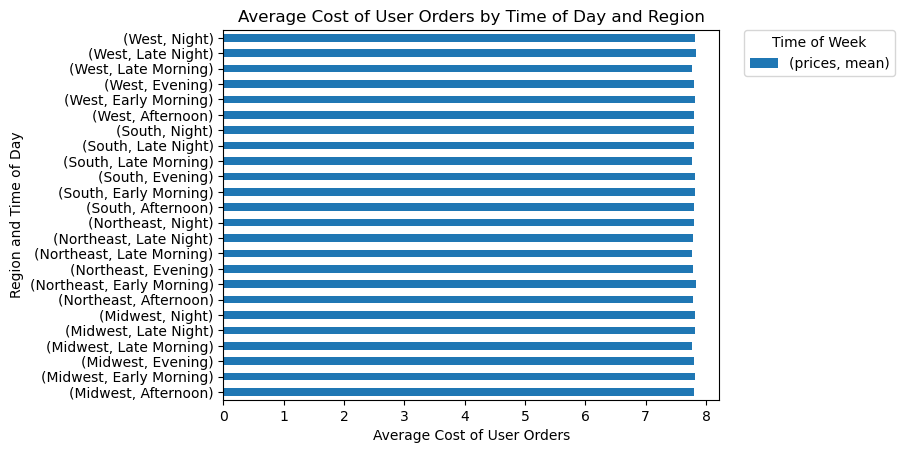

In [122]:
# Visualize with barchart
tod_avg_price_region_bar = tod_avg_price_region.plot.barh(rot=0)
plt.ylabel('Region and Time of Day')
plt.xlabel('Average Cost of User Orders')
plt.title('Average Cost of User Orders by Time of Day and Region') 
plt.legend(title='Time of Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [124]:
# Calculate stats on price paid in each Region and each time of day
final_data_dept.groupby(['time_of_day', 'loyalty_flag']).agg({'prices':['mean', 'min', 'max', 'median', 'std']})

prices                            
                                    mean  min   max median       std
time_of_day   loyalty_flag                                          
Afternoon     Loyal customer    7.781082  1.0  25.0    7.4  4.210945
              New customer      7.813956  1.0  25.0    7.4  4.274126
              Regular customer  7.806776  1.0  25.0    7.4  4.259639
Early Morning Loyal customer    7.828873  1.0  25.0    7.4  4.225959
              New customer      7.803438  1.0  25.0    7.4  4.264911
              Regular customer  7.824260  1.0  25.0    7.4  4.258770
Evening       Loyal customer    7.792305  1.0  25.0    7.4  4.208264
              New customer      7.811648  1.0  25.0    7.4  4.262787
              Regular customer  7.810334  1.0  25.0    7.4  4.254341
Late Morning  Loyal customer    7.740765  1.0  25.0    7.3  4.196907
              New customer      7.782574  1.0  25.0    7.3  4.265992
              Regular customer  7.775233  1.0  25.0    7.3  4.250971
Late Night    Loyal customer    7.803216  1.0  25.0    7.4  4.219591
              New customer      7.826280  1.0  25.0    7.4  4.233376
              Regular customer  7.812752  1.0  25.0    7.4  4.243834
Night         Loyal customer    7.815400  1.0  25.0    7.4  4.206448
              New customer      7.777841  1.0  25.0    7.4  4.244328
              Regular customer  7.812623  1.0  25.0    7.4  4.250874

### None of these stats stand out an anomalies

In [1172]:
# Calculate stats on price paid in each age grouo and each time of day
final_data_dept.groupby(['time_of_day', 'age_group']).agg({'prices':['mean', 'min', 'max', 'median', 'std']})

prices                            
                                    mean  min   max median       std
time_of_day   age_group                                             
Afternoon     Early Adulthood   7.791844  1.0  25.0    7.4  4.241565
              Late Adulthood    7.808788  1.0  25.0    7.4  4.250095
              Middle Adulthood  7.798951  1.0  25.0    7.4  4.248035
Early Morning Early Adulthood   7.818901  1.0  25.0    7.4  4.238130
              Late Adulthood    7.821672  1.0  25.0    7.4  4.242691
              Middle Adulthood  7.830309  1.0  25.0    7.4  4.259466
Evening       Early Adulthood   7.804811  1.0  25.0    7.4  4.239804
              Late Adulthood    7.807970  1.0  25.0    7.4  4.244440
              Middle Adulthood  7.802652  1.0  25.0    7.4  4.241784
Late Morning  Early Adulthood   7.758548  1.0  25.0    7.3  4.231530
              Late Adulthood    7.768324  1.0  25.0    7.3  4.234708
              Middle Adulthood  7.765065  1.0  25.0    7.3  4.235229
Late Night    Early Adulthood   7.797100  1.0  25.0    7.4  4.226162
              Late Adulthood    7.815936  1.0  25.0    7.4  4.239181
              Middle Adulthood  7.825698  1.0  25.0    7.4  4.240608
Night         Early Adulthood   7.799522  1.0  25.0    7.4  4.235872
              Late Adulthood    7.809195  1.0  25.0    7.4  4.239127
              Middle Adulthood  7.816658  1.0  25.0    7.4  4.229731

### None of these stats stand out an anomalies

In [132]:
# Calculate stats on price paid in income group and each time of day
final_data_dept.groupby(['time_of_day', 'income_group']).agg({'prices':['mean', 'min', 'max', 'median', 'std']})

prices                            
                                 mean  min   max median       std
time_of_day   income_group                                       
Afternoon     High Income    7.954464  1.0  25.0    7.6  4.269186
              Low Income     7.373817  1.0  25.0    6.8  4.178719
              Middle Income  7.959736  1.0  25.0    7.7  4.258833
Early Morning High Income    7.958894  1.0  25.0    7.7  4.275864
              Low Income     7.417712  1.0  25.0    6.9  4.190230
              Middle Income  7.973788  1.0  25.0    7.7  4.253358
Evening       High Income    7.946178  1.0  25.0    7.6  4.257487
              Low Income     7.397700  1.0  25.0    6.9  4.181686
              Middle Income  7.955675  1.0  25.0    7.7  4.253352
Late Morning  High Income    7.936001  1.0  25.0    7.6  4.258071
              Low Income     7.292319  1.0  25.0    6.8  4.153679
              Middle Income  7.957640  1.0  25.0    7.7  4.249334
Late Night    High Income    7.947415  1.0  25.0    7.6  4.236004
              Low Income     7.399039  1.0  25.0    6.9  4.177150
              Middle Income  7.971519  1.0  25.0    7.7  4.248272
Night         High Income    7.942600  1.0  25.0    7.6  4.238663
              Low Income     7.439116  1.0  25.0    6.9  4.181317
              Middle Income  7.941585  1.0  25.0    7.6  4.247820

### There are some potential anomalies in this data.

In [135]:
# Copy results to clipboard
final_data_dept.groupby(['time_of_day', 'income_group']).agg({'prices':['mean', 'min', 'max', 'median', 'std']}).to_clipboard()

In [140]:
# Calculate stats on price paid in family status and each time of day
final_data_dept.groupby(['time_of_day', 'Fam_status']).agg({'prices':['mean', 'min', 'max', 'median', 'std']})

prices                    \
                                                    mean  min   max median   
time_of_day   Fam_status                                                     
Afternoon     divorced/widowed                  7.807459  1.0  25.0    7.4   
              living with parents and siblings  7.810467  1.0  25.0    7.4   
              married                           7.801024  1.0  25.0    7.4   
              single                            7.786948  1.0  25.0    7.4   
Early Morning divorced/widowed                  7.836149  1.0  25.0    7.5   
              living with parents and siblings  7.847499  1.0  25.0    7.5   
              married                           7.822005  1.0  25.0    7.4   
              single                            7.815954  1.0  25.0    7.4   
Evening       divorced/widowed                  7.811276  1.0  25.0    7.4   
              living with parents and siblings  7.814216  1.0  25.0    7.4   
              married                           7.803222  1.0  25.0    7.4   
              single                            7.807442  1.0  25.0    7.4   
Late Morning  divorced/widowed                  7.782835  1.0  25.0    7.4   
              living with parents and siblings  7.767839  1.0  25.0    7.3   
              married                           7.762473  1.0  25.0    7.3   
              single                            7.758967  1.0  25.0    7.3   
Late Night    divorced/widowed                  7.826411  1.0  25.0    7.4   
              living with parents and siblings  7.809254  1.0  25.0    7.5   
              married                           7.816439  1.0  25.0    7.4   
              single                            7.789909  1.0  25.0    7.4   
Night         divorced/widowed                  7.804465  1.0  25.0    7.4   
              living with parents and siblings  7.834238  1.0  25.0    7.4   
              married                           7.808318  1.0  25.0    7.4   
              single                            7.803018  1.0  25.0    7.4   

                                                          
                                                     std  
time_of_day   Fam_status                                  
Afternoon     divorced/widowed                  4.244177  
              living with parents and siblings  4.246452  
              married                           4.249906  
              single                            4.233028  
Early Morning divorced/widowed                  4.265963  
              living with parents and siblings  4.230344  
              married                           4.246092  
              single                            4.243261  
Evening       divorced/widowed                  4.245779  
              living with parents and siblings  4.241989  
              married                           4.244182  
              single                            4.230527  
Late Morning  divorced/widowed                  4.238820  
              living with parents and siblings  4.234962  
              married                           4.234892  
              single                            4.226063  
Late Night    divorced/widowed                  4.259624  
              living with parents and siblings  4.224059  
              married                           4.229545  
              single                            4.249512  
Night         divorced/widowed                  4.238229  
              living with parents and siblings  4.240516  
              married                           4.234925  
              single                            4.231526

### None of these stats stand out an anomalies

In [142]:
# Calculate stats on price paid in family size and each time of day
final_data_dept.groupby(['time_of_day', 'fam_size']).agg({'prices':['mean', 'min', 'max', 'median', 'std']})

prices                            
                                 mean  min   max median       std
time_of_day   fam_size                                           
Afternoon     Large Family   7.802723  1.0  25.0    7.4  4.249455
              Medium Family  7.795285  1.0  25.0    7.4  4.252763
              None           7.793957  1.0  25.0    7.4  4.236852
              Small Family   7.806860  1.0  25.0    7.4  4.246836
Early Morning Large Family   7.811351  1.0  25.0    7.4  4.243143
              Medium Family  7.823502  1.0  25.0    7.4  4.245890
              None           7.822967  1.0  25.0    7.4  4.251162
              Small Family   7.836356  1.0  25.0    7.4  4.246067
Evening       Large Family   7.812382  1.0  25.0    7.4  4.246900
              Medium Family  7.794772  1.0  25.0    7.4  4.242877
              None           7.808757  1.0  25.0    7.4  4.235765
              Small Family   7.804492  1.0  25.0    7.4  4.242271
Late Morning  Large Family   7.764446  1.0  25.0    7.3  4.235628
              Medium Family  7.755846  1.0  25.0    7.3  4.235449
              None           7.767103  1.0  25.0    7.3  4.230431
              Small Family   7.768120  1.0  25.0    7.3  4.233604
Late Night    Large Family   7.815930  1.0  25.0    7.4  4.213430
              Medium Family  7.803540  1.0  25.0    7.4  4.247936
              None           7.801937  1.0  25.0    7.4  4.252862
              Small Family   7.828494  1.0  25.0    7.5  4.225980
Night         Large Family   7.808177  1.0  25.0    7.4  4.225894
              Medium Family  7.804001  1.0  25.0    7.4  4.249041
              None           7.803513  1.0  25.0    7.4  4.233813
              Small Family   7.817928  1.0  25.0    7.4  4.230554

### None of these stats stand out an anomalies

In [636]:
# Create a crosstab of the time of day and price categories
crosstab = pd.crosstab(final_data_dept['time_of_day'], final_data_dept['price_range_loc'], dropna = False)

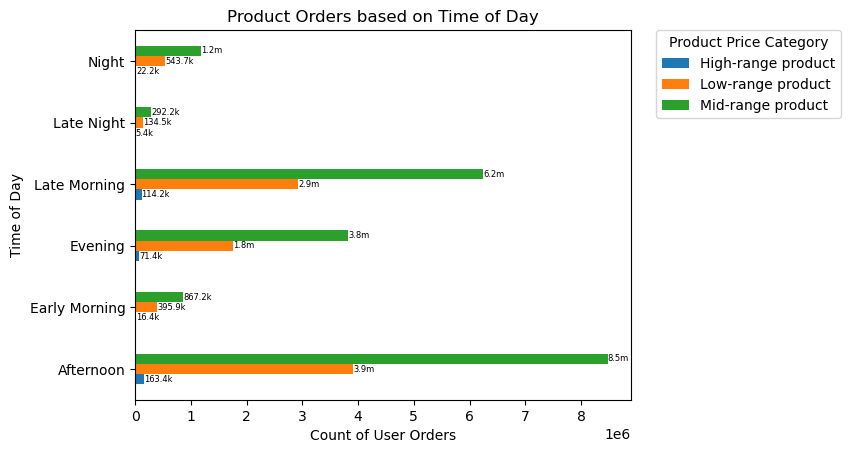

In [638]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Add data point labels to bars
price_time_bar = crosstab.plot.barh(rot=0)
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Time of Day')
plt.xlabel('Count of User Orders')
plt.title('Product Orders based on Time of Day') 
plt.legend(title='Product Price Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [640]:
# Save Visual
price_time_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_time_bar.png'), bbox_inches='tight')

In [680]:
# Create a crosstab of the price categories and departments
crosstab = pd.crosstab(final_data_dept['department'], final_data_dept['price_range_loc'], dropna = False)

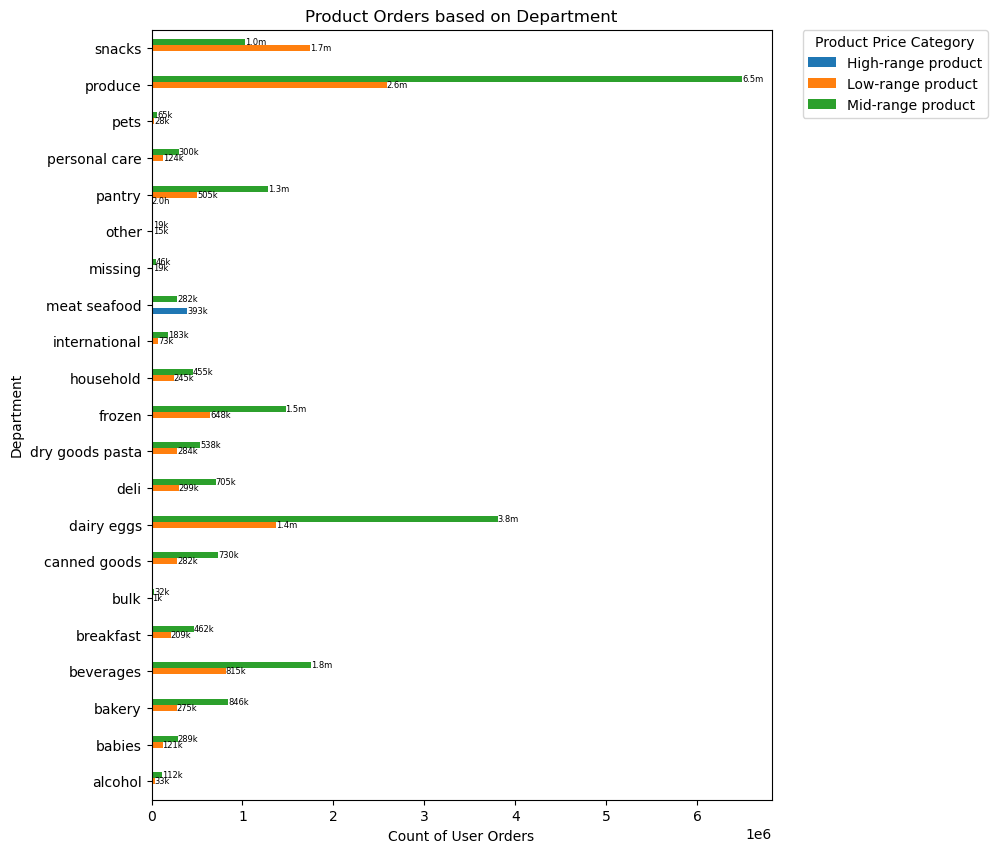

In [688]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
price_dept_bar = crosstab.plot.barh(rot=0, figsize=(8,10))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Department')
plt.xlabel('Count of User Orders')
plt.title('Product Orders based on Department') 
plt.legend(title='Product Price Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [690]:
# Save Visual
price_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_dept_bar.png'), bbox_inches='tight')

In [1044]:
# Create a crosstab of the weekday/weekend and price categories
crosstab = pd.crosstab(final_data_dept['week_day_category'], final_data_dept['price_range_loc'], dropna = False)

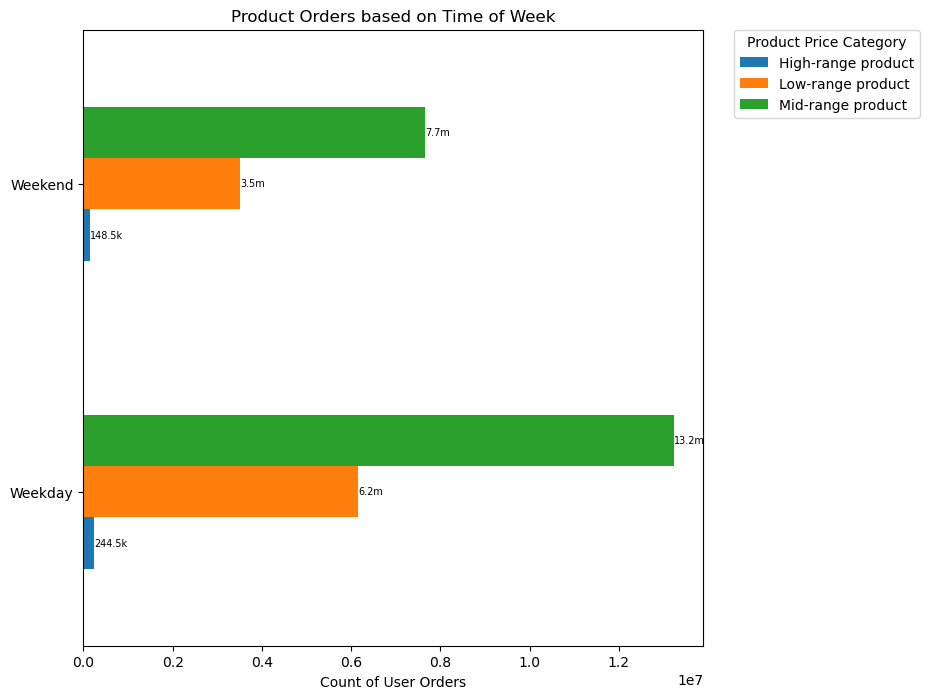

In [1045]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
price_week_bar = crosstab.plot.barh(rot=0, figsize=(8,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('')
plt.xlabel('Count of User Orders')
plt.title('Product Orders based on Time of Week') 
plt.legend(title='Product Price Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [1048]:
# Save Visual
price_week_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_week_bar.png'), bbox_inches='tight')

In [666]:
# Create a crosstab of the region and price categories
crosstab = pd.crosstab(final_data_dept['Region'], final_data_dept['price_range_loc'], dropna = False)

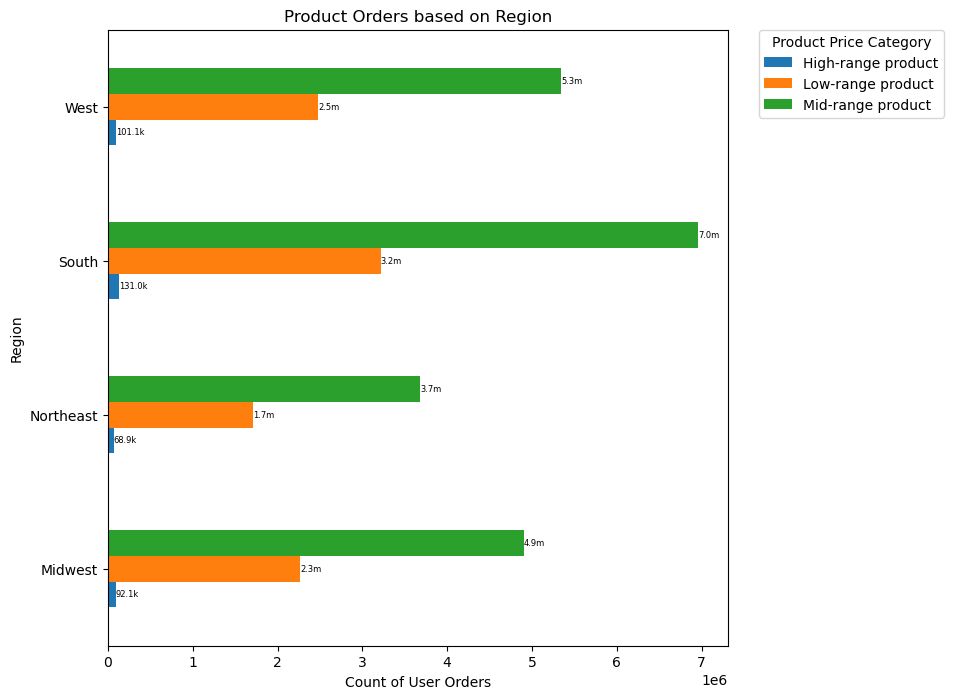

In [668]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
price_region_bar = crosstab.plot.barh(rot=0, figsize=(8,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Region')
plt.xlabel('Count of User Orders')
plt.title('Product Orders based on Region') 
plt.legend(title='Product Price Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [670]:
# Save Visual
price_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_region_bar.png'), bbox_inches='tight')

In [716]:
# Are loyal customers in a particular region buying at same time, or same day of the week?
# Filter df to include specific values
filtered_df = final_data_dept[(final_data_dept['loyalty_flag'] == 'Loyal customer') & (final_data_dept['Region']) & (final_data_dept['time_of_day']) &(final_data_dept['prices'])]

In [24]:
filtered_df.head()

department_id department  order_id user_id  order_number  \
491              1     frozen    881725      54            12   
492              1     frozen   1182951      54            15   
493              1     frozen   1182951      54            15   
494              1     frozen   2058687      54            46   
495              1     frozen   2101107      54            64   

     orders_day_of_week  order_hour_of_day  days_since_prior_order  \
491                   5                  9                     8.0   
492                   5                 12                    12.0   
493                   5                 12                    12.0   
494                   2                 15                     5.0   
495                   1                 13                     4.0   

     product_id  add_to_cart_order  ...  Date_joined Dependants  Fam_status  \
491       16650                  8  ...     3/8/2018          1     married   
492        1158                 15  ...     3/8/2018          1     married   
493       17948                 16  ...     3/8/2018          1     married   
494       13885                  4  ...     3/8/2018          1     married   
495       40545                 10  ...     3/8/2018          1     married   

     Income Region         age_group income_group      fam_size   time_of_day  \
491  162816   West  Middle Adulthood  High Income  Small Family  Late Morning   
492  162816   West  Middle Adulthood  High Income  Small Family     Afternoon   
493  162816   West  Middle Adulthood  High Income  Small Family     Afternoon   
494  162816   West  Middle Adulthood  High Income  Small Family     Afternoon   
495  162816   West  Middle Adulthood  High Income  Small Family     Afternoon   

     week_day_category  
491            Weekday  
492            Weekday  
493            Weekday  
494            Weekday  
495            Weekend  

[5 rows x 34 columns]

In [717]:
# Create a crosstab of the region and time of day categories from filtered_df
crosstab = pd.crosstab(filtered_df['Region'], filtered_df['time_of_day'], dropna = False)

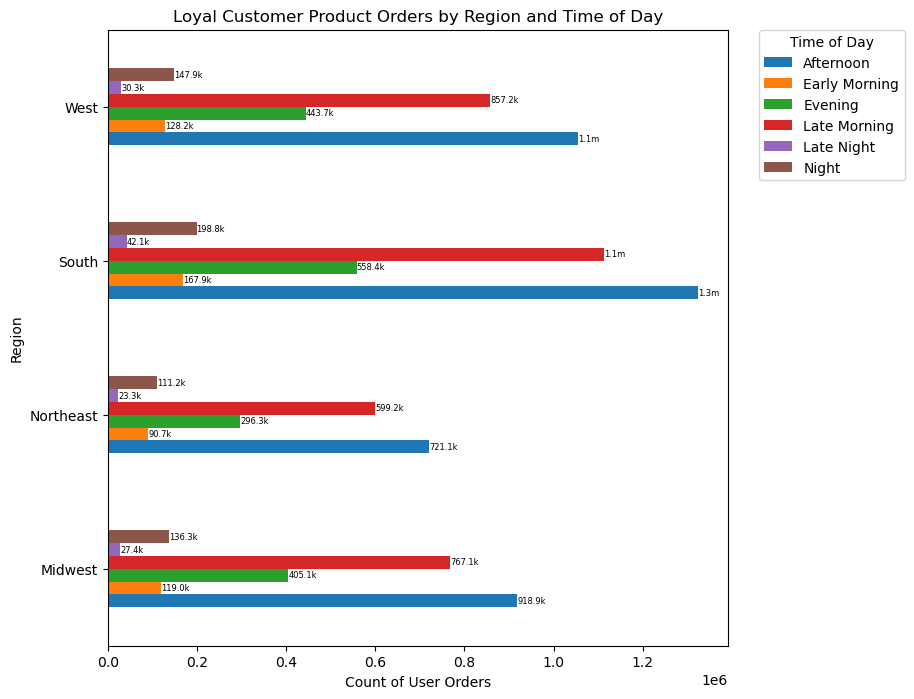

In [720]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
loyal_time_region_bar = crosstab.plot.barh(rot=0, figsize=(8,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Region')
plt.xlabel('Count of User Orders')
plt.title('Loyal Customer Product Orders by Region and Time of Day') 
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [722]:
# Save Visual
loyal_time_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_time_region_bar.png'), bbox_inches='tight')

In [724]:
# Create a crosstab of the region and weekday categories from filtered_df
crosstab = pd.crosstab(filtered_df['Region'], filtered_df['orders_day_of_week'], dropna = False)

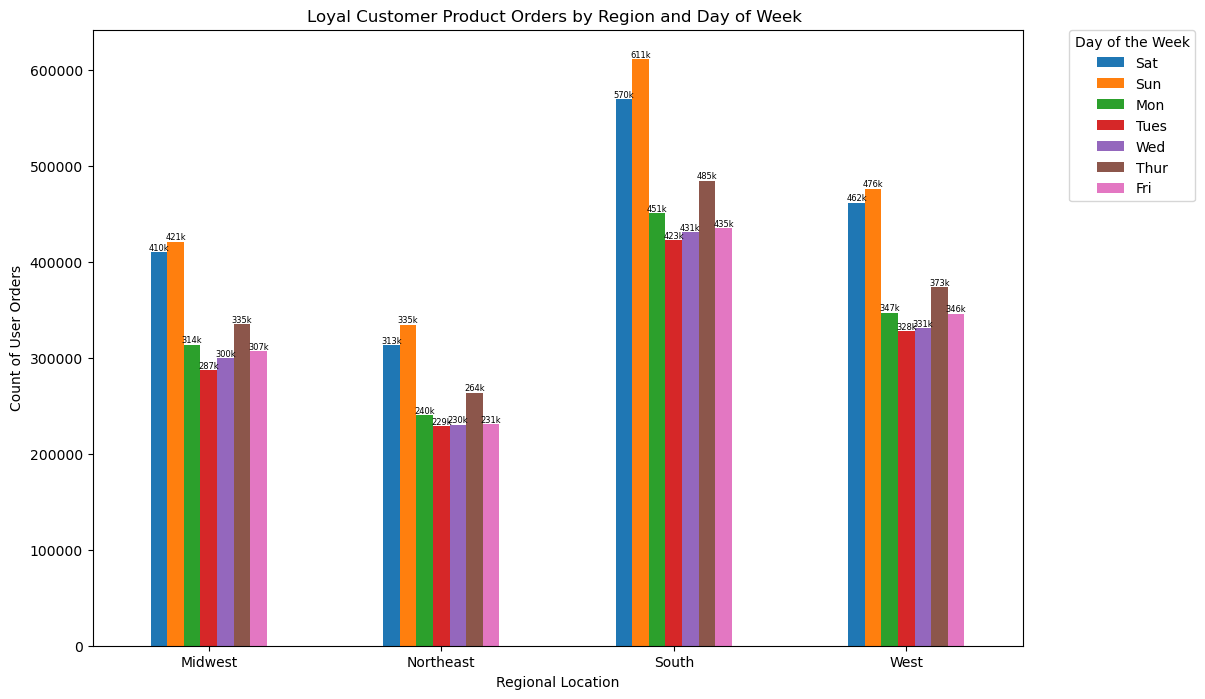

In [728]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{count // 100}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
loyal_region_dow_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='6')

plt.ylabel('Count of User Orders')
plt.xlabel('Regional Location')
plt.title('Loyal Customer Product Orders by Region and Day of Week ') 
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=[day_names[i] for i in range(7)])

In [730]:
# Save Visual
loyal_region_dow_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_region_dow_bar.png'), bbox_inches='tight')

In [706]:
# Create a crosstab of the customer loyalty and price categories
crosstab = pd.crosstab(final_data_dept['loyalty_flag'], final_data_dept['price_range_loc'], dropna = False)

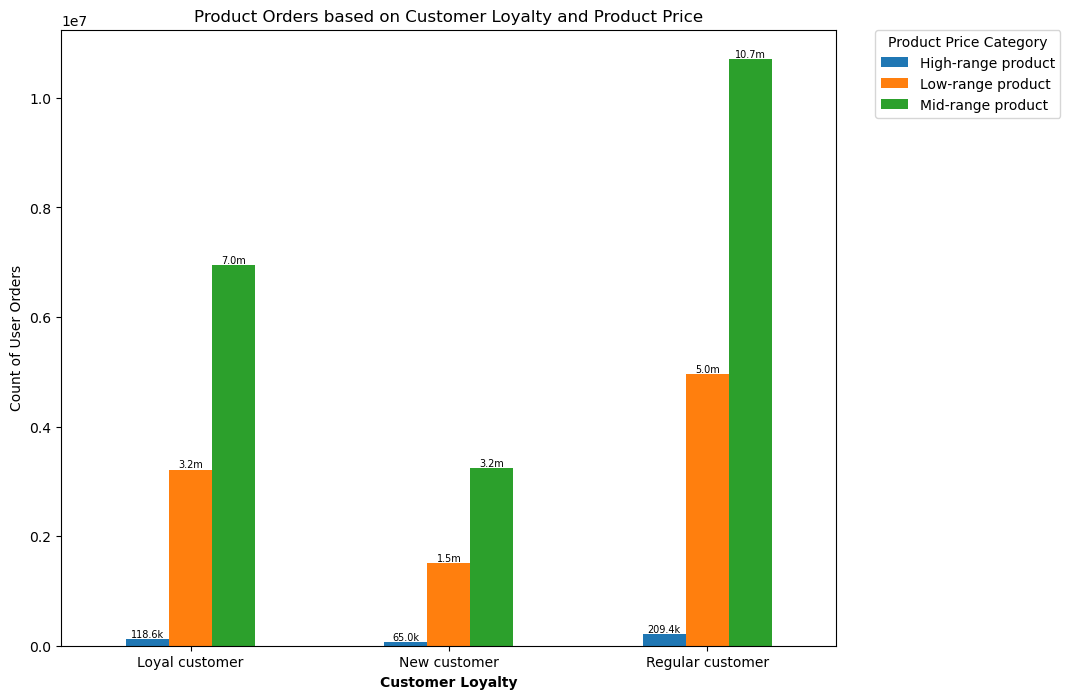

In [710]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
price_loyalty_bar = crosstab.plot.bar(rot=0, figsize=(10,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Customer Loyalty', weight='bold')
plt.title('Product Orders based on Customer Loyalty and Product Price') 
plt.legend(title='Product Price Category', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [712]:
# Save Visual
price_loyalty_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'price_loyalty_bar.png'), bbox_inches='tight')

Text(0.5, 0, 'Count of Items Ordered')

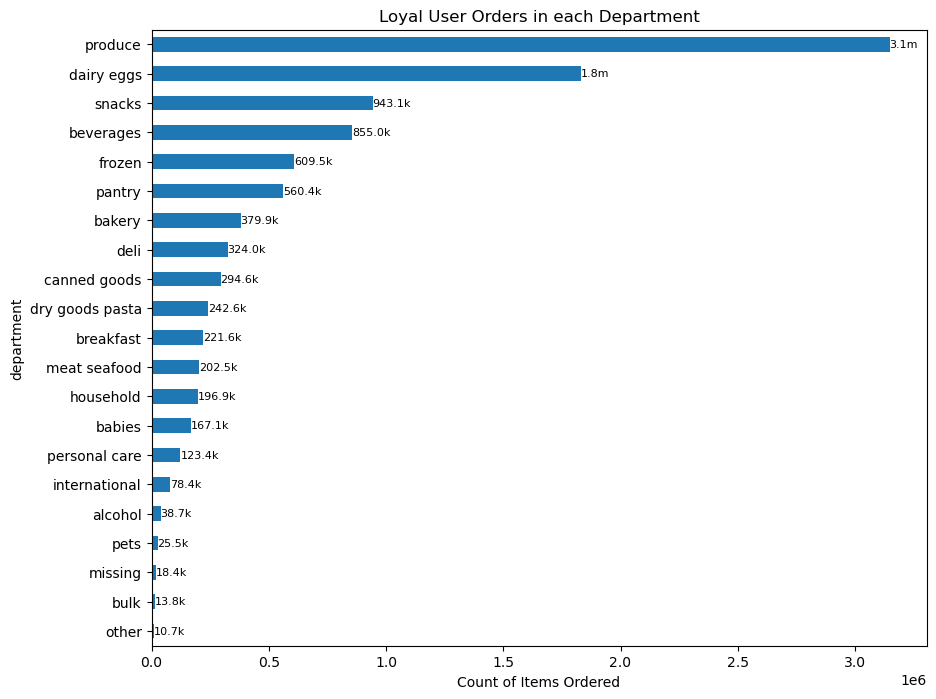

In [1116]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Count the values of each department
department_names = filtered_df['department'].value_counts(dropna=False).sort_values(ascending=True)

#Plot a horizontal bar chart
loyal_dept_bar = department_names.plot.barh(figsize=(10,8))

# Access the current Axes object
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='8')

plt.title('Loyal User Orders in each Department')
plt.xlabel('Count of Items Ordered')

In [1118]:
# Save Visual
loyal_dept_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyal_dept_bar.png'), bbox_inches='tight')

In [738]:
# Who is buying meat & seafood?
# Filter df to include specific values
filtered_df_meat = final_data_dept[(final_data_dept['department'] == 'meat seafood')]

In [740]:
# check filter
filtered_df_meat.head()

department_id    department  order_id user_id  order_number  \
16701715             12  meat seafood    788338       2             8   
16701716             12  meat seafood   2402008       7             2   
16701717             12  meat seafood    121053       7             3   
16701718             12  meat seafood   1695742       7             4   
16701719             12  meat seafood    776265       7             8   

          orders_day_of_week  order_hour_of_day  days_since_prior_order  \
16701715                   1                 15                    27.0   
16701716                   1                 19                    30.0   
16701717                   0                 18                    30.0   
16701718                   2                 10                     9.0   
16701719                   2                 12                     8.0   

          product_id  add_to_cart_order  ...  Date_joined Dependants  \
16701715          23                 12  ...     7/4/2017          3   
16701716       13198                 14  ...     4/1/2017          2   
16701717       13198                 22  ...     4/1/2017          2   
16701718       13198                 13  ...     4/1/2017          2   
16701719       13198                  6  ...     4/1/2017          2   

          Fam_status  Income     Region        age_group   income_group  \
16701715     married   64940       West   Late Adulthood     Low Income   
16701716     married   89095  Northeast  Early Adulthood  Middle Income   
16701717     married   89095  Northeast  Early Adulthood  Middle Income   
16701718     married   89095  Northeast  Early Adulthood  Middle Income   
16701719     married   89095  Northeast  Early Adulthood  Middle Income   

               fam_size   time_of_day  week_day_category  
16701715   Large Family     Afternoon            Weekend  
16701716  Medium Family       Evening            Weekend  
16701717  Medium Family       Evening            Weekend  
16701718  Medium Family  Late Morning            Weekday  
16701719  Medium Family     Afternoon            Weekday  

[5 rows x 34 columns]

In [750]:
# Visualize meat/seafood time of day purchases by region
# Create a crosstab of the time of day and region categories
crosstab = pd.crosstab(filtered_df_meat['time_of_day'], filtered_df_meat['Region'], dropna = False)

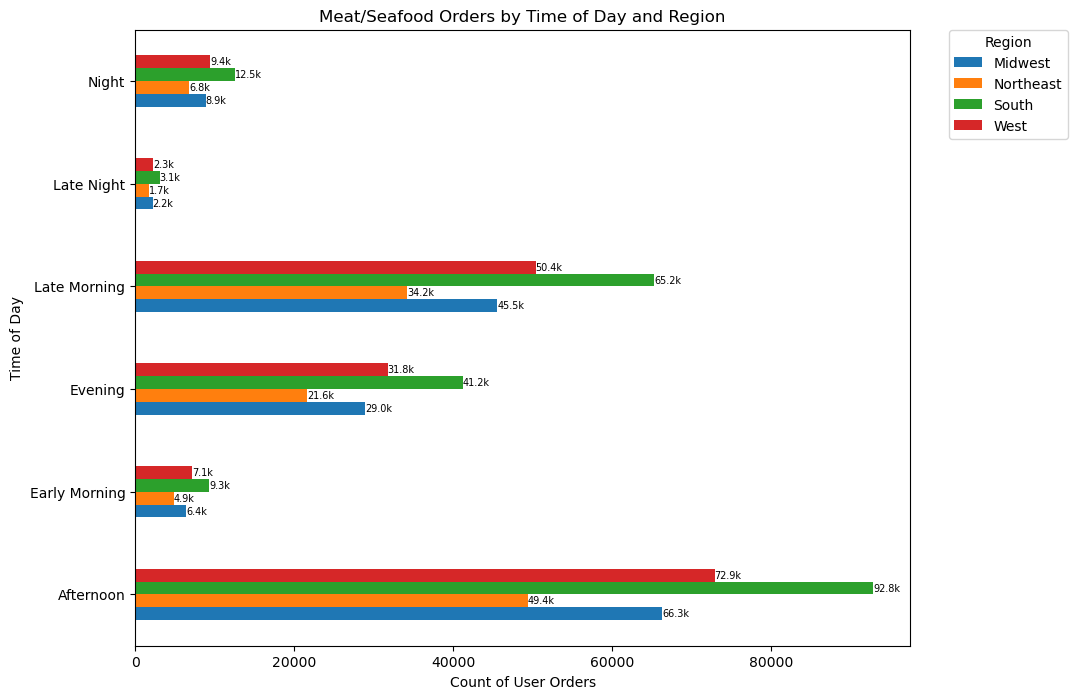

In [754]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{float(count) / 100:.1f}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
meat_tod_region_bar = crosstab.plot.barh(rot=0, figsize=(10,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Time of Day')
plt.xlabel('Count of User Orders')
plt.title('Meat/Seafood Orders by Time of Day and Region') 
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [756]:
# Save Visual
meat_tod_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_tod_region_bar.png'), bbox_inches='tight')

In [758]:
# Create a crosstab of the time of day and region categories
crosstab = pd.crosstab(filtered_df_meat['Region'], filtered_df_meat['orders_day_of_week'], dropna = False)

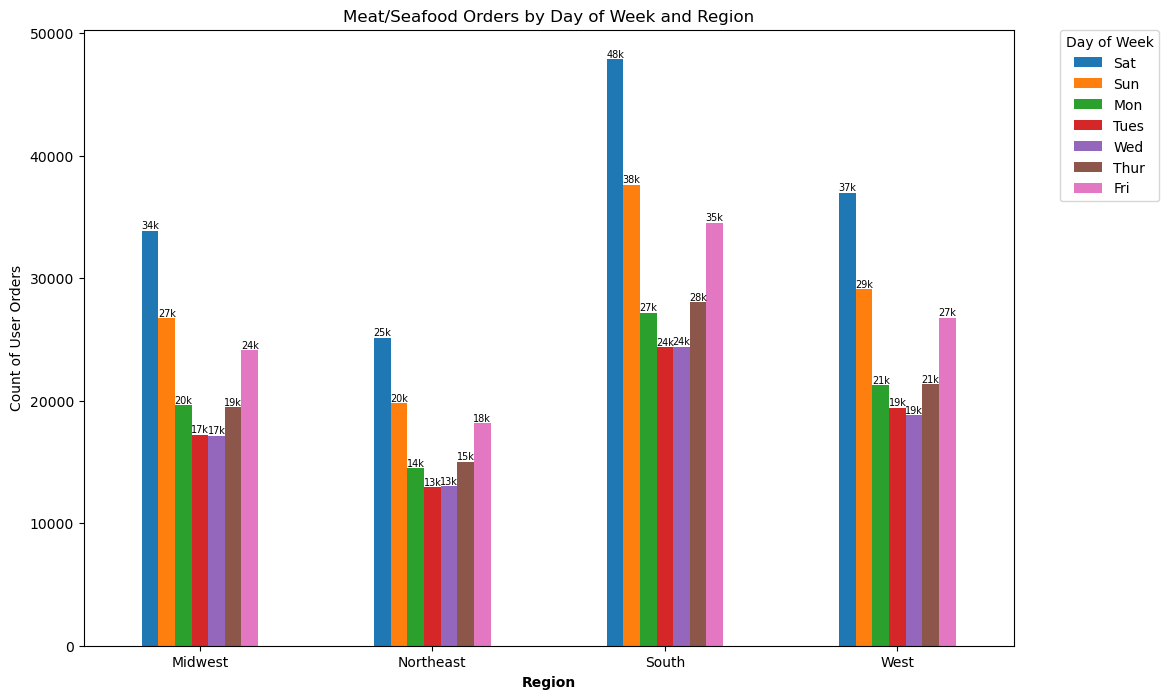

In [776]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.0f}k"
    elif count >= 100:
        return f"{float(count) / 100:.1f}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
meat_dow_region_bar = crosstab.plot.bar(rot=0, figsize=(12,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Count of User Orders')
plt.xlabel('Region', weight='bold')
plt.title('Meat/Seafood Orders by Day of Week and Region') 
plt.legend(title='Day of Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, labels=[day_names[i] for i in range(7)])

In [778]:
# Save Visual
meat_dow_region_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_dow_region_bar.png'), bbox_inches='tight')

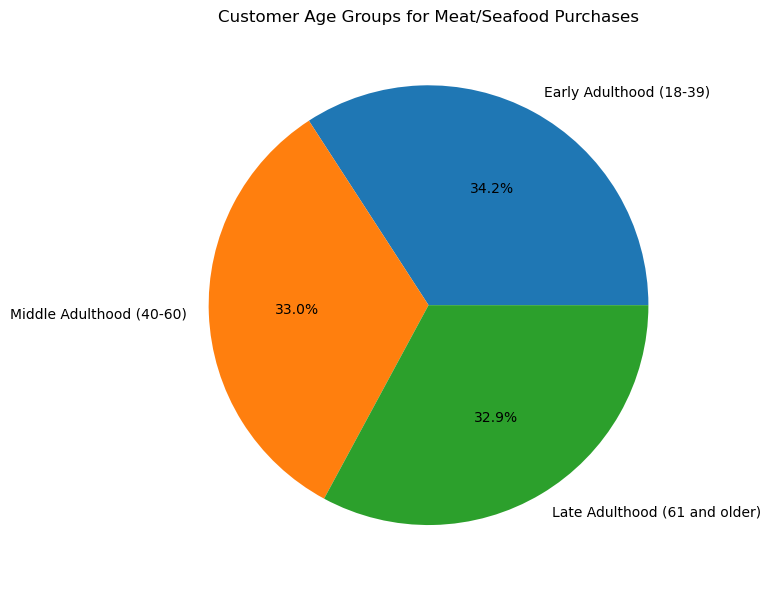

In [1086]:
# Display the age groups in a pie chart for the meat filtered df
# Create a seperate df containing only data for the chart
meat_age_group_pie_data = filtered_df_meat['age_group'].value_counts()

# Create diemnsions for the chart
meat_age_group_pie_data.plot(figsize=(8,6))

# Plot the chart
meat_age_group_pie = meat_age_group_pie_data.plot.pie(labels = ['Early Adulthood (18-39)', 'Middle Adulthood (40-60)', 'Late Adulthood (61 and older)'], autopct='%1.1f%%',)
plt.title('Customer Age Groups for Meat/Seafood Purchases')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()

In [1088]:
# Save Visual
meat_age_group_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_age_group_pie.png'), bbox_inches='tight')

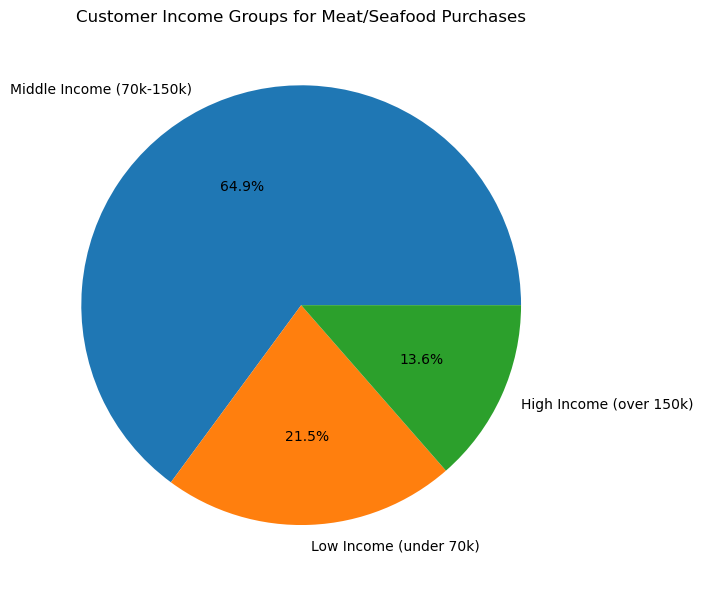

In [1092]:
# Display the income groups in a pie chart for the meat filtered df
# Create a seperate df containing only data for the chart
meat_income_group_pie_data = filtered_df_meat['income_group'].value_counts()

# Create diemnsions for the chart
meat_income_group_pie_data.plot(figsize=(8,6))

# Plot the chart
meat_income_group_pie = meat_income_group_pie_data.plot.pie(labels = ['Middle Income (70k-150k)', 'Low Income (under 70k)', 'High Income (over 150k)'], autopct='%1.1f%%',)
plt.title('Customer Income Groups for Meat/Seafood Purchases')
plt.ylabel('')
plt.xlabel('')
plt.tight_layout()

In [1094]:
# Save Visual
meat_income_group_pie.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_income_group_pie.png'), bbox_inches='tight')

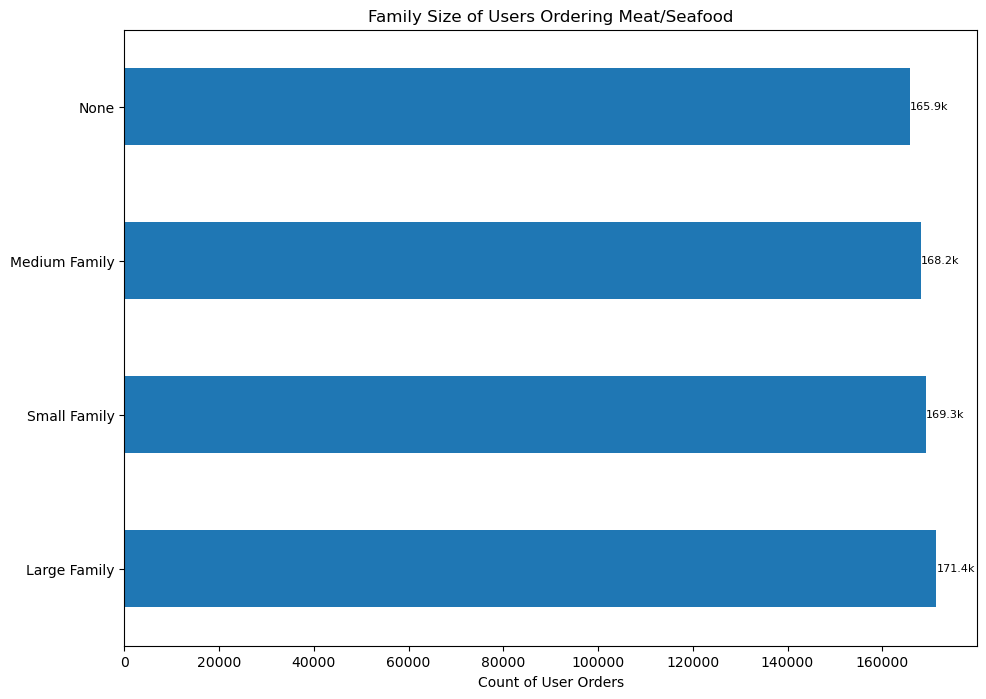

In [1154]:
# Visualize family size of meat filtered data using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Creating Bar Chart
meat_fam_size = filtered_df_meat['fam_size'].value_counts()

#Plot
meat_fam_size_bar=meat_fam_size.plot.barh(rot=0,figsize=(11,8))

# Access the current Axes object
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='8')

plt.title('Family Size of Users Ordering Meat/Seafood')
plt.xlabel('Count of User Orders')
plt.ylabel('')
plt.tight_layout
plt.show()

In [1156]:
# Save Visual
meat_fam_size_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_fam_size_bar.png'), bbox_inches='tight')

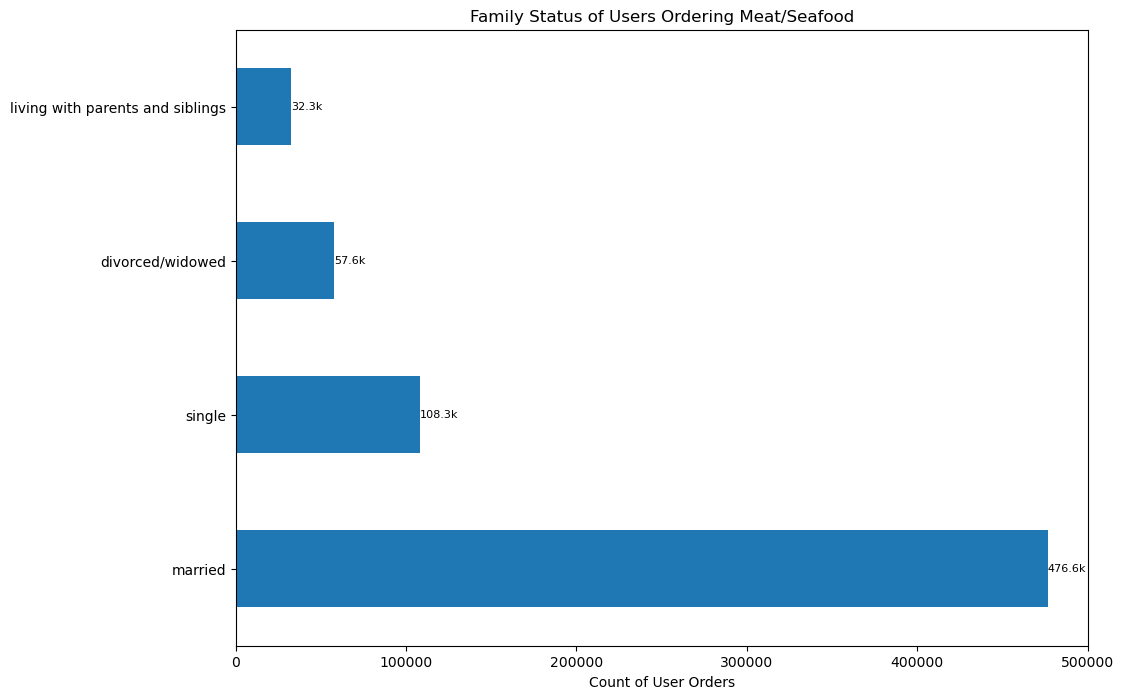

In [1164]:
# Visualize family status of meat filtered data using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Creating Bar Chart
meat_fam_status = filtered_df_meat['Fam_status'].value_counts()

#Plot
meat_fam_status_bar=meat_fam_status.plot.barh(rot=0,figsize=(11,8))

# Access the current Axes object
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='8')

plt.title('Family Status of Users Ordering Meat/Seafood')
plt.xlabel('Count of User Orders')
plt.ylabel('')
plt.tight_layout
plt.show()

In [1166]:
# Save Visual
meat_fam_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_fam_status_bar.png'), bbox_inches='tight')

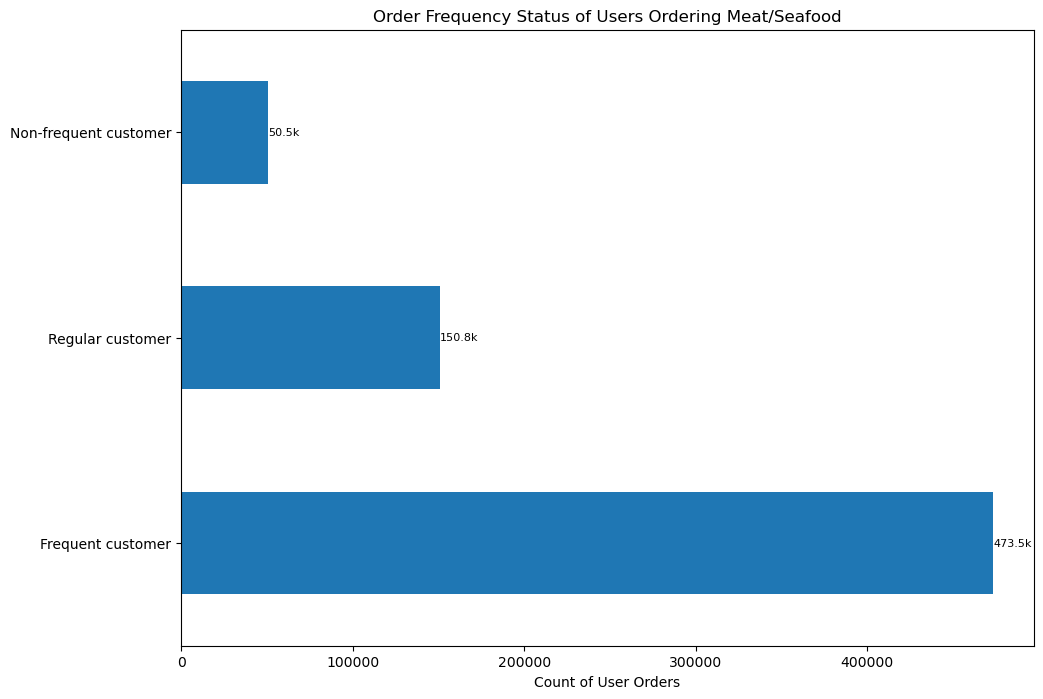

In [1158]:
# Visualize customer frequency status of meat filtered data using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{count // 100}h"
    else:
        return str(count)

# Creating Bar Chart
meat_freq_status = filtered_df_meat['frequency_flag'].value_counts()

#Plot
meat_freq_status_bar=meat_freq_status.plot.barh(rot=0,figsize=(11,8))

# Access the current Axes object
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='8')

plt.title('Order Frequency Status of Users Ordering Meat/Seafood')
plt.xlabel('Count of User Orders')
plt.ylabel('')
plt.tight_layout
plt.show()

In [1168]:
# Save Visual
meat_freq_status_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'meat_freq_status_bar.png'), bbox_inches='tight')

In [1122]:
# Create a crosstab of the customer loyalty flag and time of week categories
crosstab = pd.crosstab(final_data_dept['loyalty_flag'], final_data_dept['week_day_category'], dropna = False)

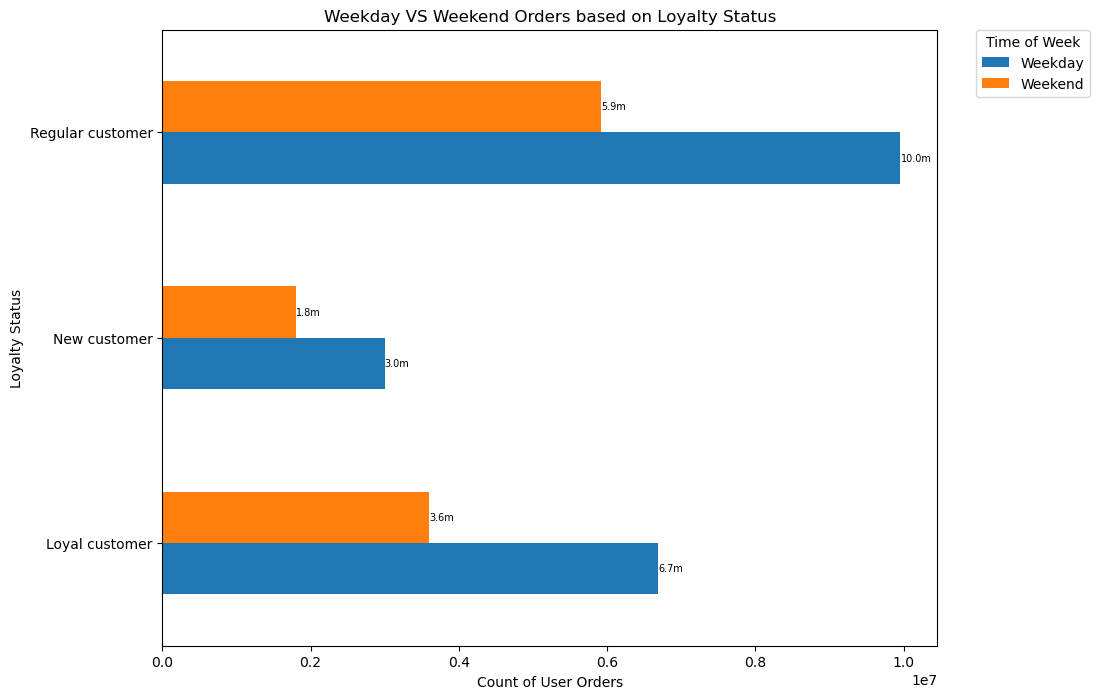

In [1126]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{float(count) / 100:.1f}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
loyalflag_week_bar = crosstab.plot.barh(rot=0, figsize=(10,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Loyalty Status')
plt.xlabel('Count of User Orders')
plt.title('Weekday VS Weekend Orders based on Loyalty Status') 
plt.legend(title='Time of Week', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [1128]:
# Save Visual
loyalflag_week_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'loyalflag_week_bar.png'), bbox_inches='tight')

In [1130]:
# Create a crosstab of the region and time of day categories
crosstab = pd.crosstab(final_data_dept['Region'], final_data_dept['time_of_day'], dropna = False)

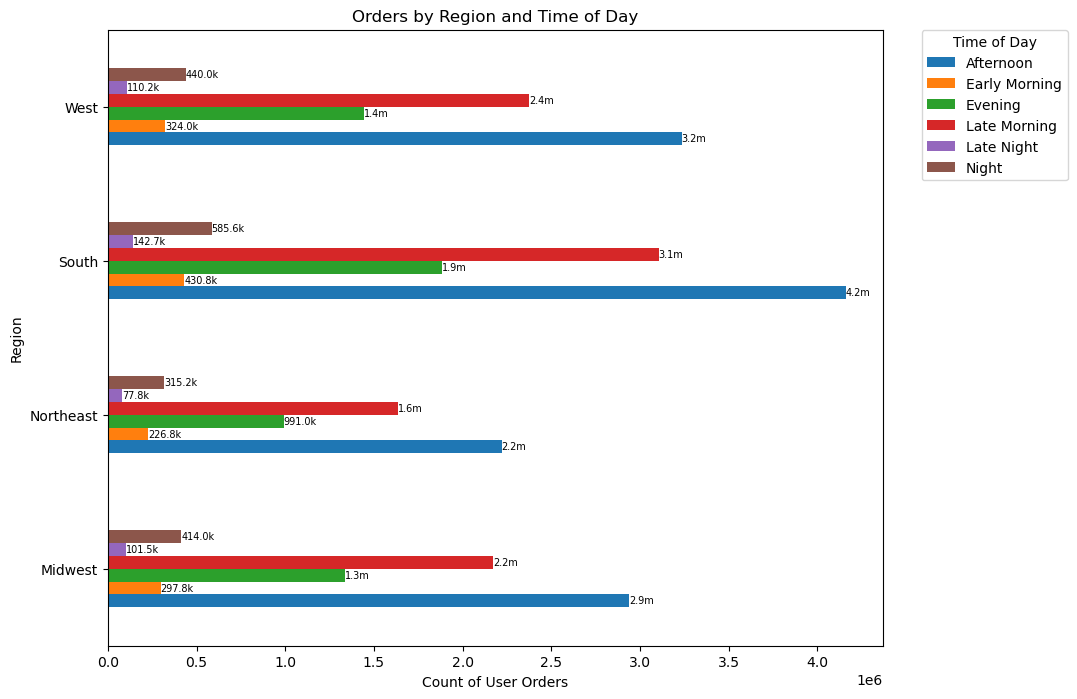

In [1134]:
# Visualize the crosstab using abbreviated datapoints
def abbreviate_count(count):
    if count >= 1000000:
        return f"{float(count) / 1000000:.1f}m"
    elif count >= 1000:
        return f"{float(count) / 1000:.1f}k"
    elif count >= 100:
        return f"{float(count) / 100:.1f}h"
    elif count == 0:
        return ''
    else:
        return str(count)

# Add data point labels to bars
region_tod_bar = crosstab.plot.barh(rot=0, figsize=(10,8))
ax = plt.gca()

for i, container in enumerate(ax.containers):
    if i % 1 == 0: 
        ax.bar_label(container, fmt=abbreviate_count, fontsize='7')

plt.ylabel('Region')
plt.xlabel('Count of User Orders')
plt.title('Orders by Region and Time of Day') 
plt.legend(title='Time of Day', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

In [1136]:
# Save Visual
region_tod_bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'region_tod_bar.png'), bbox_inches='tight')

In [1144]:
# Calculate correlation of age and income

from scipy.stats.stats import pearsonr

pearsonr(final_data_dept['Age'], final_data_dept['Income'])

C:\Users\jacks\AppData\Local\Temp\ipykernel_15076\425791402.py:3: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


PearsonRResult(statistic=0.417629157439537, pvalue=0.0)